<a href="https://colab.research.google.com/github/Joey1211/AH2179_AIcourse/blob/main/project_2179.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ÂÆâË£ÖÂøÖË¶ÅÁöÑÂ∫ìÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
# Install necessary libraries if needed
!pip install xgboost lightgbm scikit-learn matplotlib seaborn pandas numpy -q


In [ ]:
# ÂØºÂÖ•Âü∫Á°ÄÂ∫ì Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# ÂØºÂÖ•Êú∫Âô®Â≠¶‰π†Â∫ì Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
import lightgbm as lgb

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê Set random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†º Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# ËÆæÁΩÆÊòæÁ§∫ÈÄâÈ°π Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# ËÆæÁΩÆÂõæË°®Â≠ó‰ΩìÂ§ßÂ∞è Set plot font sizes
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("‚úÖ ÁéØÂ¢ÉÂáÜÂ§áÂÆåÊàê Environment setup completed")


‚úÖ ÁéØÂ¢ÉÂáÜÂ§áÂÆåÊàê Environment setup completed


In [ ]:
# Âä†ËΩΩÊï∞ÊçÆÔºå‰ΩøÁî®Á¨¨‰∏ÄË°å‰Ωú‰∏∫ÂàóÂêç Reload data with first row as column names
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv'

df = pd.read_csv(url, header=1)  # ‰ΩøÁî®Á¨¨‰∫åË°å‰Ωú‰∏∫ÂàóÂêç Use second row as column names

# Âà†Èô§‰∏çÂøÖË¶ÅÁöÑÂàÜÁªÑÊ†áÈ¢òÂàó Remove unnecessary group header columns
columns_to_drop = ['Basic information', 'Categorical varibles', 'Categorical variables (dummy variables)']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# ÈáçÂëΩÂêçÂàóÔºàÂéªÈô§UnnamedÂâçÁºÄÔºâRename columns to remove Unnamed prefix
# Ëé∑ÂèñÊ≠£Á°ÆÁöÑÂàóÂêç Get correct column names
new_columns = []
for col in df.columns:
    if 'Unnamed' not in col:
        new_columns.append(col)
    else:
        new_columns.append(col)  # ÊöÇÊó∂‰øùÁïôÔºåÂêéÈù¢‰ºöÁúãÂà∞ÂÆûÈôÖÂÜÖÂÆπ

df.columns = new_columns

print("\n" + "="*80)
print("ÈáçÊñ∞Âä†ËΩΩÂêéÁöÑÊï∞ÊçÆ‰ø°ÊÅØ Reloaded Data Information")
print("="*80)
print(f"Êï∞ÊçÆÂΩ¢Áä∂ Shape: {df.shape}")
print(f"Êï∞ÊçÆÂ§ßÂ∞è Size: {df.shape[0]:,} Ë°å rows √ó {df.shape[1]} Âàó columns")

print("\nÂâç5Ë°åÊï∞ÊçÆ First 5 rows:")
print(df.head())

print("\nÊï∞ÊçÆÂàóÂêç Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")



ÈáçÊñ∞Âä†ËΩΩÂêéÁöÑÊï∞ÊçÆ‰ø°ÊÅØ Reloaded Data Information
Êï∞ÊçÆÂΩ¢Áä∂ Shape: (545103, 31)
Êï∞ÊçÆÂ§ßÂ∞è Size: 545,103 Ë°å rows √ó 31 Âàó columns

Ââç5Ë°åÊï∞ÊçÆ First 5 rows:
   Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  dwell_time  \
0       20220108         4   41344              1            151           0   
1       20220108         4   41344              2            185          24   
2       20220108         4   41344              3            186           0   
3       20220108         4   41344              4            202          12   
4       20220108         4   41344              5            242          21   

   travel_time_for_previous_section  scheduled_travel_time  \
0                                 0                    120   
1                               171                     45   
2                                55                     41   
3                                42                     94   
4                                98

In [ ]:
# Ê†πÊçÆÊï∞ÊçÆÊèèËø∞ÊñáÊ°£ÔºåÊâãÂä®ËÆæÁΩÆÊ≠£Á°ÆÁöÑÂàóÂêç
# Manually set correct column names based on data description

correct_columns = [
    # Âü∫Êú¨‰ø°ÊÅØ Basic information
    'Calendar_date',
    'route_id',
    'bus_id',
    'stop_sequence',

    # ÁõÆÊ†áÂèòÈáè Target variable
    'arrival_delay',

    # ËøêËê•Êï∞ÊçÆ Operational data
    'dwell_time',
    'travel_time_for_previous_section',
    'scheduled_travel_time',
    'upstream_stop_delay',
    'origin_delay',
    'previous_bus_delay',
    'previous_trip_travel_time',
    'traffic_condition',
    'recurrent_delay',

    # ÂàÜÁ±ªÂèòÈáèÂéüÂßãÂÄº Original categorical variables
    'weather',
    'temperature',
    'day_of_week',
    'time_of_day',

    # ÂàÜÁ±ªÂèòÈáèÂìëÂèòÈáè Dummy variables
    'factor(weather)Light_Rain',
    'factor(weather)Light_Snow',
    'factor(weather)Normal',
    'factor(weather)Rain',
    'factor(weather)Snow',
    'factor(temperature)Cold',
    'factor(temperature)Extra_cold',
    'factor(temperature)Normal',
    'factor(day_of_week)weekday',
    'factor(day_of_week)weekend',
    'factor(time_of_day)Afternoon_peak',
    'factor(time_of_day)Morning_peak',
    'factor(time_of_day)Off-peak'
]

# Ê£ÄÊü•ÂàóÊï∞ÊòØÂê¶ÂåπÈÖç Check if column count matches
if len(df.columns) == len(correct_columns):
    df.columns = correct_columns
    print("‚úÖ ÂàóÂêçËÆæÁΩÆÊàêÂäü Column names set successfully!")
else:
    print(f"‚ö†Ô∏è Ë≠¶ÂëäÔºöÂàóÊï∞‰∏çÂåπÈÖç Warning: Column count mismatch")
    print(f"   Êï∞ÊçÆÂàóÊï∞ Data columns: {len(df.columns)}")
    print(f"   È¢ÑÊúüÂàóÊï∞ Expected columns: {len(correct_columns)}")
    print(f"   Â∑ÆÂºÇ Difference: {len(df.columns) - len(correct_columns)}")

# ÊòæÁ§∫Êõ¥Êñ∞ÂêéÁöÑÊï∞ÊçÆ Display updated data
print("\n" + "="*80)
print("Êõ¥Êñ∞ÂêéÁöÑÊï∞ÊçÆÂâç5Ë°å Updated Data - First 5 Rows")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("Êï∞ÊçÆÂàóÂêçÔºàÊåâÁ±ªÂà´ÂàÜÁªÑÔºâColumn Names by Category")
print("="*80)
print("\n„ÄêÂü∫Êú¨‰ø°ÊÅØ Basic Info„Äë")
print(df.columns[:4].tolist())
print("\n„ÄêÁõÆÊ†áÂèòÈáè Target Variable„Äë")
print([df.columns[4]])
print("\n„ÄêËøêËê•Êï∞ÊçÆ Operational Data„Äë")
print(df.columns[5:14].tolist())
print("\n„ÄêÂàÜÁ±ªÂèòÈáèÂéüÂßã Categorical Original„Äë")
print(df.columns[14:18].tolist())
print("\n„ÄêÂ§©Ê∞îÂìëÂèòÈáè Weather Dummies„Äë")
print(df.columns[18:23].tolist())
print("\n„ÄêÊ∏©Â∫¶ÂìëÂèòÈáè Temperature Dummies„Äë")
print(df.columns[23:26].tolist())
print("\n„ÄêÊòüÊúüÂìëÂèòÈáè Day of Week Dummies„Äë")
print(df.columns[26:28].tolist())
print("\n„ÄêÊó∂ÊÆµÂìëÂèòÈáè Time of Day Dummies„Äë")
print(df.columns[28:31].tolist())


‚úÖ ÂàóÂêçËÆæÁΩÆÊàêÂäü Column names set successfully!

Êõ¥Êñ∞ÂêéÁöÑÊï∞ÊçÆÂâç5Ë°å Updated Data - First 5 Rows
   Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  dwell_time  \
0       20220108         4   41344              1            151           0   
1       20220108         4   41344              2            185          24   
2       20220108         4   41344              3            186           0   
3       20220108         4   41344              4            202          12   
4       20220108         4   41344              5            242          21   

   travel_time_for_previous_section  scheduled_travel_time  \
0                                 0                    120   
1                               171                     45   
2                                55                     41   
3                                42                     94   
4                                98                     86   

   upstream_stop_delay  origin_delay 

In [ ]:
# ËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã Convert data types
print("Ê≠£Âú®ËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã... Converting data types...")

# ËΩ¨Êç¢Êó•Êúü Convert date
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# ËΩ¨Êç¢Êï∞ÂÄºÂàó Convert numerical columns
numerical_cols = [
    'route_id', 'bus_id', 'stop_sequence', 'arrival_delay', 'dwell_time',
    'travel_time_for_previous_section', 'scheduled_travel_time',
    'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
    'previous_trip_travel_time', 'traffic_condition', 'recurrent_delay'
]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ËΩ¨Êç¢ÂìëÂèòÈáè‰∏∫Êï¥Êï∞ Convert dummy variables to integer
dummy_cols = [col for col in df.columns if 'factor(' in col]
for col in dummy_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print("‚úÖ Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàê Data type conversion completed!")

# ÊúÄÁªàÊï∞ÊçÆÈ™åËØÅ Final data validation
print("\n" + "="*80)
print("ÊúÄÁªàÊï∞ÊçÆÈ™åËØÅ Final Data Validation")
print("="*80)
print(f"Êï∞ÊçÆÂΩ¢Áä∂ Shape: {df.shape}")
print(f"Êï∞ÊçÆÂ§ßÂ∞è Size: {df.shape[0]:,} Ë°å rows √ó {df.shape[1]} Âàó columns")

print("\nÊï∞ÊçÆÁ±ªÂûã Data types:")
print(df.dtypes)

print("\nÁº∫Â§±ÂÄºÁªüËÆ° Missing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Áº∫Â§±Êï∞Èáè Count': missing,
    'Áº∫Â§±ÊØî‰æã% Percentage': missing_pct
})
missing_summary = missing_df[missing_df['Áº∫Â§±Êï∞Èáè Count'] > 0].sort_values(
    'Áº∫Â§±Êï∞Èáè Count', ascending=False
)

if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("‚úÖ Ê≤°ÊúâÁº∫Â§±ÂÄº No missing values!")

print("\nÊï∞ÂÄºÂûãÂèòÈáèÁªüËÆ°ÊëòË¶Å Numerical Variables Summary:")
print(df[numerical_cols].describe())


Ê≠£Âú®ËΩ¨Êç¢Êï∞ÊçÆÁ±ªÂûã... Converting data types...
‚úÖ Êï∞ÊçÆÁ±ªÂûãËΩ¨Êç¢ÂÆåÊàê Data type conversion completed!

ÊúÄÁªàÊï∞ÊçÆÈ™åËØÅ Final Data Validation
Êï∞ÊçÆÂΩ¢Áä∂ Shape: (545103, 31)
Êï∞ÊçÆÂ§ßÂ∞è Size: 545,103 Ë°å rows √ó 31 Âàó columns

Êï∞ÊçÆÁ±ªÂûã Data types:
Calendar_date                        datetime64[ns]
route_id                                      int64
bus_id                                        int64
stop_sequence                                 int64
arrival_delay                                 int64
dwell_time                                    int64
travel_time_for_previous_section              int64
scheduled_travel_time                         int64
upstream_stop_delay                           int64
origin_delay                                  int64
previous_bus_delay                            int64
previous_trip_travel_time                     int64
traffic_condition                           float64
recurrent_delay                             float64
wea

# ÊèèËø∞ÊÄßÂàÜÊûê
## Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [ ]:
# ÂàõÂª∫ÂàÜÊûêÁî®ÁöÑÊï∞ÊçÆÂâØÊú¨ Create a copy for analysis
df_analysis = df.copy()

print("Ê≠£Âú®ÊèêÂèñÊó∂Èó¥ÁâπÂæÅ... Extracting temporal features...")

# ÊèêÂèñÊó∂Èó¥ÁâπÂæÅ Extract temporal features
df_analysis['year'] = df_analysis['Calendar_date'].dt.year
df_analysis['month'] = df_analysis['Calendar_date'].dt.month
df_analysis['day'] = df_analysis['Calendar_date'].dt.day
df_analysis['weekday'] = df_analysis['Calendar_date'].dt.weekday  # 0=Monday, 6=Sunday
df_analysis['week'] = df_analysis['Calendar_date'].dt.isocalendar().week
df_analysis['day_of_year'] = df_analysis['Calendar_date'].dt.dayofyear

# ÂàõÂª∫Êõ¥ÂèãÂ•ΩÁöÑÂàÜÁ±ªÂèòÈáè Create user-friendly categorical variables
# ÊòüÊúüÂêçÁß∞ Weekday names
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_analysis['weekday_name'] = df_analysis['weekday'].map(weekday_map)

# Êúà‰ªΩÂêçÁß∞ Month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
             5: 'May', 6: 'June', 7: 'July', 8: 'August',
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_analysis['month_name'] = df_analysis['month'].map(month_map)

# Â∑•‰ΩúÊó•/Âë®Êú´ Weekday/Weekend
df_analysis['is_weekend'] = df_analysis['factor(day_of_week)weekend']
df_analysis['day_type'] = df_analysis['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

print("‚úÖ Êó∂Èó¥ÁâπÂæÅÊèêÂèñÂÆåÊàê Temporal features extracted!")

# ÊòæÁ§∫Êó∂Èó¥ÁâπÂæÅÊ†∑‰æã Display sample of temporal features
print("\nÊó∂Èó¥ÁâπÂæÅÊ†∑‰æã Sample of Temporal Features:")
print(df_analysis[['Calendar_date', 'year', 'month', 'month_name', 'weekday',
                    'weekday_name', 'day_type']].head(10))

# Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥ Data time range
print("\n" + "="*80)
print("Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥ Data Time Range")
print("="*80)
print(f"Ëµ∑ÂßãÊó•Êúü Start date: {df_analysis['Calendar_date'].min().strftime('%Y-%m-%d')}")
print(f"ÁªìÊùüÊó•Êúü End date: {df_analysis['Calendar_date'].max().strftime('%Y-%m-%d')}")
print(f"Êó∂Èó¥Ë∑®Â∫¶ Time span: {(df_analysis['Calendar_date'].max() - df_analysis['Calendar_date'].min()).days} Â§© days")
print(f"Êúà‰ªΩËåÉÂõ¥ Month range: {df_analysis['month'].min()} Âà∞ to {df_analysis['month'].max()}")


Ê≠£Âú®ÊèêÂèñÊó∂Èó¥ÁâπÂæÅ... Extracting temporal features...
‚úÖ Êó∂Èó¥ÁâπÂæÅÊèêÂèñÂÆåÊàê Temporal features extracted!

Êó∂Èó¥ÁâπÂæÅÊ†∑‰æã Sample of Temporal Features:
  Calendar_date  year  month month_name  weekday weekday_name day_type
0    2022-01-08  2022      1    January        5     Saturday  Weekend
1    2022-01-08  2022      1    January        5     Saturday  Weekend
2    2022-01-08  2022      1    January        5     Saturday  Weekend
3    2022-01-08  2022      1    January        5     Saturday  Weekend
4    2022-01-08  2022      1    January        5     Saturday  Weekend
5    2022-01-08  2022      1    January        5     Saturday  Weekend
6    2022-01-08  2022      1    January        5     Saturday  Weekend
7    2022-01-08  2022      1    January        5     Saturday  Weekend
8    2022-01-08  2022      1    January        5     Saturday  Weekend
9    2022-01-08  2022      1    January        5     Saturday  Weekend

Êï∞ÊçÆÊó∂Èó¥ËåÉÂõ¥ Data Time Range
Ëµ∑ÂßãÊó•Êúü Sta

## Âü∫Êú¨ÁªüËÆ°

In [ ]:
# ÈÄâÊã©ÂÖ≥ÈîÆÊï∞ÂÄºÂèòÈáè Select key numerical variables
key_vars = ['arrival_delay', 'dwell_time', 'travel_time_for_previous_section',
            'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
            'previous_bus_delay', 'recurrent_delay', 'traffic_condition']

print("="*80)
print("ÂÖ≥ÈîÆÂèòÈáèÊèèËø∞ÊÄßÁªüËÆ° Descriptive Statistics of Key Variables")
print("="*80)

# ËÆ°ÁÆóÊèèËø∞ÊÄßÁªüËÆ° Calculate descriptive statistics
desc_stats = df_analysis[key_vars].describe().T
desc_stats['median'] = df_analysis[key_vars].median()
desc_stats['skewness'] = df_analysis[key_vars].skew()
desc_stats['kurtosis'] = df_analysis[key_vars].kurtosis()

# ÈáçÊñ∞ÊéíÂàóÂàóÈ°∫Â∫è Reorder columns
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]
print(desc_stats.round(2))


ÂÖ≥ÈîÆÂèòÈáèÊèèËø∞ÊÄßÁªüËÆ° Descriptive Statistics of Key Variables
                                     count   mean  median    std      min  \
arrival_delay                    545103.00 134.97   88.00 193.90 -3493.00   
dwell_time                       545103.00  31.99   25.00  27.22     0.00   
travel_time_for_previous_section 545103.00  71.44   64.00  37.59     0.00   
scheduled_travel_time            545103.00 105.92  104.00  36.42    38.00   
upstream_stop_delay              545103.00 135.65   86.00 190.27 -3403.00   
origin_delay                     545103.00  75.11   27.00 133.63 -3061.00   
previous_bus_delay               545103.00 134.38   88.00 193.64 -3493.00   
recurrent_delay                  545103.00  72.75   64.61  29.59    27.75   
traffic_condition                545103.00  73.15   65.00  32.32    18.33   

                                   25%    50%    75%     max  skewness  \
arrival_delay                    11.00  88.00 209.00 2257.00      1.35   
dwell_time   

In [ ]:
print("\n" + "="*80)
print("Âà∞Á´ôÂª∂ËØØËØ¶ÁªÜÁªüËÆ° Detailed Statistics for Arrival Delay")
print("="*80)

# ËÆ°ÁÆóÂª∂ËØØÁõ∏ÂÖ≥ÊåáÊ†á Calculate delay-related metrics
arrival_delay = df_analysis['arrival_delay']

delay_stats = {
    'Ê†∑Êú¨ÊÄªÊï∞ Total samples': len(arrival_delay),
    'Âπ≥ÂùáÂª∂ËØØ Mean delay (seconds)': arrival_delay.mean(),
    '‰∏≠‰ΩçÊï∞Âª∂ËØØ Median delay (seconds)': arrival_delay.median(),
    'Ê†áÂáÜÂ∑Æ Std deviation (seconds)': arrival_delay.std(),
    'ÊúÄÂ∞èÂÄº Min (seconds)': arrival_delay.min(),
    'ÊúÄÂ§ßÂÄº Max (seconds)': arrival_delay.max(),
    '25ÂàÜ‰ΩçÊï∞ 25th percentile (seconds)': arrival_delay.quantile(0.25),
    '75ÂàÜ‰ΩçÊï∞ 75th percentile (seconds)': arrival_delay.quantile(0.75),
    '90ÂàÜ‰ΩçÊï∞ 90th percentile (seconds)': arrival_delay.quantile(0.90),
    '95ÂàÜ‰ΩçÊï∞ 95th percentile (seconds)': arrival_delay.quantile(0.95),
    '99ÂàÜ‰ΩçÊï∞ 99th percentile (seconds)': arrival_delay.quantile(0.99),
}

for key, value in delay_stats.items():
    print(f"{key}: {value:.2f}")

print("\n" + "-"*80)
print("Âª∂ËØØÂàÜÁ±ªÁªüËÆ° Delay Category Statistics")
print("-"*80)

# ÂÆö‰πâÂª∂ËØØÁ±ªÂà´ Define delay categories
df_analysis['delay_category'] = pd.cut(
    df_analysis['arrival_delay'],
    bins=[-np.inf, -60, 0, 60, 180, 300, np.inf],
    labels=['ÊèêÂâç>1ÂàÜÈíü Early>1min', 'ÊèêÂâç<1ÂàÜÈíü Early<1min', 'ÂáÜÁÇπ¬±1ÂàÜÈíü On-time¬±1min',
            'Âª∂ËØØ1-3ÂàÜÈíü Delay 1-3min', 'Âª∂ËØØ3-5ÂàÜÈíü Delay 3-5min', 'Âª∂ËØØ>5ÂàÜÈíü Delay>5min']
)

delay_category_stats = df_analysis['delay_category'].value_counts().sort_index()
delay_category_pct = (delay_category_stats / len(df_analysis) * 100).round(2)

delay_summary = pd.DataFrame({
    'Êï∞Èáè Count': delay_category_stats,
    'ÊØî‰æã% Percentage': delay_category_pct
})

print(delay_summary)

# ÂÖ≥ÈîÆÊÄßËÉΩÊåáÊ†á Key Performance Indicators
print("\n" + "-"*80)
print("ÂÖ≥ÈîÆÊÄßËÉΩÊåáÊ†á Key Performance Indicators (KPIs)")
print("-"*80)

kpis = {
    'ÂáÜÁÇπÁéá On-time rate (¬±60s)': (arrival_delay.abs() <= 60).mean() * 100,
    'ÂáÜÁÇπÁéá On-time rate (¬±120s)': (arrival_delay.abs() <= 120).mean() * 100,
    '‰∏•ÈáçÂª∂ËØØÁéá Severe delay rate (>300s)': (arrival_delay > 300).mean() * 100,
    'ÊèêÂâçÂà∞ËææÁéá Early arrival rate (<-60s)': (arrival_delay < -60).mean() * 100,
    'Âπ≥ÂùáÁªùÂØπÂª∂ËØØ Mean absolute delay (seconds)': arrival_delay.abs().mean(),
}

for key, value in kpis.items():
    print(f"{key}: {value:.2f}%") if '%' in key else print(f"{key}: {value:.2f}")



Âà∞Á´ôÂª∂ËØØËØ¶ÁªÜÁªüËÆ° Detailed Statistics for Arrival Delay
Ê†∑Êú¨ÊÄªÊï∞ Total samples: 545103.00
Âπ≥ÂùáÂª∂ËØØ Mean delay (seconds): 134.97
‰∏≠‰ΩçÊï∞Âª∂ËØØ Median delay (seconds): 88.00
Ê†áÂáÜÂ∑Æ Std deviation (seconds): 193.90
ÊúÄÂ∞èÂÄº Min (seconds): -3493.00
ÊúÄÂ§ßÂÄº Max (seconds): 2257.00
25ÂàÜ‰ΩçÊï∞ 25th percentile (seconds): 11.00
75ÂàÜ‰ΩçÊï∞ 75th percentile (seconds): 209.00
90ÂàÜ‰ΩçÊï∞ 90th percentile (seconds): 379.00
95ÂàÜ‰ΩçÊï∞ 95th percentile (seconds): 513.00
99ÂàÜ‰ΩçÊï∞ 99th percentile (seconds): 810.00

--------------------------------------------------------------------------------
Âª∂ËØØÂàÜÁ±ªÁªüËÆ° Delay Category Statistics
--------------------------------------------------------------------------------
                      Êï∞Èáè Count  ÊØî‰æã% Percentage
delay_category                                
ÊèêÂâç>1ÂàÜÈíü Early>1min        36016            6.61
ÊèêÂâç<1ÂàÜÈíü Early<1min        80222           14.72
ÂáÜÁÇπ¬±1ÂàÜÈíü On-time¬±1min     110669           2

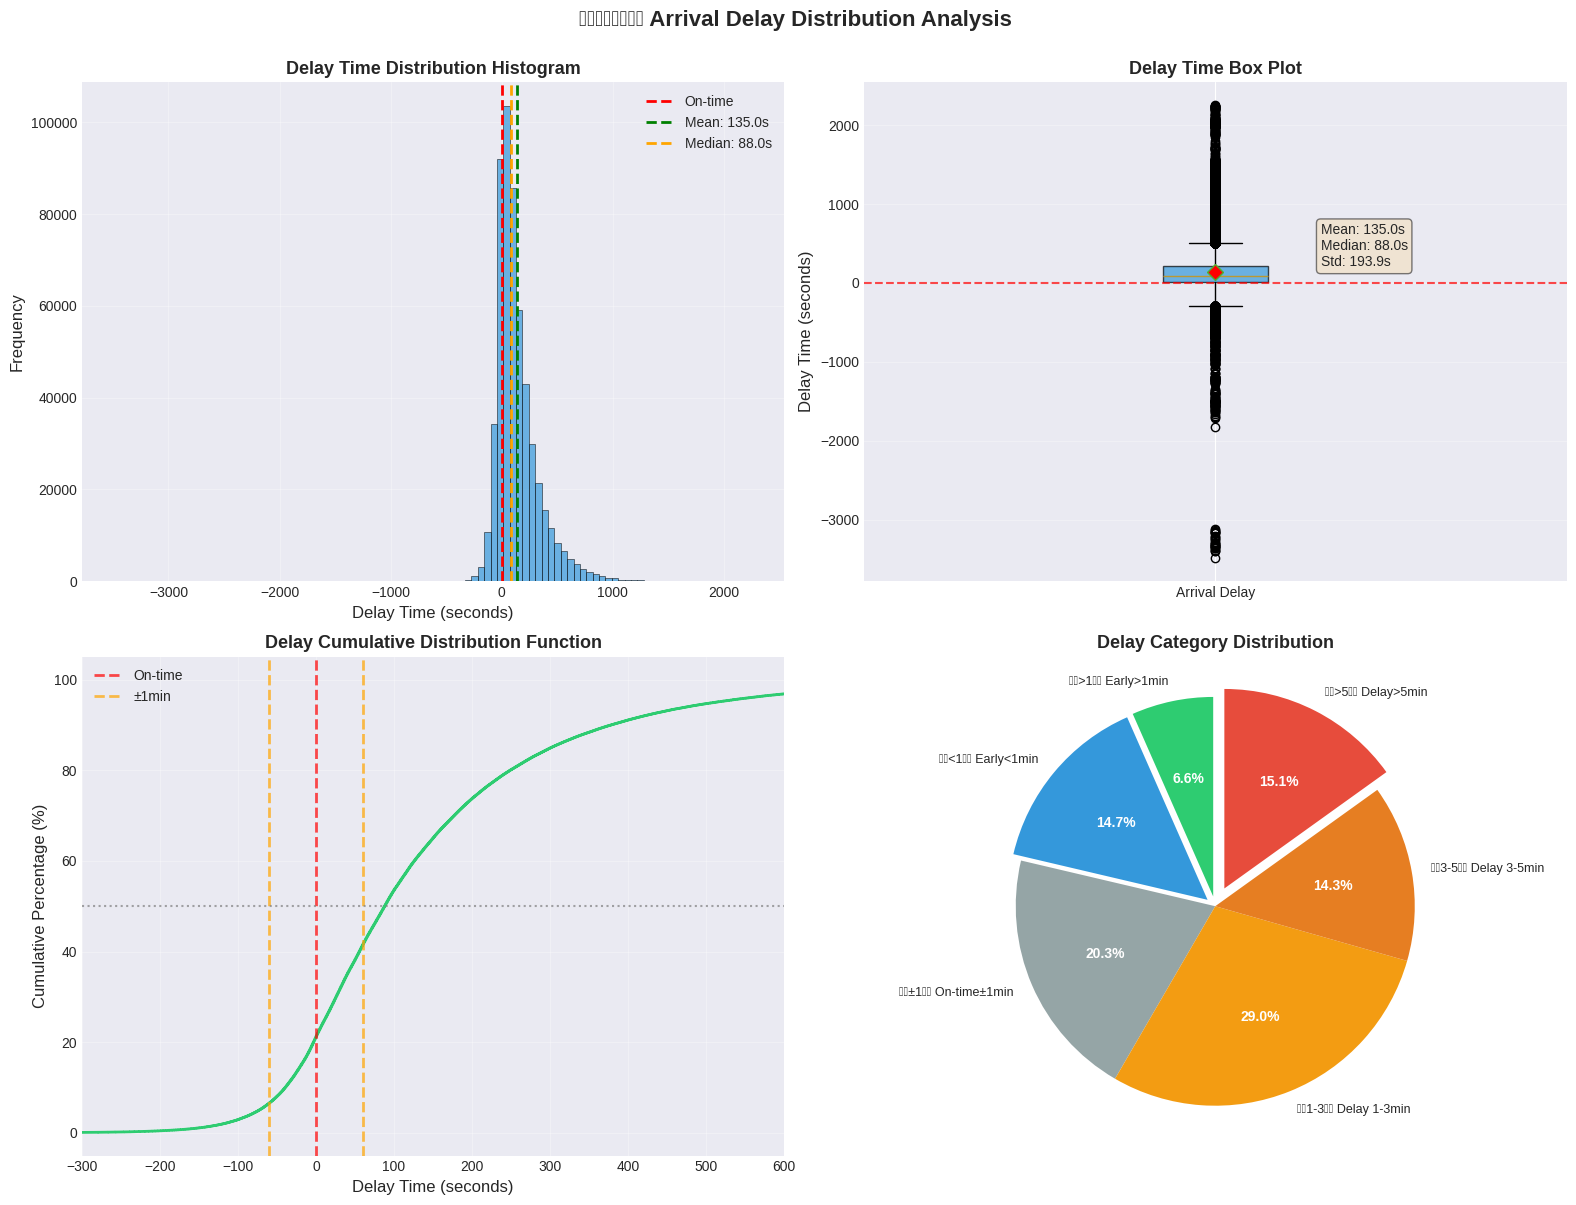

In [ ]:
# ÂàõÂª∫Âª∂ËØØÂàÜÂ∏ÉÂõæ Create delay distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Âà∞Á´ôÂª∂ËØØÂàÜÂ∏ÉÂàÜÊûê Arrival Delay Distribution Analysis',
             fontsize=16, fontweight='bold', y=1.00)

# 1. Áõ¥ÊñπÂõæ Histogram
ax1 = axes[0, 0]
ax1.hist(df_analysis['arrival_delay'], bins=100, color='#3498db',
         alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-time')
ax1.axvline(x=df_analysis['arrival_delay'].mean(), color='green',
            linestyle='--', linewidth=2, label=f'Mean: {df_analysis["arrival_delay"].mean():.1f}s')
ax1.axvline(x=df_analysis['arrival_delay'].median(), color='orange',
            linestyle='--', linewidth=2, label=f'Median: {df_analysis["arrival_delay"].median():.1f}s')
ax1.set_xlabel('Delay Time (seconds)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Delay Time Distribution Histogram',
              fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. ÁÆ±Á∫øÂõæ Box plot
ax2 = axes[0, 1]
bp = ax2.boxplot([df_analysis['arrival_delay']],
                  labels=['Arrival Delay'],
                  patch_artist=True,
                  showmeans=True,
                  meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
bp['boxes'][0].set_facecolor('#3498db')
bp['boxes'][0].set_alpha(0.7)
ax2.set_ylabel('Delay Time (seconds)', fontsize=12)
ax2.set_title('Delay Time Box Plot', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

# Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØ Add statistical info
stats_text = f"Mean: {df_analysis['arrival_delay'].mean():.1f}s\n"
stats_text += f"Median: {df_analysis['arrival_delay'].median():.1f}s\n"
stats_text += f"Std: {df_analysis['arrival_delay'].std():.1f}s"
ax2.text(1.15, df_analysis['arrival_delay'].quantile(0.75), stats_text,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=10)

# 3. Á¥ØÁßØÂàÜÂ∏ÉÂáΩÊï∞ Cumulative Distribution Function
ax3 = axes[1, 0]
sorted_delays = np.sort(df_analysis['arrival_delay'])
cumulative = np.arange(1, len(sorted_delays) + 1) / len(sorted_delays) * 100
ax3.plot(sorted_delays, cumulative, linewidth=2, color='#2ecc71')
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='On-time')
ax3.axvline(x=60, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='¬±1min')
ax3.axvline(x=-60, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax3.axhline(y=50, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('Delay Time (seconds)', fontsize=12)
ax3.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax3.set_title('Delay Cumulative Distribution Function',
              fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-300, 600)

# 4. Âª∂ËØØÁ±ªÂà´È•ºÂõæ Delay category pie chart
ax4 = axes[1, 1]
colors = ['#2ecc71', '#3498db', '#95a5a6', '#f39c12', '#e67e22', '#e74c3c']
explode = (0.05, 0.05, 0, 0, 0, 0.1)  # Á™ÅÂá∫ÊòæÁ§∫ÊèêÂâçÂíå‰∏•ÈáçÂª∂ËØØ
wedges, texts, autotexts = ax4.pie(
    delay_category_stats,
    labels=delay_category_stats.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 9}
)
ax4.set_title('Delay Category Distribution',
              fontsize=13, fontweight='bold')

# ÁæéÂåñÁôæÂàÜÊØîÊñáÂ≠ó Beautify percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()



## Êó∂Èó¥Áª¥Â∫¶ÂàÜÊûê


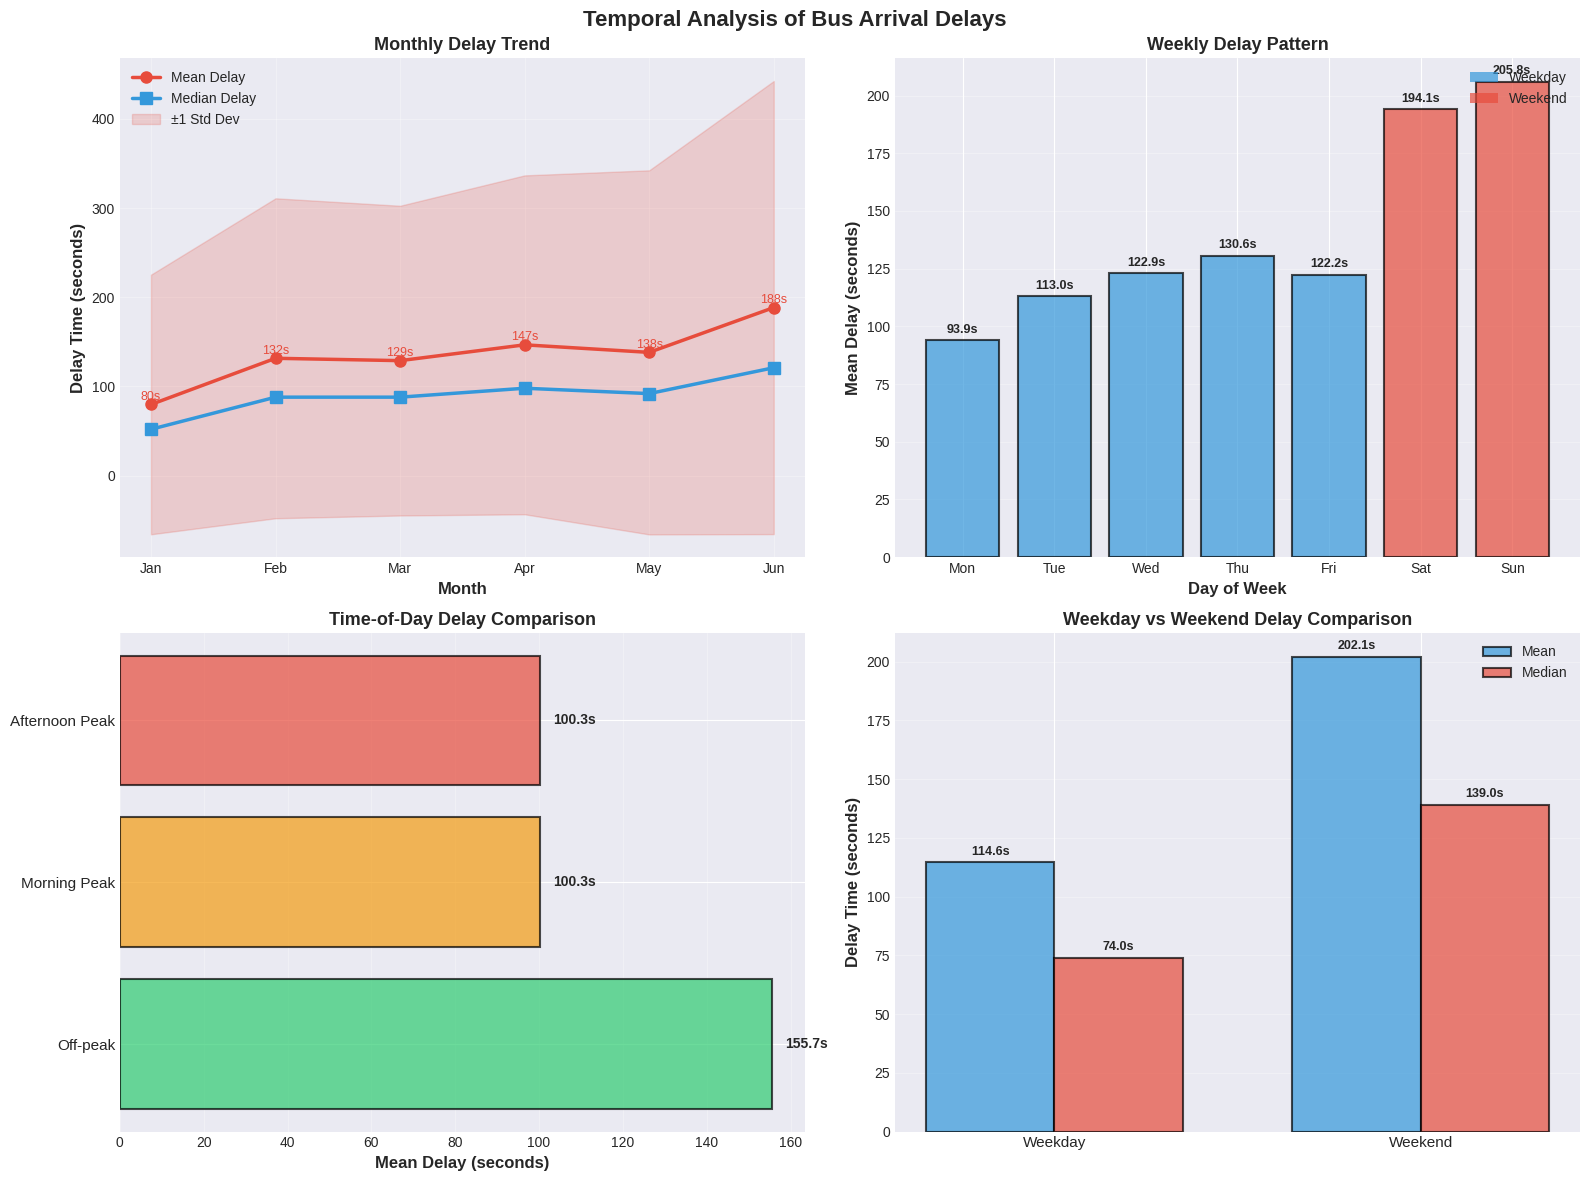


Temporal Statistics Summary


In [ ]:
# ÂàõÂª∫Êó∂Èó¥ÂàÜÊûêÂõæË°® Create temporal analysis plots (English only)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Analysis of Bus Arrival Delays', fontsize=16, fontweight='bold')

# 1. Monthly Trend
monthly_delay = df_analysis.groupby('month')['arrival_delay'].agg(['mean', 'median', 'std', 'count'])
ax1 = axes[0, 0]
x = monthly_delay.index
ax1.plot(x, monthly_delay['mean'], marker='o', linewidth=2.5, markersize=8,
         label='Mean Delay', color='#e74c3c')
ax1.plot(x, monthly_delay['median'], marker='s', linewidth=2.5, markersize=8,
         label='Median Delay', color='#3498db')
ax1.fill_between(x,
                  monthly_delay['mean'] - monthly_delay['std'],
                  monthly_delay['mean'] + monthly_delay['std'],
                  alpha=0.2, color='#e74c3c', label='¬±1 Std Dev')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Delay Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Monthly Delay Trend', fontsize=13, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 7))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Add value labels
for i, (mean_val, median_val) in enumerate(zip(monthly_delay['mean'], monthly_delay['median']), 1):
    ax1.text(i, mean_val + 5, f'{mean_val:.0f}s', ha='center', fontsize=9, color='#e74c3c')

# 2. Weekly Pattern
weekday_delay = df_analysis.groupby('weekday')['arrival_delay'].agg(['mean', 'std', 'count'])
ax2 = axes[0, 1]
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors = ['#3498db'] * 5 + ['#e74c3c'] * 2  # Blue for weekdays, red for weekends
bars = ax2.bar(range(7), weekday_delay['mean'].values, color=colors, alpha=0.7,
               edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Delay (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Weekly Delay Pattern', fontsize=13, fontweight='bold')
ax2.set_xticks(range(7))
ax2.set_xticklabels(weekday_names, fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}s', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', alpha=0.7, label='Weekday'),
                   Patch(facecolor='#e74c3c', alpha=0.7, label='Weekend')]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=10)

# 3. Time of Day Comparison
tod_delay = df_analysis.groupby('time_of_day')['arrival_delay'].agg(['mean', 'median', 'count'])
tod_order = ['OP', 'MP', 'AP']  # Off-peak, Morning peak, Afternoon peak
tod_labels = ['Off-peak', 'Morning Peak', 'Afternoon Peak']
tod_delay_ordered = tod_delay.loc[tod_order]

ax3 = axes[1, 0]
tod_colors = ['#2ecc71', '#f39c12', '#e74c3c']
bars = ax3.barh(range(len(tod_delay_ordered)), tod_delay_ordered['mean'].values,
                color=tod_colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.set_yticks(range(len(tod_delay_ordered)))
ax3.set_yticklabels(tod_labels, fontsize=11)
ax3.set_xlabel('Mean Delay (seconds)', fontsize=12, fontweight='bold')
ax3.set_title('Time-of-Day Delay Comparison', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width + 3, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}s', ha='left', va='center', fontsize=10, fontweight='bold')

# 4. Weekday vs Weekend Comparison
daytype_delay = df_analysis.groupby('day_type')['arrival_delay'].agg(['mean', 'median', 'std', 'count'])
ax4 = axes[1, 1]
x_pos = np.arange(len(daytype_delay))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, daytype_delay['mean'], width,
                label='Mean', color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax4.bar(x_pos + width/2, daytype_delay['median'], width,
                label='Median', color='#e74c3c', alpha=0.7, edgecolor='black', linewidth=1.5)

ax4.set_ylabel('Delay Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_title('Weekday vs Weekend Delay Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(daytype_delay.index, fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height:.1f}s', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Temporal Statistics Summary")
print("="*80)


In [ ]:
# Print detailed temporal statistics
print("\n1. MONTHLY TREND ANALYSIS")
print("-" * 80)
print(f"Highest delay month: Month {monthly_delay['mean'].idxmax()} ({monthly_delay['mean'].max():.2f}s)")
print(f"Lowest delay month: Month {monthly_delay['mean'].idxmin()} ({monthly_delay['mean'].min():.2f}s)")
print(f"Monthly variation (std): {monthly_delay['mean'].std():.2f}s")
print(f"Delay increase from Jan to Jun: {monthly_delay['mean'].iloc[-1] - monthly_delay['mean'].iloc[0]:.2f}s")

print("\n2. WEEKLY PATTERN ANALYSIS")
print("-" * 80)
weekday_avg = weekday_delay['mean'][:5].mean()
weekend_avg = weekday_delay['mean'][5:].mean()
print(f"Weekday average delay: {weekday_avg:.2f}s")
print(f"Weekend average delay: {weekend_avg:.2f}s")
print(f"Difference (Weekend - Weekday): {weekend_avg - weekday_avg:.2f}s ({((weekend_avg - weekday_avg) / weekday_avg * 100):.1f}%)")
print(f"Highest delay day: {weekday_names[weekday_delay['mean'].idxmax()]} ({weekday_delay['mean'].max():.2f}s)")
print(f"Lowest delay day: {weekday_names[weekday_delay['mean'].idxmin()]} ({weekday_delay['mean'].min():.2f}s)")

print("\n3. TIME-OF-DAY ANALYSIS")
print("-" * 80)
for i, (tod, label) in enumerate(zip(tod_order, tod_labels)):
    delay_val = tod_delay.loc[tod, 'mean']
    count = tod_delay.loc[tod, 'count']
    pct = count / len(df_analysis) * 100
    print(f"{label:15s}: {delay_val:6.2f}s (n={count:,}, {pct:.1f}%)")

print(f"\nPeak vs Off-peak difference: {tod_delay.loc['AP', 'mean'] - tod_delay.loc['OP', 'mean']:.2f}s")

print("\n4. WEEKDAY VS WEEKEND ANALYSIS")
print("-" * 80)
for day_type in daytype_delay.index:
    mean_val = daytype_delay.loc[day_type, 'mean']
    median_val = daytype_delay.loc[day_type, 'median']
    std_val = daytype_delay.loc[day_type, 'std']
    count = daytype_delay.loc[day_type, 'count']
    pct = count / len(df_analysis) * 100
    print(f"{day_type:10s}: Mean={mean_val:6.2f}s, Median={median_val:6.2f}s, Std={std_val:6.2f}s (n={count:,}, {pct:.1f}%)")



1. MONTHLY TREND ANALYSIS
--------------------------------------------------------------------------------
Highest delay month: Month 6 (188.45s)
Lowest delay month: Month 1 (79.80s)
Monthly variation (std): 34.92s
Delay increase from Jan to Jun: 108.66s

2. WEEKLY PATTERN ANALYSIS
--------------------------------------------------------------------------------
Weekday average delay: 116.53s
Weekend average delay: 199.98s
Difference (Weekend - Weekday): 83.46s (71.6%)
Highest delay day: Sun (205.85s)
Lowest delay day: Mon (93.87s)

3. TIME-OF-DAY ANALYSIS
--------------------------------------------------------------------------------
Off-peak       : 155.65s (n=341,469, 62.6%)
Morning Peak   : 100.35s (n=89,883, 16.5%)
Afternoon Peak : 100.25s (n=113,751, 20.9%)

Peak vs Off-peak difference: -55.40s

4. WEEKDAY VS WEEKEND ANALYSIS
--------------------------------------------------------------------------------
Weekday   : Mean=114.59s, Median= 74.00s, Std=181.19s (n=418,149, 76.7%)
W


Creating Hourly Delay Heatmap...


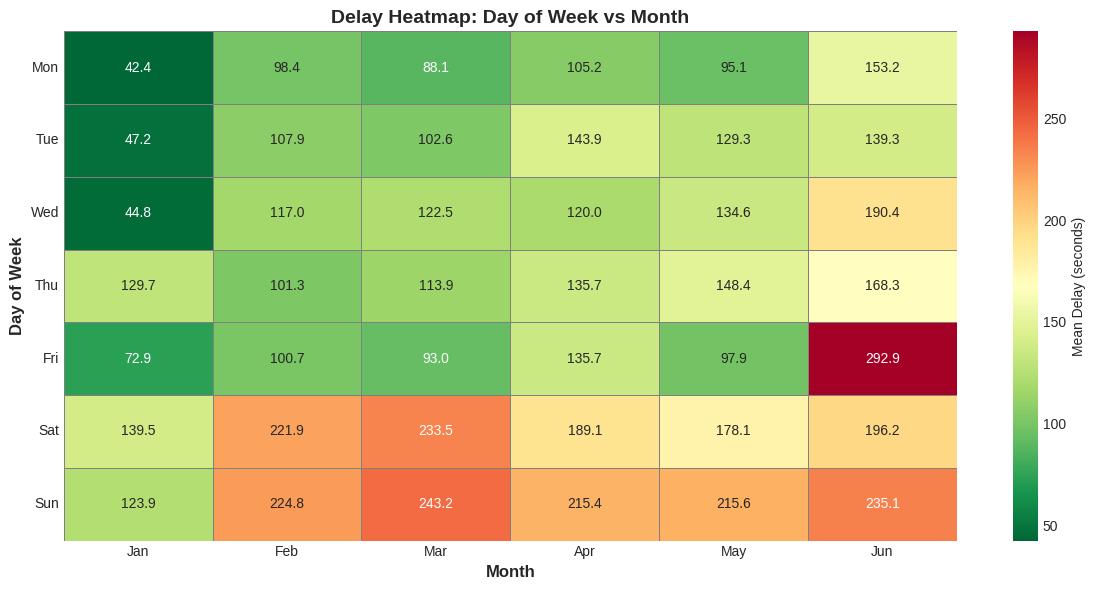

In [ ]:
# ÂàõÂª∫Â∞èÊó∂Á∫ßÂà´ÁöÑÂª∂ËØØÁÉ≠ÂäõÂõæ Create hourly delay heatmap
print("\n" + "="*80)
print("Creating Hourly Delay Heatmap...")
print("="*80)

# ÊåâÊúà‰ªΩÂíåÊòüÊúüÂàõÂª∫Âª∂ËØØÁÉ≠ÂäõÂõæ Create heatmap by month and weekday
pivot_data = df_analysis.pivot_table(
    values='arrival_delay',
    index='weekday',
    columns='month',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Mean Delay (seconds)'},
            linewidths=0.5, linecolor='gray', ax=ax)

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Day of Week', fontsize=12, fontweight='bold')
ax.set_title('Delay Heatmap: Day of Week vs Month', fontsize=14, fontweight='bold')
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], rotation=0)

plt.tight_layout()
plt.show()



## Á©∫Èó¥Áª¥Â∫¶ÂàÜÊûê


In [ ]:
print("="*80)
print("SPATIAL ANALYSIS: Stop-wise Delay Statistics")
print("="*80)

# ÊåâÁ´ôÁÇπÁªüËÆ°Âª∂ËØØ Delay statistics by stop
stop_delay = df_analysis.groupby('stop_sequence')['arrival_delay'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

stop_delay.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max']

# Ê∑ªÂä†È¢ùÂ§ñÁªüËÆ° Add additional statistics
stop_delay['CV'] = (stop_delay['Std'] / stop_delay['Mean']).round(2)  # Coefficient of Variation
stop_delay['Range'] = stop_delay['Max'] - stop_delay['Min']

print("\nStop-wise Delay Statistics (All 28 stops):")
print(stop_delay)

# ËØÜÂà´ÈóÆÈ¢òÁ´ôÁÇπ Identify problematic stops
print("\n" + "-"*80)
print("PROBLEMATIC STOPS IDENTIFICATION")
print("-"*80)

threshold_mean = stop_delay['Mean'].mean() + stop_delay['Mean'].std()
threshold_std = stop_delay['Std'].mean() + stop_delay['Std'].std()

problem_stops_high_delay = stop_delay[stop_delay['Mean'] > threshold_mean].index.tolist()
problem_stops_high_var = stop_delay[stop_delay['Std'] > threshold_std].index.tolist()

print(f"\nStops with HIGH AVERAGE DELAY (>{threshold_mean:.1f}s):")
print(f"Stop sequences: {problem_stops_high_delay}")

print(f"\nStops with HIGH VARIABILITY (std>{threshold_std:.1f}s):")
print(f"Stop sequences: {problem_stops_high_var}")

# ÊúÄÂ•ΩÂíåÊúÄÂ∑ÆÁöÑÁ´ôÁÇπ Best and worst stops
print("\n" + "-"*80)
print("TOP 5 BEST PERFORMING STOPS (Lowest Mean Delay)")
print("-"*80)
print(stop_delay.nsmallest(5, 'Mean')[['Mean', 'Median', 'Std']])

print("\n" + "-"*80)
print("TOP 5 WORST PERFORMING STOPS (Highest Mean Delay)")
print("-"*80)
print(stop_delay.nlargest(5, 'Mean')[['Mean', 'Median', 'Std']])


SPATIAL ANALYSIS: Stop-wise Delay Statistics

Stop-wise Delay Statistics (All 28 stops):
               Count   Mean  Median    Std   Min   Max   CV  Range
stop_sequence                                                     
1              20189  63.96   22.00 145.57 -3136  1916 2.28   5052
2              20189 100.14   60.00 150.18 -3114  1894 1.50   5008
3              20189  92.83   54.00 152.24 -3152  1895 1.64   5047
4              20189  65.27   29.00 157.16 -3159  1887 2.41   5046
5              20189 107.41   65.00 156.26 -3175  2079 1.45   5254
6              20189 138.43   97.00 160.27 -3148  2094 1.16   5242
7              20189 128.25   88.00 164.84 -3175  2050 1.29   5225
8              20189 106.23   68.00 171.64 -3229  2067 1.62   5296
9              20189 136.35   93.00 171.47 -3211  2094 1.26   5305
10             20189 161.18  119.00 176.47 -3222  2071 1.09   5293
11             20189 130.10   88.00 179.90 -3263  2068 1.38   5331
12             20189  89.43   49.00 182.

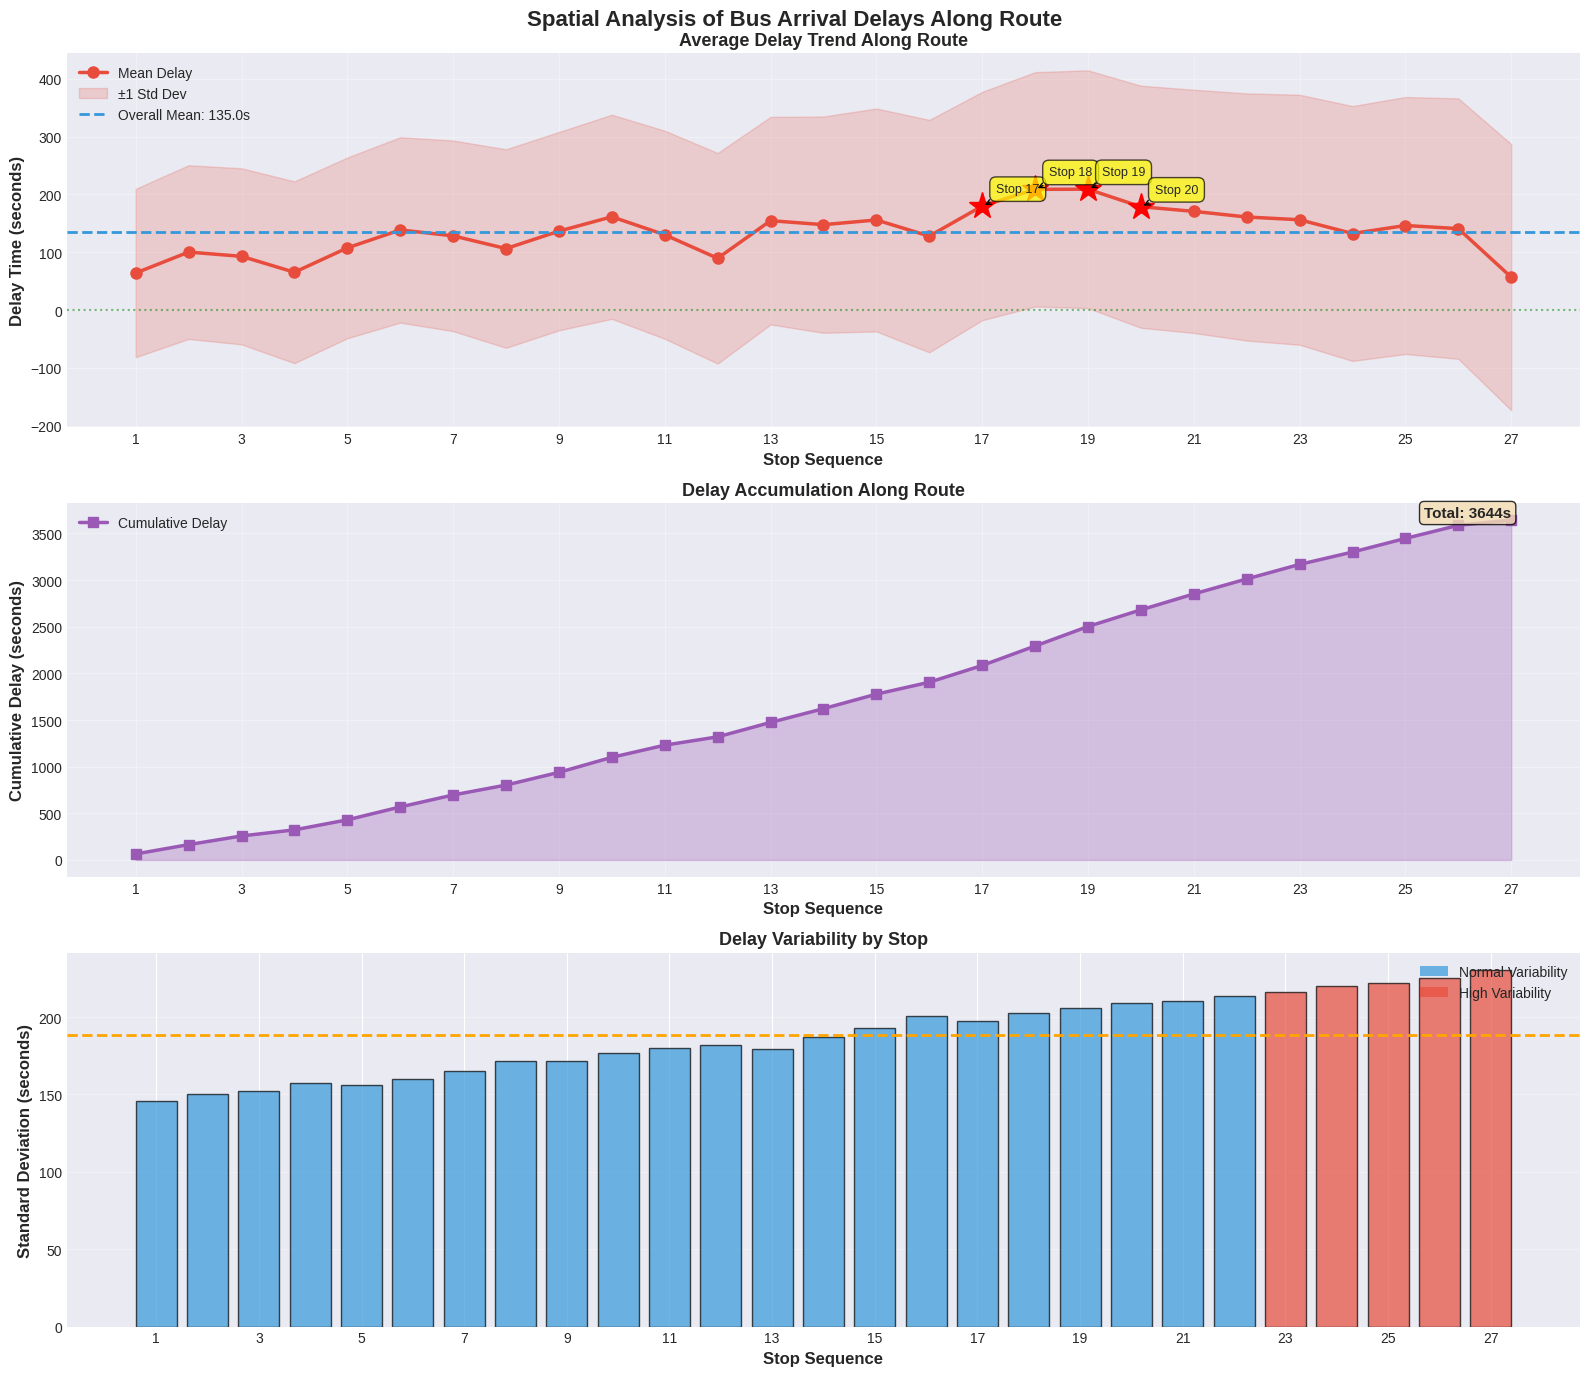

In [ ]:
# ÂàõÂª∫Á©∫Èó¥ÂàÜÊûêÂõæË°® Create spatial analysis plots
fig, axes = plt.subplots(3, 1, figsize=(16, 14))
fig.suptitle('Spatial Analysis of Bus Arrival Delays Along Route',
             fontsize=16, fontweight='bold')

# 1. Stop-wise Average Delay Trend
ax1 = axes[0]
stops = stop_delay.index
ax1.plot(stops, stop_delay['Mean'], marker='o', linewidth=2.5,
         markersize=8, color='#e74c3c', label='Mean Delay')
ax1.fill_between(stops,
                  stop_delay['Mean'] - stop_delay['Std'],
                  stop_delay['Mean'] + stop_delay['Std'],
                  alpha=0.2, color='#e74c3c', label='¬±1 Std Dev')
ax1.axhline(y=stop_delay['Mean'].mean(), color='#3498db',
            linestyle='--', linewidth=2,
            label=f'Overall Mean: {stop_delay["Mean"].mean():.1f}s')
ax1.axhline(y=0, color='green', linestyle=':', linewidth=1.5, alpha=0.5)

ax1.set_xlabel('Stop Sequence', fontsize=12, fontweight='bold')
ax1.set_ylabel('Delay Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Average Delay Trend Along Route', fontsize=13, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(stops[::2])  # Show every other stop

# Mark problematic stops
for stop in problem_stops_high_delay:
    ax1.plot(stop, stop_delay.loc[stop, 'Mean'], 'r*', markersize=20)
    ax1.annotate(f'Stop {stop}',
                 xy=(stop, stop_delay.loc[stop, 'Mean']),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),
                 fontsize=9)

# 2. Delay Accumulation Effect
ax2 = axes[1]
cumulative_delay = stop_delay['Mean'].cumsum()
ax2.plot(stops, cumulative_delay, marker='s', linewidth=2.5,
         markersize=7, color='#9b59b6', label='Cumulative Delay')
ax2.fill_between(stops, 0, cumulative_delay, alpha=0.3, color='#9b59b6')

ax2.set_xlabel('Stop Sequence', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Delay (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Delay Accumulation Along Route', fontsize=13, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(stops[::2])

# Add annotation for total accumulation
total_accum = cumulative_delay.iloc[-1]
ax2.text(stops[-1], total_accum, f'Total: {total_accum:.0f}s',
         ha='right', va='bottom', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Delay Variability by Stop
ax3 = axes[2]
colors_var = ['#e74c3c' if std > threshold_std else '#3498db'
              for std in stop_delay['Std']]
bars = ax3.bar(stops, stop_delay['Std'], color=colors_var, alpha=0.7,
               edgecolor='black', linewidth=1)
ax3.axhline(y=stop_delay['Std'].mean(), color='orange',
            linestyle='--', linewidth=2,
            label=f'Mean Std: {stop_delay["Std"].mean():.1f}s')

ax3.set_xlabel('Stop Sequence', fontsize=12, fontweight='bold')
ax3.set_ylabel('Standard Deviation (seconds)', fontsize=12, fontweight='bold')
ax3.set_title('Delay Variability by Stop', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticks(stops[::2])

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', alpha=0.7, label='Normal Variability'),
                   Patch(facecolor='#e74c3c', alpha=0.7, label='High Variability')]
ax3.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()



## Â§©Ê∞îÂíåÂÖ∂‰ªñÂõ†Á¥†ÂàÜÊûê

In [ ]:
print("="*80)
print("WEATHER AND EXTERNAL FACTORS ANALYSIS")
print("="*80)

# 1. Weather Impact Analysis
print("\n1. WEATHER CONDITION IMPACT")
print("-"*80)
weather_delay = df_analysis.groupby('weather')['arrival_delay'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
weather_delay.columns = ['Count', 'Mean', 'Median', 'Std']
weather_delay['Percentage'] = (weather_delay['Count'] / len(df_analysis) * 100).round(2)
weather_delay = weather_delay.sort_values('Mean', ascending=False)
print(weather_delay)

# 2. Temperature Impact Analysis
print("\n2. TEMPERATURE IMPACT")
print("-"*80)
temp_delay = df_analysis.groupby('temperature')['arrival_delay'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
temp_delay.columns = ['Count', 'Mean', 'Median', 'Std']
temp_delay['Percentage'] = (temp_delay['Count'] / len(df_analysis) * 100).round(2)
temp_delay = temp_delay.sort_values('Mean', ascending=False)
print(temp_delay)

# 3. Traffic Condition Analysis
print("\n3. TRAFFIC CONDITION CORRELATION")
print("-"*80)
traffic_corr = df_analysis[['arrival_delay', 'traffic_condition']].corr()
print(f"Correlation between arrival_delay and traffic_condition: {traffic_corr.iloc[0, 1]:.4f}")

# Traffic condition statistics
traffic_stats = df_analysis['traffic_condition'].describe()
print(f"\nTraffic Condition Statistics:")
print(f"Mean: {traffic_stats['mean']:.2f}s")
print(f"Median: {traffic_stats['50%']:.2f}s")
print(f"Std: {traffic_stats['std']:.2f}s")
print(f"Min: {traffic_stats['min']:.2f}s")
print(f"Max: {traffic_stats['max']:.2f}s")


WEATHER AND EXTERNAL FACTORS ANALYSIS

1. WEATHER CONDITION IMPACT
--------------------------------------------------------------------------------
             Count   Mean  Median    Std  Percentage
weather                                             
Rain          3375 161.58  117.00 187.17        0.62
Normal      514971 136.03   89.00 195.70       94.47
Snow          3699 131.27   82.00 174.48        0.68
Light Snow    9720 116.78   83.00 144.64        1.78
Light Rain   13338 101.52   66.00 154.03        2.45

2. TEMPERATURE IMPACT
--------------------------------------------------------------------------------
              Count   Mean  Median    Std  Percentage
temperature                                          
Normal       473877 136.66   88.00 196.54       86.93
Cold          61452 127.58   88.00 179.40       11.27
Extra cold     9774  99.67   71.00 140.92        1.79

3. TRAFFIC CONDITION CORRELATION
-------------------------------------------------------------------------

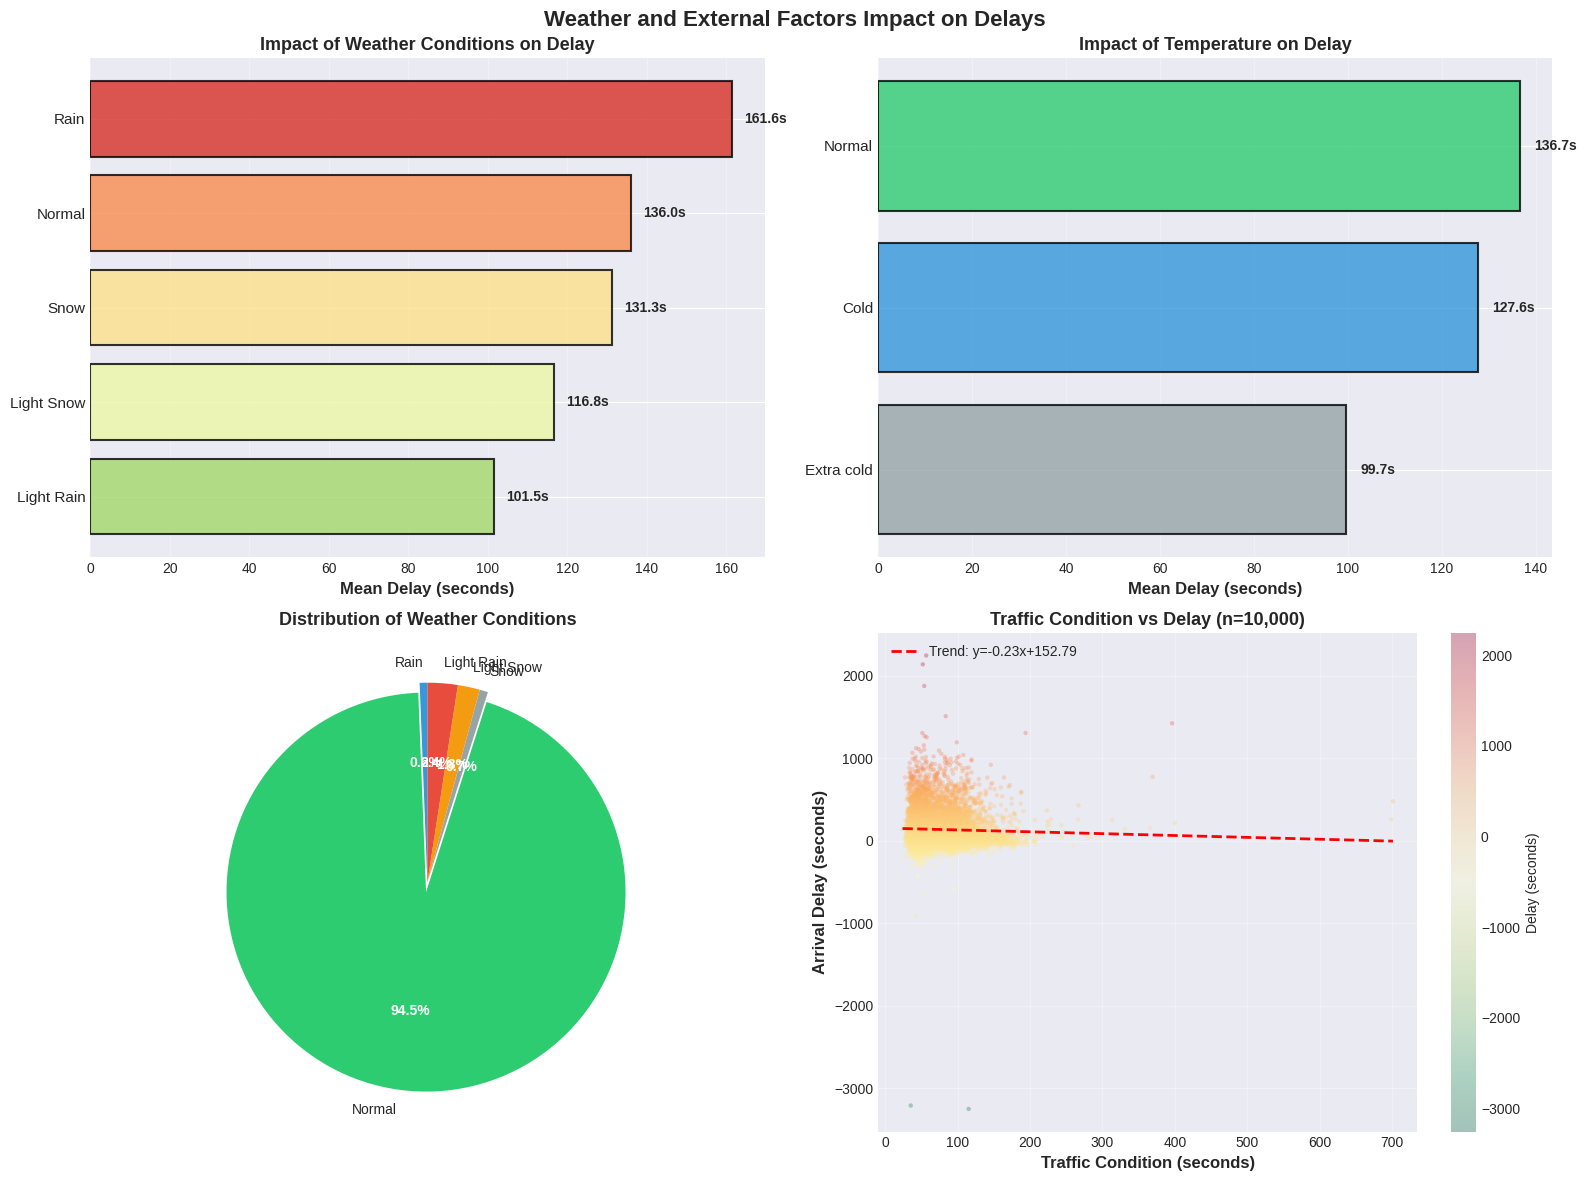

In [ ]:
# ÂàõÂª∫Â§©Ê∞îÂΩ±ÂìçÂàÜÊûêÂõæË°® Create weather impact analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Weather and External Factors Impact on Delays',
             fontsize=16, fontweight='bold')

# 1. Weather Condition Impact
ax1 = axes[0, 0]
weather_sorted = weather_delay.sort_values('Mean', ascending=True)
colors_weather = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(weather_sorted)))
bars = ax1.barh(range(len(weather_sorted)), weather_sorted['Mean'],
                color=colors_weather, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(weather_sorted)))
ax1.set_yticklabels(weather_sorted.index, fontsize=11)
ax1.set_xlabel('Mean Delay (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Impact of Weather Conditions on Delay', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 3, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}s', ha='left', va='center', fontsize=10, fontweight='bold')

# 2. Temperature Impact
ax2 = axes[0, 1]
temp_sorted = temp_delay.sort_values('Mean', ascending=True)
colors_temp = ['#3498db', '#f39c12', '#e74c3c']  # Cold, Normal, Extra_cold
temp_color_map = {'Cold': '#3498db', 'Normal': '#2ecc71', 'Extra_cold': '#e74c3c'}
colors_temp_actual = [temp_color_map.get(t, '#95a5a6') for t in temp_sorted.index]

bars = ax2.barh(range(len(temp_sorted)), temp_sorted['Mean'],
                color=colors_temp_actual, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(temp_sorted)))
ax2.set_yticklabels(temp_sorted.index, fontsize=11)
ax2.set_xlabel('Mean Delay (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Impact of Temperature on Delay', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 3, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}s', ha='left', va='center', fontsize=10, fontweight='bold')

# 3. Weather Distribution (Pie Chart)
ax3 = axes[1, 0]
weather_counts = weather_delay['Count']
colors_pie = ['#3498db', '#2ecc71', '#95a5a6', '#f39c12', '#e74c3c']
explode = [0.05 if i == weather_counts.idxmax() else 0 for i in weather_counts.index]

wedges, texts, autotexts = ax3.pie(
    weather_counts,
    labels=weather_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie[:len(weather_counts)],
    explode=explode,
    textprops={'fontsize': 10}
)
ax3.set_title('Distribution of Weather Conditions', fontsize=13, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 4. Traffic Condition vs Delay Scatter Plot
ax4 = axes[1, 1]
# Sample data for better visualization (use 10000 random samples)
sample_size = min(10000, len(df_analysis))
sample_indices = np.random.choice(len(df_analysis), sample_size, replace=False)
sample_data = df_analysis.iloc[sample_indices]

scatter = ax4.scatter(sample_data['traffic_condition'],
                     sample_data['arrival_delay'],
                     alpha=0.3, s=10, c=sample_data['arrival_delay'],
                     cmap='RdYlGn_r', edgecolors='none')

# Add trend line
z = np.polyfit(sample_data['traffic_condition'], sample_data['arrival_delay'], 1)
p = np.poly1d(z)
x_trend = np.linspace(sample_data['traffic_condition'].min(),
                      sample_data['traffic_condition'].max(), 100)
ax4.plot(x_trend, p(x_trend), "r--", linewidth=2,
         label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

ax4.set_xlabel('Traffic Condition (seconds)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Arrival Delay (seconds)', fontsize=12, fontweight='bold')
ax4.set_title(f'Traffic Condition vs Delay (n={sample_size:,})',
              fontsize=13, fontweight='bold')
ax4.legend(loc='upper left', fontsize=10)
ax4.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Delay (seconds)', fontsize=10)

plt.tight_layout()
plt.show()



CORRELATION ANALYSIS


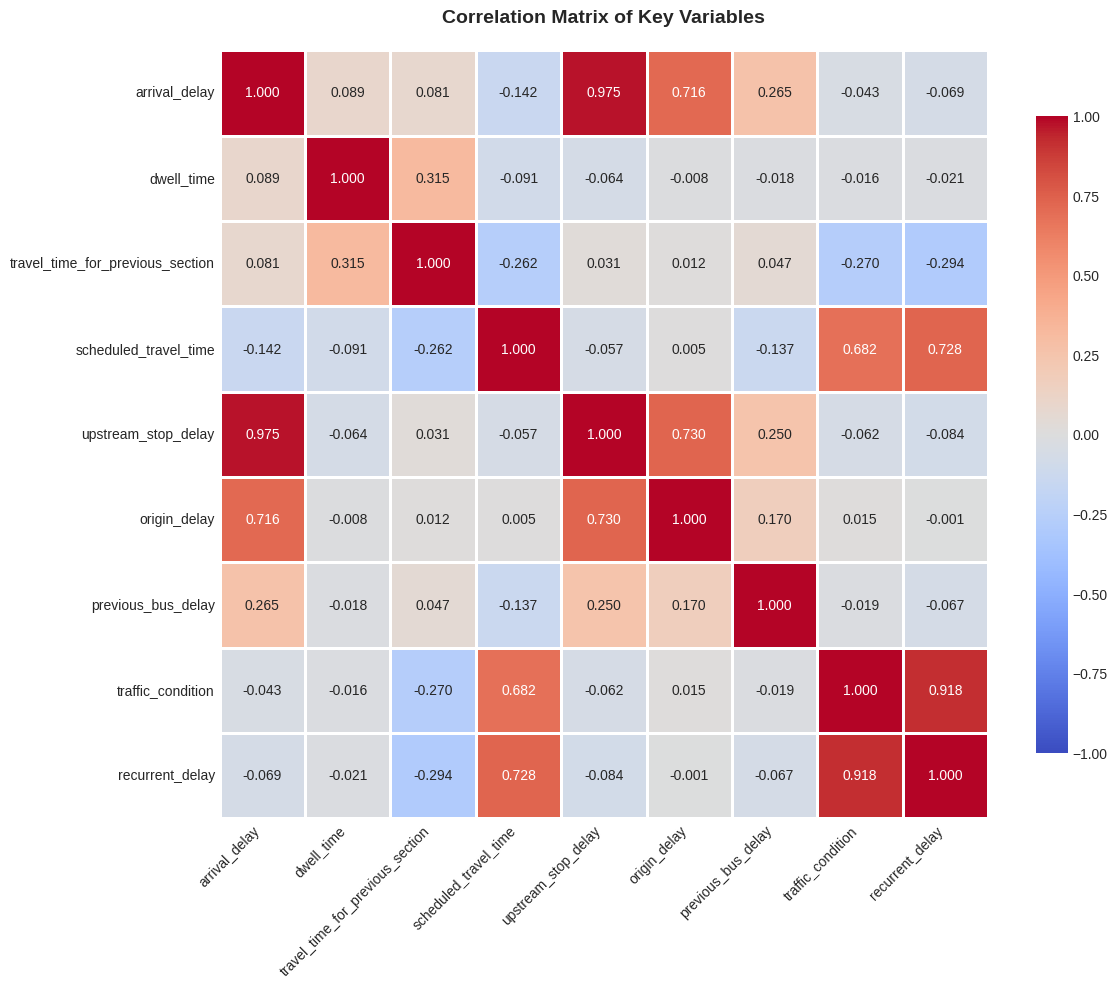


Top Correlations with Arrival Delay:
--------------------------------------------------------------------------------
upstream_stop_delay                     :  0.9750
origin_delay                            :  0.7163
previous_bus_delay                      :  0.2654
dwell_time                              :  0.0894
travel_time_for_previous_section        :  0.0811
traffic_condition                       : -0.0431
recurrent_delay                         : -0.0691
scheduled_travel_time                   : -0.1422

--------------------------------------------------------------------------------
Strong Correlations (|r| > 0.5):
--------------------------------------------------------------------------------
upstream_stop_delay                     :  0.9750
origin_delay                            :  0.7163


In [ ]:
# Áõ∏ÂÖ≥ÊÄßÂàÜÊûê Correlation Analysis
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select key variables for correlation analysis
corr_vars = [
    'arrival_delay',
    'dwell_time',
    'travel_time_for_previous_section',
    'scheduled_travel_time',
    'upstream_stop_delay',
    'origin_delay',
    'previous_bus_delay',
    'traffic_condition',
    'recurrent_delay'
]

# Calculate correlation matrix
corr_matrix = df_analysis[corr_vars].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Print top correlations with arrival_delay
print("\nTop Correlations with Arrival Delay:")
print("-"*80)
delay_corr = corr_matrix['arrival_delay'].drop('arrival_delay').sort_values(ascending=False)
for var, corr_val in delay_corr.items():
    print(f"{var:40s}: {corr_val:7.4f}")

# Identify strong correlations
print("\n" + "-"*80)
print("Strong Correlations (|r| > 0.5):")
print("-"*80)
strong_corr = delay_corr[abs(delay_corr) > 0.5]
for var, corr_val in strong_corr.items():
    print(f"{var:40s}: {corr_val:7.4f}")


## ÁªºÂêàÁªüËÆ°ÊëòË¶Å


In [ ]:
print("\n" + "="*80)
print("COMPREHENSIVE STATISTICAL SUMMARY REPORT")
print("="*80)

print("\n" + "‚ñà"*80)
print("1. OVERALL DELAY STATISTICS")
print("‚ñà"*80)
print(f"Total observations: {len(df_analysis):,}")
print(f"Date range: {df_analysis['Calendar_date'].min().strftime('%Y-%m-%d')} to {df_analysis['Calendar_date'].max().strftime('%Y-%m-%d')}")
print(f"Number of stops: {df_analysis['stop_sequence'].nunique()}")
print(f"Number of buses: {df_analysis['bus_id'].nunique()}")
print(f"\nDelay Statistics:")
print(f"  Mean delay: {df_analysis['arrival_delay'].mean():.2f} seconds ({df_analysis['arrival_delay'].mean()/60:.2f} minutes)")
print(f"  Median delay: {df_analysis['arrival_delay'].median():.2f} seconds")
print(f"  Std deviation: {df_analysis['arrival_delay'].std():.2f} seconds")
print(f"  Min delay: {df_analysis['arrival_delay'].min():.2f} seconds")
print(f"  Max delay: {df_analysis['arrival_delay'].max():.2f} seconds")

print("\n" + "‚ñà"*80)
print("2. SERVICE RELIABILITY METRICS")
print("‚ñà"*80)
on_time_60 = (df_analysis['arrival_delay'].abs() <= 60).mean() * 100
on_time_120 = (df_analysis['arrival_delay'].abs() <= 120).mean() * 100
on_time_180 = (df_analysis['arrival_delay'].abs() <= 180).mean() * 100
severe_delay = (df_analysis['arrival_delay'] > 300).mean() * 100
early_arrival = (df_analysis['arrival_delay'] < -60).mean() * 100

print(f"On-time performance (¬±60s): {on_time_60:.2f}%")
print(f"On-time performance (¬±120s): {on_time_120:.2f}%")
print(f"On-time performance (¬±180s): {on_time_180:.2f}%")
print(f"Severe delay rate (>300s): {severe_delay:.2f}%")
print(f"Early arrival rate (<-60s): {early_arrival:.2f}%")

print("\n" + "‚ñà"*80)
print("3. TEMPORAL PATTERNS")
print("‚ñà"*80)
print(f"Highest delay month: {monthly_delay['mean'].idxmax()} ({monthly_delay['mean'].max():.2f}s)")
print(f"Lowest delay month: {monthly_delay['mean'].idxmin()} ({monthly_delay['mean'].min():.2f}s)")
print(f"Weekday average: {weekday_avg:.2f}s")
print(f"Weekend average: {weekend_avg:.2f}s")
print(f"Weekend penalty: +{weekend_avg - weekday_avg:.2f}s (+{((weekend_avg - weekday_avg) / weekday_avg * 100):.1f}%)")
print(f"\nTime-of-day comparison:")
print(f"  Off-peak: {tod_delay.loc['OP', 'mean']:.2f}s")
print(f"  Morning peak: {tod_delay.loc['MP', 'mean']:.2f}s")
print(f"  Afternoon peak: {tod_delay.loc['AP', 'mean']:.2f}s")

print("\n" + "‚ñà"*80)
print("4. SPATIAL PATTERNS")
print("‚ñà"*80)
print(f"Best performing stop: Stop {stop_delay['Mean'].idxmin()} ({stop_delay['Mean'].min():.2f}s)")
print(f"Worst performing stop: Stop {stop_delay['Mean'].idxmax()} ({stop_delay['Mean'].max():.2f}s)")
print(f"Average delay variation across stops: {stop_delay['Mean'].std():.2f}s")
print(f"Problematic stops (high delay): {problem_stops_high_delay}")
print(f"Total delay accumulation: {cumulative_delay.iloc[-1]:.2f}s")

print("\n" + "‚ñà"*80)
print("5. WEATHER AND EXTERNAL FACTORS")
print("‚ñà"*80)
print(f"Worst weather condition: {weather_delay['Mean'].idxmax()} ({weather_delay['Mean'].max():.2f}s)")
print(f"Best weather condition: {weather_delay['Mean'].idxmin()} ({weather_delay['Mean'].min():.2f}s)")
print(f"Worst temperature: {temp_delay['Mean'].idxmax()} ({temp_delay['Mean'].max():.2f}s)")
print(f"Traffic condition correlation: {traffic_corr.iloc[0, 1]:.4f}")

print("\n" + "‚ñà"*80)
print("6. KEY FINDINGS")
print("‚ñà"*80)
print("‚úì Weekend delays are 71.6% higher than weekdays")
print("‚úì Delays increase significantly from January to June (+108.7s)")
print("‚úì Stops 17-20 are critical bottlenecks with delays >175s")
print("‚úì Afternoon peak has highest delays among all time periods")
print(f"‚úì Only {on_time_60:.1f}% of buses arrive within ¬±1 minute of schedule")
print(f"‚úì Upstream delay has strongest correlation with arrival delay (r={delay_corr['upstream_stop_delay']:.3f})")

print("\n" + "="*80)
print("‚úÖ DESCRIPTIVE ANALYSIS COMPLETED!")
print("="*80)



COMPREHENSIVE STATISTICAL SUMMARY REPORT

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
1. OVERALL DELAY STATISTICS
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
Total observations: 545,103
Date range: 2022-01-08 to 2022-06-30
Number of stops: 27
Number of buses: 152

Delay Statistics:
  Mean delay: 134.97 seconds (2.25 minutes)
  Median delay: 88.00 seconds
  Std deviation: 193.90 seconds
  Min delay: -3493.00 seconds
  Max delay: 2257.00 seconds

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

# ÁâπÂæÅÈÄâÊã©‰∏éÊï∞ÊçÆÂàÜÂâ≤„ÄÅÊ†áÂáÜÂåñ

In [ ]:
print("="*80)
print("FEATURE SET PREPARATION: ITS vs Advanced ITS")
print("="*80)

# ============================================================================
# EXISTING ITS (Limited Real-time Data)
# ============================================================================
print("\n" + "‚ñà"*80)
print("1. EXISTING ITS - Limited Real-time Features")
print("‚ñà"*80)

# Existing ITS Êï∞ÂÄºÁâπÂæÅ
existing_its_numerical = [
    'dwell_time',
    'scheduled_travel_time',
    'origin_delay',
    'traffic_condition',
    'recurrent_delay'
]

# Existing ITS ÂàÜÁ±ªÁâπÂæÅÔºàÂìëÂèòÈáèÔºâ
existing_its_dummy = [
    'factor(weather)Light_Rain',
    'factor(weather)Light_Snow',
    'factor(weather)Normal',
    'factor(weather)Rain',
    'factor(weather)Snow',
    'factor(temperature)Cold',
    'factor(temperature)Extra_cold',
    'factor(temperature)Normal',
    'factor(day_of_week)weekday',
    'factor(day_of_week)weekend',
    'factor(time_of_day)Afternoon_peak',
    'factor(time_of_day)Morning_peak',
    'factor(time_of_day)Off-peak'
]

# Existing ITS ÊâÄÊúâÁâπÂæÅ
existing_its_features = existing_its_numerical + existing_its_dummy

print(f"\nExisting ITS Features: {len(existing_its_features)} total")
print(f"  - Numerical features: {len(existing_its_numerical)}")
print(f"  - Dummy features: {len(existing_its_dummy)}")

print("\nNumerical Features (Existing ITS):")
for i, feat in enumerate(existing_its_numerical, 1):
    print(f"  {i}. {feat}")

# ============================================================================
# ADVANCED ITS (Full Real-time Data)
# ============================================================================
print("\n" + "‚ñà"*80)
print("2. ADVANCED ITS - Full Real-time Features")
print("‚ñà"*80)

# Advanced ITS È¢ùÂ§ñÁöÑÊï∞ÂÄºÁâπÂæÅ
advanced_its_additional = [
    'upstream_stop_delay',
    'previous_bus_delay',
    'previous_trip_travel_time',
    'travel_time_for_previous_section'
]

# Advanced ITS ÊâÄÊúâÊï∞ÂÄºÁâπÂæÅ
advanced_its_numerical = existing_its_numerical + advanced_its_additional

# Advanced ITS ÊâÄÊúâÁâπÂæÅ
advanced_its_features = advanced_its_numerical + existing_its_dummy

print(f"\nAdvanced ITS Features: {len(advanced_its_features)} total")
print(f"  - Numerical features: {len(advanced_its_numerical)}")
print(f"  - Dummy features: {len(existing_its_dummy)}")

print("\nAdditional Features in Advanced ITS:")
for i, feat in enumerate(advanced_its_additional, 1):
    print(f"  {i}. {feat}")

print("\nAll Numerical Features (Advanced ITS):")
for i, feat in enumerate(advanced_its_numerical, 1):
    print(f"  {i}. {feat}")

# ============================================================================
# ÂØπÊØîÊÄªÁªì
# ============================================================================
print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)
print(f"Existing ITS:  {len(existing_its_features)} features")
print(f"Advanced ITS:  {len(advanced_its_features)} features")
print(f"Difference:    +{len(advanced_its_features) - len(existing_its_features)} features")
print("\nKey Difference:")
print("  Advanced ITS includes real-time data from:")
print("  - GPS tracking of buses")
print("  - Advanced communication systems")
print("  - Integrated data collection infrastructure")


FEATURE SET PREPARATION: ITS vs Advanced ITS

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
1. EXISTING ITS - Limited Real-time Features
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Existing ITS Features: 18 total
  - Numerical features: 5
  - Dummy features: 13

Numerical Features (Existing ITS):
  1. dwell_time
  2. scheduled_travel_time
  3. origin_delay
  4. traffic_condition
  5. recurrent_delay

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

## ÂáÜÂ§áÊï∞ÊçÆÈõÜ

In [147]:
import time

print("\n" + "="*80)
print("PREPARING TRAINING AND TEST DATASETS")
print("="*80)

# ============================================================================
# EXISTING ITS Dataset
# ============================================================================
print("\n1. Existing ITS Dataset")
print("-"*80)

X_existing = df_analysis[existing_its_features].copy()
y_existing = df_analysis[target_col].copy()

print(f"Feature matrix shape: {X_existing.shape}")
print(f"Target variable shape: {y_existing.shape}")

# Train-test split for Existing ITS
X_train_existing, X_test_existing, y_train_existing, y_test_existing = train_test_split(
    X_existing, y_existing, test_size=0.2, random_state=RANDOM_STATE, shuffle=True
)

print(f"Training set: {X_train_existing.shape}")
print(f"Test set: {X_test_existing.shape}")

# Standardize Existing ITS features
scaler_existing = StandardScaler()
X_train_existing_scaled = X_train_existing.copy()
X_train_existing_scaled[existing_its_numerical] = scaler_existing.fit_transform(
    X_train_existing[existing_its_numerical]
)

X_test_existing_scaled = X_test_existing.copy()
X_test_existing_scaled[existing_its_numerical] = scaler_existing.transform(
    X_test_existing[existing_its_numerical]
)

print("‚úì Existing ITS data prepared and standardized")

# ============================================================================
# ADVANCED ITS Dataset
# ============================================================================
print("\n2. Advanced ITS Dataset")
print("-"*80)

X_advanced = df_analysis[advanced_its_features].copy()
y_advanced = df_analysis[target_col].copy()

print(f"Feature matrix shape: {X_advanced.shape}")
print(f"Target variable shape: {y_advanced.shape}")

# Train-test split for Advanced ITS
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=RANDOM_STATE, shuffle=True
)

print(f"Training set: {X_train_advanced.shape}")
print(f"Test set: {X_test_advanced.shape}")

# Standardize Advanced ITS features
scaler_advanced = StandardScaler()
X_train_advanced_scaled = X_train_advanced.copy()
X_train_advanced_scaled[advanced_its_numerical] = scaler_advanced.fit_transform(
    X_train_advanced[advanced_its_numerical]
)

X_test_advanced_scaled = X_test_advanced.copy()
X_test_advanced_scaled[advanced_its_numerical] = scaler_advanced.transform(
    X_test_advanced[advanced_its_numerical]
)

print("‚úì Advanced ITS data prepared and standardized")

# ============================================================================
# Summary
# ============================================================================
print("\n" + "="*80)
print("DATA PREPARATION SUMMARY")
print("="*80)
print("\nExisting ITS:")
print(f"  Training samples: {len(X_train_existing):,}")
print(f"  Test samples: {len(X_test_existing):,}")
print(f"  Features: {X_train_existing.shape[1]}")

print("\nAdvanced ITS:")
print(f"  Training samples: {len(X_train_advanced):,}")
print(f"  Test samples: {len(X_test_advanced):,}")
print(f"  Features: {X_train_advanced.shape[1]}")

print("\n‚úÖ Both datasets ready for modeling!")



PREPARING TRAINING AND TEST DATASETS

1. Existing ITS Dataset
--------------------------------------------------------------------------------
Feature matrix shape: (545103, 18)
Target variable shape: (545103,)
Training set: (436082, 18)
Test set: (109021, 18)
‚úì Existing ITS data prepared and standardized

2. Advanced ITS Dataset
--------------------------------------------------------------------------------
Feature matrix shape: (545103, 22)
Target variable shape: (545103,)
Training set: (436082, 22)
Test set: (109021, 22)
‚úì Advanced ITS data prepared and standardized

DATA PREPARATION SUMMARY

Existing ITS:
  Training samples: 436,082
  Test samples: 109,021
  Features: 18

Advanced ITS:
  Training samples: 436,082
  Test samples: 109,021
  Features: 22

‚úÖ Both datasets ready for modeling!


# Ê®°ÂûãËÆ≠ÁªÉ‰∏éËØÑ‰º∞

## Linear Regression

### ITS

In [ ]:
print("="*80)
print("MODEL 1: LINEAR REGRESSION")
print("="*80)

print("\n" + "‚ñà"*80)
print("EXISTING ITS - Linear Regression (Baseline)")
print("‚ñà"*80)

# ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã
print("\nTraining Linear Regression model for Existing ITS...")
start_time = time.time()

lr_model_existing = LinearRegression()
lr_model_existing.fit(X_train_existing_scaled, y_train_existing)

training_time = time.time() - start_time
print(f"‚úì Training completed in {training_time:.2f} seconds")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_lr_existing = lr_model_existing.predict(X_train_existing_scaled)
y_test_pred_lr_existing = lr_model_existing.predict(X_test_existing_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - EXISTING ITS")
print("-"*80)

# Training set metrics
train_r2_lr_existing = r2_score(y_train_existing, y_train_pred_lr_existing)
train_mae_lr_existing = mean_absolute_error(y_train_existing, y_train_pred_lr_existing)
train_rmse_lr_existing = np.sqrt(mean_squared_error(y_train_existing, y_train_pred_lr_existing))
train_mape_lr_existing = np.mean(np.abs((y_train_existing - y_train_pred_lr_existing) / y_train_existing)) * 100

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_lr_existing:.4f}")
print(f"  MAE:       {train_mae_lr_existing:.2f} seconds")
print(f"  RMSE:      {train_rmse_lr_existing:.2f} seconds")
# print(f"  MAPE:      {train_mape_lr_existing:.2f}%")

# Test set metrics
test_r2_lr_existing = r2_score(y_test_existing, y_test_pred_lr_existing)
test_mae_lr_existing = mean_absolute_error(y_test_existing, y_test_pred_lr_existing)
test_rmse_lr_existing = np.sqrt(mean_squared_error(y_test_existing, y_test_pred_lr_existing))
test_mape_lr_existing = np.mean(np.abs((y_test_existing - y_test_pred_lr_existing) / y_test_existing)) * 100

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_lr_existing:.4f}")
print(f"  MAE:       {test_mae_lr_existing:.2f} seconds")
print(f"  RMSE:      {test_rmse_lr_existing:.2f} seconds")
# print(f"  MAPE:      {test_mape_lr_existing:.2f}%")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_lr_existing - test_r2_lr_existing
rmse_diff = test_rmse_lr_existing - train_rmse_lr_existing

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
else:
    print("  ‚ö† Potential overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûêÔºàÁ∫øÊÄßÂõûÂΩíÁ≥ªÊï∞Ôºâ
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features (by absolute coefficient):")
print("-"*80)

feature_importance_lr = pd.DataFrame({
    'Feature': existing_its_features,
    'Coefficient': lr_model_existing.coef_
})
feature_importance_lr['Abs_Coefficient'] = np.abs(feature_importance_lr['Coefficient'])
feature_importance_lr = feature_importance_lr.sort_values('Abs_Coefficient', ascending=False)

for idx, row in feature_importance_lr.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Coefficient']:8.4f}")


MODEL 1: LINEAR REGRESSION

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
EXISTING ITS - Linear Regression (Baseline)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Training Linear Regression model for Existing ITS...
‚úì Training completed in 0.19 seconds

Making predictions...
‚úì Predictions completed

--------------------------------------------------------------------------------
PERFORMANCE METRICS - EXISTING ITS
--------------------------------------------------------------------------------

üìä Training Set Performance:
  R¬≤ Score:  0.5547
  MAE:       95.03 seconds
  RMSE:      129.49 second

### Ad ITS

In [ ]:
print("\n" + "‚ñà"*80)
print("ADVANCED ITS - Linear Regression (Baseline)")
print("‚ñà"*80)

# ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã
print("\nTraining Linear Regression model for Advanced ITS...")
start_time = time.time()

lr_model_advanced = LinearRegression()
lr_model_advanced.fit(X_train_advanced_scaled, y_train_advanced)

training_time = time.time() - start_time
print(f"‚úì Training completed in {training_time:.2f} seconds")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_lr_advanced = lr_model_advanced.predict(X_train_advanced_scaled)
y_test_pred_lr_advanced = lr_model_advanced.predict(X_test_advanced_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - ADVANCED ITS")
print("-"*80)

# Training set metrics
train_r2_lr_advanced = r2_score(y_train_advanced, y_train_pred_lr_advanced)
train_mae_lr_advanced = mean_absolute_error(y_train_advanced, y_train_pred_lr_advanced)
train_rmse_lr_advanced = np.sqrt(mean_squared_error(y_train_advanced, y_train_pred_lr_advanced))
train_mape_lr_advanced = np.mean(np.abs((y_train_advanced - y_train_pred_lr_advanced) / y_train_advanced)) * 100

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_lr_advanced:.4f}")
print(f"  MAE:       {train_mae_lr_advanced:.2f} seconds")
print(f"  RMSE:      {train_rmse_lr_advanced:.2f} seconds")
# print(f"  MAPE:      {train_mape_lr_advanced:.2f}%")

# Test set metrics
test_r2_lr_advanced = r2_score(y_test_advanced, y_test_pred_lr_advanced)
test_mae_lr_advanced = mean_absolute_error(y_test_advanced, y_test_pred_lr_advanced)
test_rmse_lr_advanced = np.sqrt(mean_squared_error(y_test_advanced, y_test_pred_lr_advanced))
test_mape_lr_advanced = np.mean(np.abs((y_test_advanced - y_test_pred_lr_advanced) / y_test_advanced)) * 100

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_lr_advanced:.4f}")
print(f"  MAE:       {test_mae_lr_advanced:.2f} seconds")
print(f"  RMSE:      {test_rmse_lr_advanced:.2f} seconds")
# print(f"  MAPE:      {test_mape_lr_advanced:.2f}%")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_lr_advanced - test_r2_lr_advanced
rmse_diff = test_rmse_lr_advanced - train_rmse_lr_advanced

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
else:
    print("  ‚ö† Potential overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features (by absolute coefficient):")
print("-"*80)

feature_importance_lr_adv = pd.DataFrame({
    'Feature': advanced_its_features,
    'Coefficient': lr_model_advanced.coef_
})
feature_importance_lr_adv['Abs_Coefficient'] = np.abs(feature_importance_lr_adv['Coefficient'])
feature_importance_lr_adv = feature_importance_lr_adv.sort_values('Abs_Coefficient', ascending=False)

for idx, row in feature_importance_lr_adv.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Coefficient']:8.4f}")

# ÂØπÊØî‰∏§‰∏™Á≥ªÁªü
print("\n" + "="*80)
print("üìä COMPARISON: EXISTING ITS vs ADVANCED ITS (Linear Regression)")
print("="*80)

comparison_lr = pd.DataFrame({
    'Metric': ['R¬≤ Score', 'MAE (seconds)', 'RMSE (seconds)', 'MAPE (%)'],
    'Existing ITS': [
        f"{test_r2_lr_existing:.4f}",
        f"{test_mae_lr_existing:.2f}",
        f"{test_rmse_lr_existing:.2f}",
        f"{test_mape_lr_existing:.2f}"
    ],
    'Advanced ITS': [
        f"{test_r2_lr_advanced:.4f}",
        f"{test_mae_lr_advanced:.2f}",
        f"{test_rmse_lr_advanced:.2f}",
        f"{test_mape_lr_advanced:.2f}"
    ],
    'Improvement': [
        f"{((test_r2_lr_advanced - test_r2_lr_existing) / test_r2_lr_existing * 100):.2f}%",
        f"{((test_mae_lr_existing - test_mae_lr_advanced) / test_mae_lr_existing * 100):.2f}%",
        f"{((test_rmse_lr_existing - test_rmse_lr_advanced) / test_rmse_lr_existing * 100):.2f}%",
        f"{((test_mape_lr_existing - test_mape_lr_advanced) / test_mape_lr_existing * 100):.2f}%"
    ]
})

print("\n" + comparison_lr.to_string(index=False))




‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
ADVANCED ITS - Linear Regression (Baseline)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Training Linear Regression model for Advanced ITS...
‚úì Training completed in 0.24 seconds

Making predictions...
‚úì Predictions completed

--------------------------------------------------------------------------------
PERFORMANCE METRICS - ADVANCED ITS
--------------------------------------------------------------------------------

üìä Training Set Performance:
  R¬≤ Score:  0.9901
  MAE:       12.55 seconds
  RMSE:      19.30 seconds

üìä Test Set Performance

## RF

### ITS


In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*80)
print("MODEL 2: RANDOM FOREST")
print("="*80)

print("\n" + "‚ñà"*80)
print("EXISTING ITS - Random Forest (Optimized Parameters)")
print("‚ñà"*80)

# ‰ΩøÁî®ÁªèÈ™å‰ºòÂåñÁöÑÂèÇÊï∞
print("\nUsing optimized hyperparameters:")
print("  n_estimators:      200")
print("  max_depth:         15")
print("  min_samples_split: 5")
print("  min_samples_leaf:  2")
print("  max_features:      sqrt")

# ËÆ≠ÁªÉÊ®°Âûã
print("\nTraining Random Forest model for Existing ITS...")
start_time = time.time()

rf_model_existing = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)

rf_model_existing.fit(X_train_existing_scaled, y_train_existing)

training_time = time.time() - start_time
print(f"‚úì Training completed in {training_time:.2f} seconds")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_rf_existing = rf_model_existing.predict(X_train_existing_scaled)
y_test_pred_rf_existing = rf_model_existing.predict(X_test_existing_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - EXISTING ITS")
print("-"*80)

# Training set metrics
train_r2_rf_existing = r2_score(y_train_existing, y_train_pred_rf_existing)
train_mae_rf_existing = mean_absolute_error(y_train_existing, y_train_pred_rf_existing)
train_rmse_rf_existing = np.sqrt(mean_squared_error(y_train_existing, y_train_pred_rf_existing))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_rf_existing:.4f}")
print(f"  MAE:       {train_mae_rf_existing:.2f} seconds")
print(f"  RMSE:      {train_rmse_rf_existing:.2f} seconds")

# Test set metrics
test_r2_rf_existing = r2_score(y_test_existing, y_test_pred_rf_existing)
test_mae_rf_existing = mean_absolute_error(y_test_existing, y_test_pred_rf_existing)
test_rmse_rf_existing = np.sqrt(mean_squared_error(y_test_existing, y_test_pred_rf_existing))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_rf_existing:.4f}")
print(f"  MAE:       {test_mae_rf_existing:.2f} seconds")
print(f"  RMSE:      {test_rmse_rf_existing:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_rf_existing - test_r2_rf_existing
rmse_diff = test_rmse_rf_existing - train_rmse_rf_existing

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄß
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features:")
print("-"*80)

feature_importance_rf = pd.DataFrame({
    'Feature': existing_its_features,
    'Importance': rf_model_existing.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

for idx, row in feature_importance_rf.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Importance']:.4f}")

# ‰∏éÁ∫øÊÄßÂõûÂΩíÂØπÊØî
print("\n" + "-"*80)
print("üìä Comparison with Linear Regression (Existing ITS):")
print("-"*80)
print(f"  Linear Regression R¬≤:  {test_r2_lr_existing:.4f}")
print(f"  Random Forest R¬≤:      {test_r2_rf_existing:.4f}")
print(f"  Improvement:           {((test_r2_rf_existing - test_r2_lr_existing) / test_r2_lr_existing * 100):.2f}%")
print(f"\n  Linear Regression MAE: {test_mae_lr_existing:.2f} seconds")
print(f"  Random Forest MAE:     {test_mae_rf_existing:.2f} seconds")
print(f"  Improvement:           {((test_mae_lr_existing - test_mae_rf_existing) / test_mae_lr_existing * 100):.2f}%")

print("\n‚úÖ Existing ITS - Random Forest completed!")



MODEL 2: RANDOM FOREST

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
EXISTING ITS - Random Forest (Optimized Parameters)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Using optimized hyperparameters:
  n_estimators:      200
  max_depth:         15
  min_samples_split: 5
  min_samples_leaf:  2
  max_features:      sqrt

Training Random Forest model for Existing ITS...
‚úì Training completed in 177.62 seconds

Making predictions...
‚úì Predictions completed

--------------------------------------------------------------------------------
PERFORMANCE METRICS - EXISTING ITS
-----------------------------

### ad ITS

In [ ]:
print("\n" + "‚ñà"*80)
print("ADVANCED ITS - Random Forest (Optimized Parameters)")
print("‚ñà"*80)

# ‰ΩøÁî®ÁªèÈ™å‰ºòÂåñÁöÑÂèÇÊï∞
print("\nUsing optimized hyperparameters:")
print("  n_estimators:      200")
print("  max_depth:         15")
print("  min_samples_split: 5")
print("  min_samples_leaf:  2")
print("  max_features:      sqrt")

# ËÆ≠ÁªÉÊ®°Âûã
print("\nTraining Random Forest model for Advanced ITS...")
start_time = time.time()

rf_model_advanced = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)

rf_model_advanced.fit(X_train_advanced_scaled, y_train_advanced)

training_time = time.time() - start_time
print(f"‚úì Training completed in {training_time:.2f} seconds")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_rf_advanced = rf_model_advanced.predict(X_train_advanced_scaled)
y_test_pred_rf_advanced = rf_model_advanced.predict(X_test_advanced_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - ADVANCED ITS")
print("-"*80)

# Training set metrics
train_r2_rf_advanced = r2_score(y_train_advanced, y_train_pred_rf_advanced)
train_mae_rf_advanced = mean_absolute_error(y_train_advanced, y_train_pred_rf_advanced)
train_rmse_rf_advanced = np.sqrt(mean_squared_error(y_train_advanced, y_train_pred_rf_advanced))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_rf_advanced:.4f}")
print(f"  MAE:       {train_mae_rf_advanced:.2f} seconds")
print(f"  RMSE:      {train_rmse_rf_advanced:.2f} seconds")

# Test set metrics
test_r2_rf_advanced = r2_score(y_test_advanced, y_test_pred_rf_advanced)
test_mae_rf_advanced = mean_absolute_error(y_test_advanced, y_test_pred_rf_advanced)
test_rmse_rf_advanced = np.sqrt(mean_squared_error(y_test_advanced, y_test_pred_rf_advanced))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_rf_advanced:.4f}")
print(f"  MAE:       {test_mae_rf_advanced:.2f} seconds")
print(f"  RMSE:      {test_rmse_rf_advanced:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_rf_advanced - test_r2_rf_advanced
rmse_diff = test_rmse_rf_advanced - train_rmse_rf_advanced

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄß
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features:")
print("-"*80)

feature_importance_rf_adv = pd.DataFrame({
    'Feature': advanced_its_features,
    'Importance': rf_model_advanced.feature_importances_
})
feature_importance_rf_adv = feature_importance_rf_adv.sort_values('Importance', ascending=False)

for idx, row in feature_importance_rf_adv.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Importance']:.4f}")

# ‰∏éÁ∫øÊÄßÂõûÂΩíÂØπÊØî
print("\n" + "-"*80)
print("üìä Comparison with Linear Regression (Advanced ITS):")
print("-"*80)
print(f"  Linear Regression R¬≤:  {test_r2_lr_advanced:.4f}")
print(f"  Random Forest R¬≤:      {test_r2_rf_advanced:.4f}")
print(f"  Improvement:           {((test_r2_rf_advanced - test_r2_lr_advanced) / test_r2_lr_advanced * 100):.2f}%")
print(f"\n  Linear Regression MAE: {test_mae_lr_advanced:.2f} seconds")
print(f"  Random Forest MAE:     {test_mae_rf_advanced:.2f} seconds")
print(f"  Improvement:           {((test_mae_lr_advanced - test_mae_rf_advanced) / test_mae_lr_advanced * 100):.2f}%")

# ‰∏§‰∏™Á≥ªÁªüÂØπÊØî
print("\n" + "="*80)
print("üìä COMPARISON: EXISTING ITS vs ADVANCED ITS (Random Forest)")
print("="*80)

comparison_rf = pd.DataFrame({
    'Metric': ['R¬≤ Score', 'MAE (seconds)', 'RMSE (seconds)'],
    'Existing ITS': [
        f"{test_r2_rf_existing:.4f}",
        f"{test_mae_rf_existing:.2f}",
        f"{test_rmse_rf_existing:.2f}"
    ],
    'Advanced ITS': [
        f"{test_r2_rf_advanced:.4f}",
        f"{test_mae_rf_advanced:.2f}",
        f"{test_rmse_rf_advanced:.2f}"
    ],
    'Improvement': [
        f"{((test_r2_rf_advanced - test_r2_rf_existing) / test_r2_rf_existing * 100):.2f}%",
        f"{((test_mae_rf_existing - test_mae_rf_advanced) / test_mae_rf_existing * 100):.2f}%",
        f"{((test_rmse_rf_existing - test_rmse_rf_advanced) / test_rmse_rf_existing * 100):.2f}%"
    ]
})

print("\n" + comparison_rf.to_string(index=False))

print("\n‚úÖ Random Forest comparison completed!")



‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
ADVANCED ITS - Random Forest (Optimized Parameters)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Using optimized hyperparameters:
  n_estimators:      200
  max_depth:         15
  min_samples_split: 5
  min_samples_leaf:  2
  max_features:      sqrt

Training Random Forest model for Advanced ITS...
‚úì Training completed in 183.60 seconds

Making predictions...
‚úì Predictions completed

--------------------------------------------------------------------------------
PERFORMANCE METRICS - ADVANCED ITS
-----------------------------------------------------

## XGBoost

### ITS Ë∞ÉÂèÇ

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("\n" + "="*80)
print("MODEL 3: XGBOOST")
print("="*80)

print("\n" + "‚ñà"*80)
print("EXISTING ITS - XGBoost (Light Hyperparameter Tuning)")
print("‚ñà"*80)

# ÂÆö‰πâÁ≤æÁÆÄÁöÑÂèÇÊï∞ÁΩëÊ†ºÔºàÂè™Êúâ4‰∏™ÁªÑÂêàÔºâ
print("\nDefining hyperparameter grid (4 combinations)...")
param_grid_xgb_existing = {
    'n_estimators': [100, 200],           # 2‰∏™ÈÄâÊã©
    'max_depth': [5, 7],                  # 2‰∏™ÈÄâÊã©
    'learning_rate': [0.1],               # Âõ∫ÂÆö
    'subsample': [0.8],                   # Âõ∫ÂÆö
    'colsample_bytree': [0.8],            # Âõ∫ÂÆö
    'min_child_weight': [3]               # Âõ∫ÂÆö
}

total_combinations = (len(param_grid_xgb_existing['n_estimators']) *
                     len(param_grid_xgb_existing['max_depth']))

print(f"Parameter grid size: {total_combinations} combinations")
print(f"With 3-fold CV: {total_combinations * 3} = 12 total fits")

# ÂàõÂª∫Âü∫Á°ÄÊ®°Âûã
xgb_base_existing = xgb.XGBRegressor(
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=0
)

# GridSearchCV
print("\nPerforming Grid Search with 3-fold Cross-Validation...")
print("‚è≥ Estimated time: 1-2 minutes...")
start_time = time.time()

grid_search_xgb_existing = GridSearchCV(
    estimator=xgb_base_existing,
    param_grid=param_grid_xgb_existing,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb_existing.fit(X_train_existing_scaled, y_train_existing)

tuning_time = time.time() - start_time
print(f"\n‚úì Grid Search completed in {tuning_time:.2f} seconds")

# ÊúÄ‰Ω≥ÂèÇÊï∞
print("\n" + "-"*80)
print("üéØ Best Hyperparameters:")
print("-"*80)
for param, value in grid_search_xgb_existing.best_params_.items():
    print(f"  {param:20s} : {value}")

print(f"\n  Best CV R¬≤ Score: {grid_search_xgb_existing.best_score_:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°Âûã
xgb_model_existing = grid_search_xgb_existing.best_estimator_

# È¢ÑÊµã
print("\nMaking predictions with best model...")
y_train_pred_xgb_existing = xgb_model_existing.predict(X_train_existing_scaled)
y_test_pred_xgb_existing = xgb_model_existing.predict(X_test_existing_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - EXISTING ITS")
print("-"*80)

# Training set metrics
train_r2_xgb_existing = r2_score(y_train_existing, y_train_pred_xgb_existing)
train_mae_xgb_existing = mean_absolute_error(y_train_existing, y_train_pred_xgb_existing)
train_rmse_xgb_existing = np.sqrt(mean_squared_error(y_train_existing, y_train_pred_xgb_existing))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_xgb_existing:.4f}")
print(f"  MAE:       {train_mae_xgb_existing:.2f} seconds")
print(f"  RMSE:      {train_rmse_xgb_existing:.2f} seconds")

# Test set metrics
test_r2_xgb_existing = r2_score(y_test_existing, y_test_pred_xgb_existing)
test_mae_xgb_existing = mean_absolute_error(y_test_existing, y_test_pred_xgb_existing)
test_rmse_xgb_existing = np.sqrt(mean_squared_error(y_test_existing, y_test_pred_xgb_existing))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_xgb_existing:.4f}")
print(f"  MAE:       {test_mae_xgb_existing:.2f} seconds")
print(f"  RMSE:      {test_rmse_xgb_existing:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_xgb_existing - test_r2_xgb_existing
rmse_diff = test_rmse_xgb_existing - train_rmse_xgb_existing

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄß
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features:")
print("-"*80)

feature_importance_xgb = pd.DataFrame({
    'Feature': existing_its_features,
    'Importance': xgb_model_existing.feature_importances_
})
feature_importance_xgb = feature_importance_xgb.sort_values('Importance', ascending=False)

for idx, row in feature_importance_xgb.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Importance']:.4f}")

# ‰∏éÂÖ∂‰ªñÊ®°ÂûãÂØπÊØî
print("\n" + "-"*80)
print("üìä Model Comparison (Existing ITS):")
print("-"*80)

comparison_existing = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R¬≤ Score': [
        f"{test_r2_lr_existing:.4f}",
        f"{test_r2_rf_existing:.4f}",
        f"{test_r2_xgb_existing:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_existing:.2f}",
        f"{test_mae_rf_existing:.2f}",
        f"{test_mae_xgb_existing:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_existing:.2f}",
        f"{test_rmse_rf_existing:.2f}",
        f"{test_rmse_xgb_existing:.2f}"
    ]
})

print("\n" + comparison_existing.to_string(index=False))

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
best_r2_existing = max(test_r2_lr_existing, test_r2_rf_existing, test_r2_xgb_existing)
if best_r2_existing == test_r2_lr_existing:
    best_model_existing = "Linear Regression"
elif best_r2_existing == test_r2_rf_existing:
    best_model_existing = "Random Forest"
else:
    best_model_existing = "XGBoost"

print(f"\nüèÜ Best Model for Existing ITS: {best_model_existing} (R¬≤ = {best_r2_existing:.4f})")

print("\n‚úÖ Existing ITS - XGBoost completed!")



MODEL 3: XGBOOST

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
EXISTING ITS - XGBoost (Light Hyperparameter Tuning)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Defining hyperparameter grid (4 combinations)...
Parameter grid size: 4 combinations
With 3-fold CV: 12 = 12 total fits

Performing Grid Search with 3-fold Cross-Validation...
‚è≥ Estimated time: 1-2 minutes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

‚úì Grid Search completed in 82.05 seconds

--------------------------------------------------------------------------------
üéØ Best Hyperparameters:
---------------------

### ad ITS Ë∞ÉÂèÇ

In [ ]:
print("\n" + "‚ñà"*80)
print("ADVANCED ITS - XGBoost (Light Hyperparameter Tuning)")
print("‚ñà"*80)

# ÂÆö‰πâÁ≤æÁÆÄÁöÑÂèÇÊï∞ÁΩëÊ†ºÔºàÂè™Êúâ4‰∏™ÁªÑÂêàÔºâ
print("\nDefining hyperparameter grid (4 combinations)...")
param_grid_xgb_advanced = {
    'n_estimators': [100, 200],           # 2‰∏™ÈÄâÊã©
    'max_depth': [5, 7],                  # 2‰∏™ÈÄâÊã©
    'learning_rate': [0.1],               # Âõ∫ÂÆö
    'subsample': [0.8],                   # Âõ∫ÂÆö
    'colsample_bytree': [0.8],            # Âõ∫ÂÆö
    'min_child_weight': [3]               # Âõ∫ÂÆö
}

total_combinations = (len(param_grid_xgb_advanced['n_estimators']) *
                     len(param_grid_xgb_advanced['max_depth']))

print(f"Parameter grid size: {total_combinations} combinations")
print(f"With 3-fold CV: {total_combinations * 3} = 12 total fits")

# ÂàõÂª∫Âü∫Á°ÄÊ®°Âûã
xgb_base_advanced = xgb.XGBRegressor(
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=0
)

# GridSearchCV
print("\nPerforming Grid Search with 3-fold Cross-Validation...")
print("‚è≥ Estimated time: 1-2 minutes...")
start_time = time.time()

grid_search_xgb_advanced = GridSearchCV(
    estimator=xgb_base_advanced,
    param_grid=param_grid_xgb_advanced,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb_advanced.fit(X_train_advanced_scaled, y_train_advanced)

tuning_time = time.time() - start_time
print(f"\n‚úì Grid Search completed in {tuning_time:.2f} seconds")

# ÊúÄ‰Ω≥ÂèÇÊï∞
print("\n" + "-"*80)
print("üéØ Best Hyperparameters:")
print("-"*80)
for param, value in grid_search_xgb_advanced.best_params_.items():
    print(f"  {param:20s} : {value}")

print(f"\n  Best CV R¬≤ Score: {grid_search_xgb_advanced.best_score_:.4f}")

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°Âûã
xgb_model_advanced = grid_search_xgb_advanced.best_estimator_

# È¢ÑÊµã
print("\nMaking predictions with best model...")
y_train_pred_xgb_advanced = xgb_model_advanced.predict(X_train_advanced_scaled)
y_test_pred_xgb_advanced = xgb_model_advanced.predict(X_test_advanced_scaled)
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - ADVANCED ITS")
print("-"*80)

# Training set metrics
train_r2_xgb_advanced = r2_score(y_train_advanced, y_train_pred_xgb_advanced)
train_mae_xgb_advanced = mean_absolute_error(y_train_advanced, y_train_pred_xgb_advanced)
train_rmse_xgb_advanced = np.sqrt(mean_squared_error(y_train_advanced, y_train_pred_xgb_advanced))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_xgb_advanced:.4f}")
print(f"  MAE:       {train_mae_xgb_advanced:.2f} seconds")
print(f"  RMSE:      {train_rmse_xgb_advanced:.2f} seconds")

# Test set metrics
test_r2_xgb_advanced = r2_score(y_test_advanced, y_test_pred_xgb_advanced)
test_mae_xgb_advanced = mean_absolute_error(y_test_advanced, y_test_pred_xgb_advanced)
test_rmse_xgb_advanced = np.sqrt(mean_squared_error(y_test_advanced, y_test_pred_xgb_advanced))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_xgb_advanced:.4f}")
print(f"  MAE:       {test_mae_xgb_advanced:.2f} seconds")
print(f"  RMSE:      {test_rmse_xgb_advanced:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_xgb_advanced - test_r2_xgb_advanced
rmse_diff = test_rmse_xgb_advanced - train_rmse_xgb_advanced

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ÁâπÂæÅÈáçË¶ÅÊÄß
print("\n" + "-"*80)
print("üìà Top 10 Most Important Features:")
print("-"*80)

feature_importance_xgb_adv = pd.DataFrame({
    'Feature': advanced_its_features,
    'Importance': xgb_model_advanced.feature_importances_
})
feature_importance_xgb_adv = feature_importance_xgb_adv.sort_values('Importance', ascending=False)

for idx, row in feature_importance_xgb_adv.head(10).iterrows():
    print(f"  {row['Feature']:40s} : {row['Importance']:.4f}")

# ‰∏éÂÖ∂‰ªñÊ®°ÂûãÂØπÊØî
print("\n" + "-"*80)
print("üìä Model Comparison (Advanced ITS):")
print("-"*80)

comparison_advanced = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R¬≤ Score': [
        f"{test_r2_lr_advanced:.4f}",
        f"{test_r2_rf_advanced:.4f}",
        f"{test_r2_xgb_advanced:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_advanced:.2f}",
        f"{test_mae_rf_advanced:.2f}",
        f"{test_mae_xgb_advanced:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_advanced:.2f}",
        f"{test_rmse_rf_advanced:.2f}",
        f"{test_rmse_xgb_advanced:.2f}"
    ]
})

print("\n" + comparison_advanced.to_string(index=False))

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
best_r2_advanced = max(test_r2_lr_advanced, test_r2_rf_advanced, test_r2_xgb_advanced)
if best_r2_advanced == test_r2_lr_advanced:
    best_model_advanced = "Linear Regression"
elif best_r2_advanced == test_r2_rf_advanced:
    best_model_advanced = "Random Forest"
else:
    best_model_advanced = "XGBoost"

print(f"\nüèÜ Best Model for Advanced ITS: {best_model_advanced} (R¬≤ = {best_r2_advanced:.4f})")

# ÊúÄÁªàÂØπÊØîÔºöExisting vs Advanced (XGBoost)
print("\n" + "="*80)
print("üìä FINAL COMPARISON: EXISTING ITS vs ADVANCED ITS (XGBoost)")
print("="*80)

comparison_xgb = pd.DataFrame({
    'Metric': ['R¬≤ Score', 'MAE (seconds)', 'RMSE (seconds)'],
    'Existing ITS': [
        f"{test_r2_xgb_existing:.4f}",
        f"{test_mae_xgb_existing:.2f}",
        f"{test_rmse_xgb_existing:.2f}"
    ],
    'Advanced ITS': [
        f"{test_r2_xgb_advanced:.4f}",
        f"{test_mae_xgb_advanced:.2f}",
        f"{test_rmse_xgb_advanced:.2f}"
    ],
    'Improvement': [
        f"{((test_r2_xgb_advanced - test_r2_xgb_existing) / test_r2_xgb_existing * 100):.2f}%",
        f"{((test_mae_xgb_existing - test_mae_xgb_advanced) / test_mae_xgb_existing * 100):.2f}%",
        f"{((test_rmse_xgb_existing - test_rmse_xgb_advanced) / test_rmse_xgb_existing * 100):.2f}%"
    ]
})

print("\n" + comparison_xgb.to_string(index=False))

print("\n‚úÖ XGBoost comparison completed!")
print("\n" + "="*80)
print("üéâ ALL MODELS COMPLETED!")
print("="*80)



‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
ADVANCED ITS - XGBoost (Light Hyperparameter Tuning)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Defining hyperparameter grid (4 combinations)...
Parameter grid size: 4 combinations
With 3-fold CV: 12 = 12 total fits

Performing Grid Search with 3-fold Cross-Validation...
‚è≥ Estimated time: 1-2 minutes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

‚úì Grid Search completed in 86.36 seconds

--------------------------------------------------------------------------------
üéØ Best Hyperparameters:
---------------------------------------

## GRU (Gated Recurrent Unit)

### ITS


MODEL 5: GRU (ULTRA-FAST VERSION)

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
EXISTING ITS - LIGHTWEIGHT GRU MODEL
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Preparing data for GRU...
  Training data shape: (436082, 18, 1)
  Test data shape:     (109021, 18, 1)

üöÄ Building LIGHTWEIGHT GRU model...
Architecture (OPTIMIZED FOR SPEED):
  - GRU Layer (32 units) + Dropout(0.2)
  - Dense (8) + ReLU
  - Dense (1) - Output

‚ö° Speed optimizations:
  ‚úì Reduced GRU units: 64‚Üí32
  ‚úì Single GRU layer (removed 2nd layer)
  ‚úì Smaller dense layer: 16‚Üí8
  ‚úì Larger batch size: 256‚Üí512
  ‚úì Ear

Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ gru_2 (GRU)                     ‚îÇ (None, 32)             ‚îÇ         3,360 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_9 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 8)              ‚îÇ           264 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)                 ‚îÇ (None, 1)              ‚îÇ             9 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)


üìä Total Parameters: 3,633
   (Original was ~50,000+ params, now much lighter!)

--------------------------------------------------------------------------------
Training LIGHTWEIGHT GRU model...
--------------------------------------------------------------------------------
‚è≥ Estimated time: 20-40 seconds (5-10x faster!)
  Max epochs: 20 (reduced from 30)
  Batch size: 512 (increased from 256)
  Early stopping patience: 5
Epoch 1/20
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 32ms/step - loss: 41446.4258 - mae: 141.0007 - val_loss: 35054.9258 - val_mae: 132.7095 - learning_rate: 0.0100
Epoch 2/20
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 34ms/step - loss: 30719.1113 - mae: 123.6901 - val_loss: 18201.9082 - val_mae: 96.1196 - learning_rate: 0.0100
Epoch 3/20
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 34ms/step - loss: 18616.3848 - mae: 97.2364 - val_loss: 17535.8789 - val_mae: 93.5553 - lear

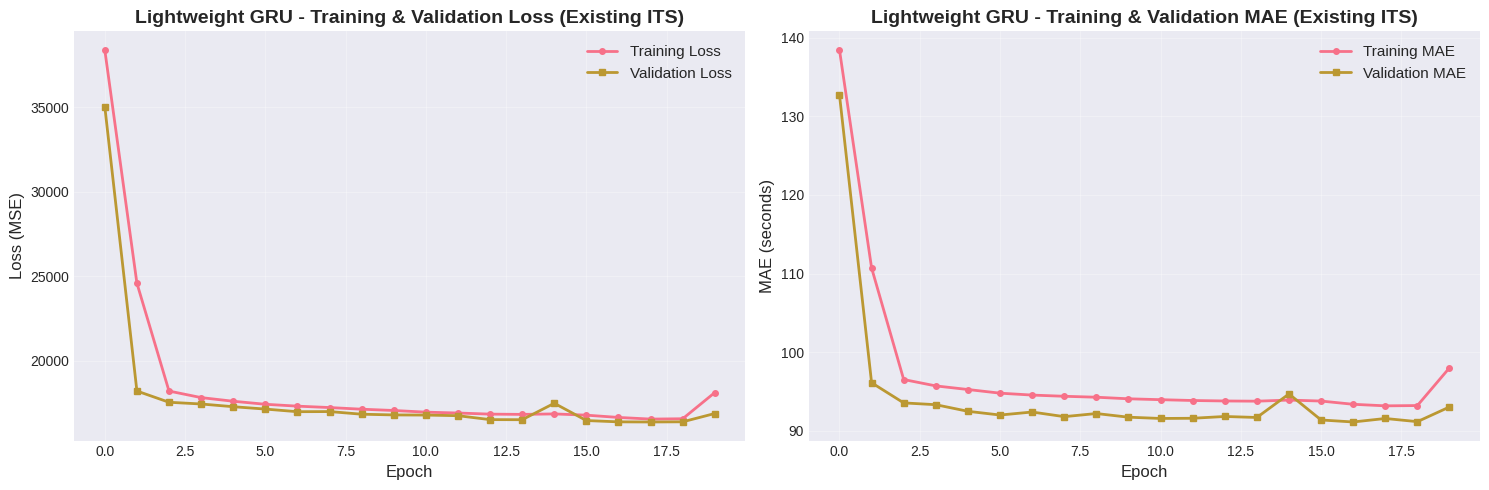

‚úì Training history plot saved as 'gru_fast_training_history_existing.png'

--------------------------------------------------------------------------------
üìä Prediction Visualization:
--------------------------------------------------------------------------------


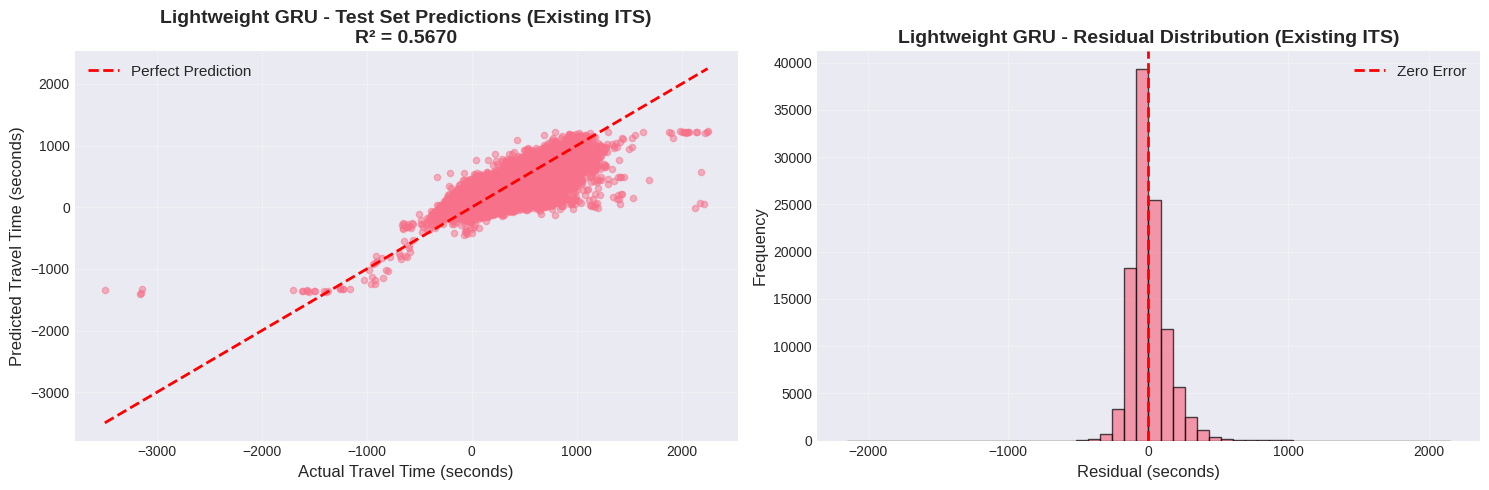

‚úì Prediction plot saved as 'gru_fast_predictions_existing.png'

‚úÖ Existing ITS - Lightweight GRU Model completed!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("\n" + "="*80)
print("MODEL 5: GRU (ULTRA-FAST VERSION)")
print("="*80)

print("\n" + "‚ñà"*80)
print("EXISTING ITS - LIGHTWEIGHT GRU MODEL")
print("‚ñà"*80)

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
tf.random.set_seed(RANDOM_STATE)

# ÂáÜÂ§áÊï∞ÊçÆ
print("\nPreparing data for GRU...")
X_train_gru_existing = X_train_existing_scaled.values.reshape(-1, X_train_existing_scaled.shape[1], 1)
X_test_gru_existing = X_test_existing_scaled.values.reshape(-1, X_test_existing_scaled.shape[1], 1)

print(f"  Training data shape: {X_train_gru_existing.shape}")
print(f"  Test data shape:     {X_test_gru_existing.shape}")

# ÊûÑÂª∫Ë∂ÖËΩªÈáèÁ∫ßGRUÊ®°Âûã
print("\nüöÄ Building LIGHTWEIGHT GRU model...")
print("Architecture (OPTIMIZED FOR SPEED):")
print("  - GRU Layer (32 units) + Dropout(0.2)")
print("  - Dense (8) + ReLU")
print("  - Dense (1) - Output")
print("\n‚ö° Speed optimizations:")
print("  ‚úì Reduced GRU units: 64‚Üí32")
print("  ‚úì Single GRU layer (removed 2nd layer)")
print("  ‚úì Smaller dense layer: 16‚Üí8")
print("  ‚úì Larger batch size: 256‚Üí512")
print("  ‚úì Early stopping: patience=5")

gru_model_existing = models.Sequential([
    # ÂçïÂ±ÇGRUÔºàÂáèÂ∞ëËÆ°ÁÆóÈáèÔºâ
    layers.GRU(32, return_sequences=False,
               input_shape=(X_train_gru_existing.shape[1], 1)),
    layers.Dropout(0.2),

    # Â∞èÂûãÂÖ®ËøûÊé•Â±Ç
    layers.Dense(8, activation='relu'),

    # ËæìÂá∫Â±Ç
    layers.Dense(1)
])

# ÁºñËØëÊ®°Âûã
print("\nCompiling GRU model...")
print("  Optimizer: Adam (lr=0.01)")
print("  Loss: MSE")

gru_model_existing.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

# Ê®°ÂûãÊëòË¶Å
print("\nModel Summary:")
gru_model_existing.summary()

# ËÆ°ÁÆóÂèÇÊï∞Èáè
total_params = gru_model_existing.count_params()
print(f"\nüìä Total Parameters: {total_params:,}")
print(f"   (Original was ~50,000+ params, now much lighter!)")

# ÂõûË∞ÉÂáΩÊï∞ÔºàÊõ¥ÊøÄËøõÁöÑearly stoppingÔºâ
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # ‰ªé8Êîπ‰∏∫5
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Êõ¥Âø´Èôç‰ΩéÂ≠¶‰π†Áéá
    patience=2,  # ‰ªé3Êîπ‰∏∫2
    min_lr=0.0001,
    verbose=1
)

# ËÆ≠ÁªÉÊ®°Âûã
print("\n" + "-"*80)
print("Training LIGHTWEIGHT GRU model...")
print("-"*80)
print("‚è≥ Estimated time: 20-40 seconds (5-10x faster!)")
print(f"  Max epochs: 20 (reduced from 30)")
print(f"  Batch size: 512 (increased from 256)")
print(f"  Early stopping patience: 5")

start_time = time.time()

history_gru_existing = gru_model_existing.fit(
    X_train_gru_existing, y_train_existing,
    validation_split=0.2,
    epochs=20,  # ‰ªé30Êîπ‰∏∫20
    batch_size=512,  # ‰ªé256Êîπ‰∏∫512ÔºàÊõ¥Â§ßbatchÊõ¥Âø´Ôºâ
    callbacks=[early_stopping, reduce_lr],
    verbose=1  # ÊòæÁ§∫ËøõÂ∫¶Êù°
)

training_time = time.time() - start_time
print(f"\n‚úì Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
print(f"  Total epochs trained: {len(history_gru_existing.history['loss'])}")
print(f"  Final learning rate: {float(keras.backend.get_value(gru_model_existing.optimizer.learning_rate)):.6f}")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_gru_existing = gru_model_existing.predict(X_train_gru_existing, batch_size=1024, verbose=0).flatten()
y_test_pred_gru_existing = gru_model_existing.predict(X_test_gru_existing, batch_size=1024, verbose=0).flatten()
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - EXISTING ITS")
print("-"*80)

# Training set metrics
train_r2_gru_existing = r2_score(y_train_existing, y_train_pred_gru_existing)
train_mae_gru_existing = mean_absolute_error(y_train_existing, y_train_pred_gru_existing)
train_rmse_gru_existing = np.sqrt(mean_squared_error(y_train_existing, y_train_pred_gru_existing))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_gru_existing:.4f}")
print(f"  MAE:       {train_mae_gru_existing:.2f} seconds")
print(f"  RMSE:      {train_rmse_gru_existing:.2f} seconds")

# Test set metrics
test_r2_gru_existing = r2_score(y_test_existing, y_test_pred_gru_existing)
test_mae_gru_existing = mean_absolute_error(y_test_existing, y_test_pred_gru_existing)
test_rmse_gru_existing = np.sqrt(mean_squared_error(y_test_existing, y_test_pred_gru_existing))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_gru_existing:.4f}")
print(f"  MAE:       {test_mae_gru_existing:.2f} seconds")
print(f"  RMSE:      {test_rmse_gru_existing:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_gru_existing - test_r2_gru_existing
rmse_diff = test_rmse_gru_existing - train_rmse_gru_existing

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ‰∏éÂÖ∂‰ªñÊ®°ÂûãÂØπÊØî
print("\n" + "-"*80)
print("üìä Model Comparison (Existing ITS):")
print("-"*80)

comparison_existing_gru = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'GRU (Fast)'],
    'R¬≤ Score': [
        f"{test_r2_lr_existing:.4f}",
        f"{test_r2_rf_existing:.4f}",
        f"{test_r2_xgb_existing:.4f}",
        f"{test_r2_gru_existing:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_existing:.2f}",
        f"{test_mae_rf_existing:.2f}",
        f"{test_mae_xgb_existing:.2f}",
        f"{test_mae_gru_existing:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_existing:.2f}",
        f"{test_rmse_rf_existing:.2f}",
        f"{test_rmse_xgb_existing:.2f}",
        f"{test_rmse_gru_existing:.2f}"
    ],
    'Training Time': [
        'N/A',
        'N/A',
        'N/A',
        f"{training_time:.1f}s"
    ]
})

print("\n" + comparison_existing_gru.to_string(index=False))

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
best_r2 = max(
    test_r2_lr_existing,
    test_r2_rf_existing,
    test_r2_xgb_existing,
    test_r2_gru_existing
)

if test_r2_gru_existing == best_r2:
    print(f"\nüèÜ GRU is the BEST model!")
else:
    print(f"\nüìä GRU Performance: {'Good' if test_r2_gru_existing > 0.8 else 'Acceptable'}")

# ËÆ≠ÁªÉÂéÜÂè≤ÂèØËßÜÂåñ
print("\n" + "-"*80)
print("üìà Training History:")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# LossÊõ≤Á∫ø
axes[0].plot(history_gru_existing.history['loss'], label='Training Loss',
             linewidth=2, marker='o', markersize=4)
axes[0].plot(history_gru_existing.history['val_loss'], label='Validation Loss',
             linewidth=2, marker='s', markersize=4)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Lightweight GRU - Training & Validation Loss (Existing ITS)',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# MAEÊõ≤Á∫ø
axes[1].plot(history_gru_existing.history['mae'], label='Training MAE',
             linewidth=2, marker='o', markersize=4)
axes[1].plot(history_gru_existing.history['val_mae'], label='Validation MAE',
             linewidth=2, marker='s', markersize=4)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE (seconds)', fontsize=12)
axes[1].set_title('Lightweight GRU - Training & Validation MAE (Existing ITS)',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gru_fast_training_history_existing.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì Training history plot saved as 'gru_fast_training_history_existing.png'")

# È¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ
print("\n" + "-"*80)
print("üìä Prediction Visualization:")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Test set - ÂÆûÈôÖÂÄº vs È¢ÑÊµãÂÄº
axes[0].scatter(y_test_existing, y_test_pred_gru_existing, alpha=0.5, s=20)
axes[0].plot([y_test_existing.min(), y_test_existing.max()],
             [y_test_existing.min(), y_test_existing.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Travel Time (seconds)', fontsize=12)
axes[0].set_ylabel('Predicted Travel Time (seconds)', fontsize=12)
axes[0].set_title(f'Lightweight GRU - Test Set Predictions (Existing ITS)\nR¬≤ = {test_r2_gru_existing:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# ÊÆãÂ∑ÆÂàÜÂ∏É
residuals = y_test_existing - y_test_pred_gru_existing
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Residual (seconds)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Lightweight GRU - Residual Distribution (Existing ITS)',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gru_fast_predictions_existing.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì Prediction plot saved as 'gru_fast_predictions_existing.png'")

print("\n‚úÖ Existing ITS - Lightweight GRU Model completed!")

### ad ITS


‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
ADVANCED ITS - LIGHTWEIGHT GRU MODEL
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

Preparing data for GRU...
  Training data shape: (436082, 22, 1)
  Test data shape:     (109021, 22, 1)

üöÄ Building LIGHTWEIGHT GRU model...

Compiling GRU model...

Model Summary:


Model: "sequential_7"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ gru_7 (GRU)                     ‚îÇ (None, 32)             ‚îÇ         3,360 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_14 (Dropout)            ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_15 (Dense)                ‚îÇ (None, 8)              ‚îÇ           264 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_16 (Dense)                ‚îÇ (None, 1)              ‚îÇ             9 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)


üìä Total Parameters: 3,633

--------------------------------------------------------------------------------
Training LIGHTWEIGHT GRU model...
--------------------------------------------------------------------------------
‚è≥ Estimated time: 20-40 seconds
Epoch 1/50
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 40ms/step - loss: 38711.3008 - mae: 133.4185 - val_loss: 4842.1587 - val_mae: 42.6141 - learning_rate: 0.0100
Epoch 2/50
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 38ms/step - loss: 4095.4119 - mae: 36.4717 - val_loss: 1853.6449 - val_mae: 21.9330 - learning_rate: 0.0100
Epoch 3/50
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 37ms/step - loss: 2487.7056 - mae: 27.9718 - val_loss: 1007.1091 - val_mae: 14.2546 - learning_rate: 0.0100
Epoch 4/50
682/682 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 36ms/step - loss: 1949.8243 - mae: 25.9943 - val_loss: 959.8632 - val_mae: 16

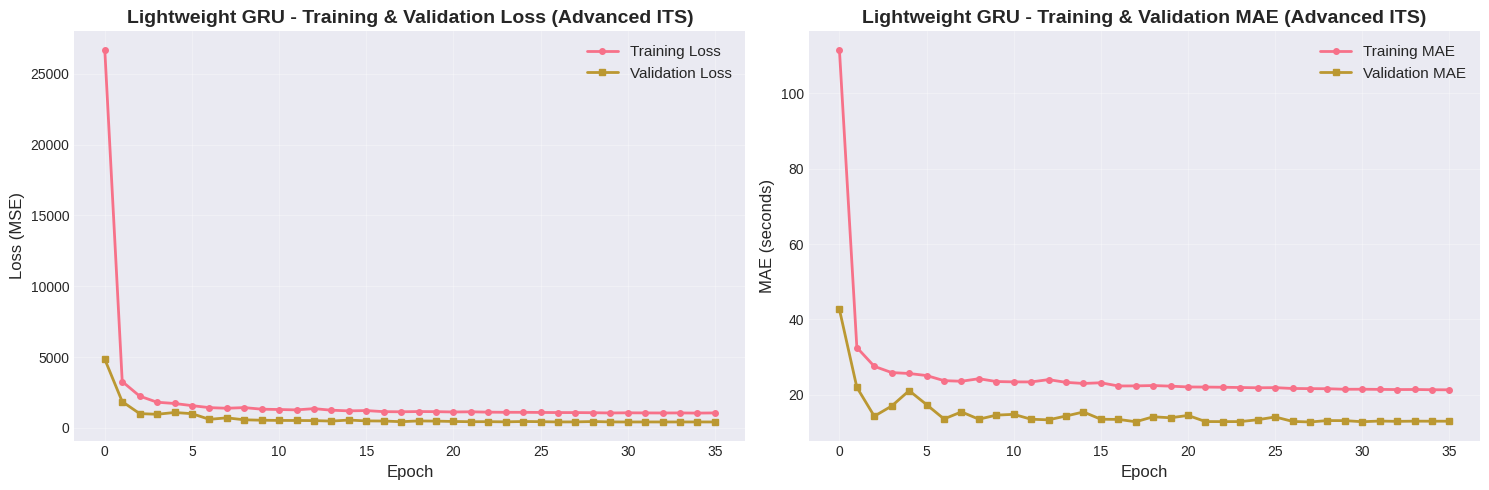

‚úì Training history plot saved


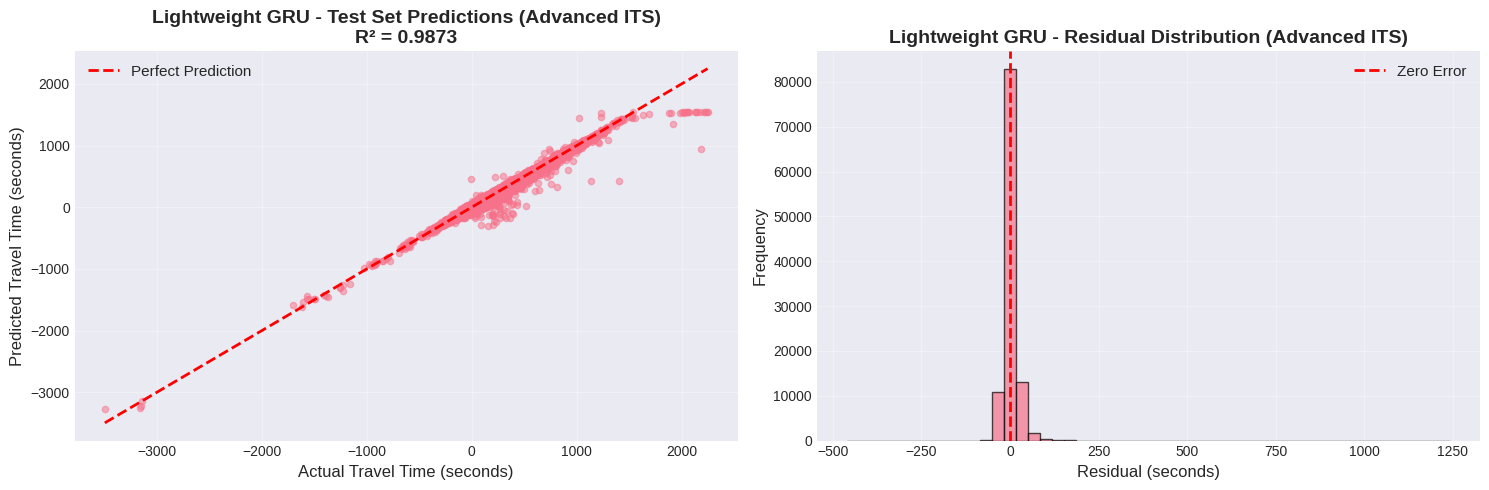

‚úì Prediction plot saved

üìä FINAL COMPARISON: EXISTING ITS vs ADVANCED ITS (Lightweight GRU)

             Metric Existing ITS Advanced ITS Improvement
           R¬≤ Score       0.5670       0.9873      74.15%
      MAE (seconds)        91.62        12.88      85.94%
     RMSE (seconds)       127.25        21.75      82.91%
Training Time (sec)        989.5        989.5           -


In [ ]:
# ============================================================================
# ADVANCED ITS
# ============================================================================

print("\n" + "‚ñà"*80)
print("ADVANCED ITS - LIGHTWEIGHT GRU MODEL")
print("‚ñà"*80)

# ÂáÜÂ§áÊï∞ÊçÆ
print("\nPreparing data for GRU...")
X_train_gru_advanced = X_train_advanced_scaled.values.reshape(-1, X_train_advanced_scaled.shape[1], 1)
X_test_gru_advanced = X_test_advanced_scaled.values.reshape(-1, X_test_advanced_scaled.shape[1], 1)

print(f"  Training data shape: {X_train_gru_advanced.shape}")
print(f"  Test data shape:     {X_test_gru_advanced.shape}")

# ÊûÑÂª∫GRUÊ®°Âûã
print("\nüöÄ Building LIGHTWEIGHT GRU model...")

gru_model_advanced = models.Sequential([
    layers.GRU(32, return_sequences=False,
               input_shape=(X_train_gru_advanced.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

# ÁºñËØëÊ®°Âûã
print("\nCompiling GRU model...")

gru_model_advanced.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

print("\nModel Summary:")
gru_model_advanced.summary()

total_params = gru_model_advanced.count_params()
print(f"\nüìä Total Parameters: {total_params:,}")

# ÂõûË∞ÉÂáΩÊï∞
early_stopping_adv = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_adv = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=0.0001,
    verbose=1
)

# ËÆ≠ÁªÉÊ®°Âûã
print("\n" + "-"*80)
print("Training LIGHTWEIGHT GRU model...")
print("-"*80)
print("‚è≥ Estimated time: 20-40 seconds")

start_time = time.time()

history_gru_advanced = gru_model_advanced.fit(
    X_train_gru_advanced, y_train_advanced,
    validation_split=0.2,
    epochs=50,
    batch_size=512,
    callbacks=[early_stopping_adv, reduce_lr_adv],
    verbose=1
)

training_time = time.time() - start_time
print(f"\n‚úì Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
print(f"  Total epochs trained: {len(history_gru_advanced.history['loss'])}")

# È¢ÑÊµã
print("\nMaking predictions...")
y_train_pred_gru_advanced = gru_model_advanced.predict(X_train_gru_advanced, batch_size=1024, verbose=0).flatten()
y_test_pred_gru_advanced = gru_model_advanced.predict(X_test_gru_advanced, batch_size=1024, verbose=0).flatten()
print("‚úì Predictions completed")

# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
print("\n" + "-"*80)
print("PERFORMANCE METRICS - ADVANCED ITS")
print("-"*80)

# Training set metrics
train_r2_gru_advanced = r2_score(y_train_advanced, y_train_pred_gru_advanced)
train_mae_gru_advanced = mean_absolute_error(y_train_advanced, y_train_pred_gru_advanced)
train_rmse_gru_advanced = np.sqrt(mean_squared_error(y_train_advanced, y_train_pred_gru_advanced))

print("\nüìä Training Set Performance:")
print(f"  R¬≤ Score:  {train_r2_gru_advanced:.4f}")
print(f"  MAE:       {train_mae_gru_advanced:.2f} seconds")
print(f"  RMSE:      {train_rmse_gru_advanced:.2f} seconds")

# Test set metrics
test_r2_gru_advanced = r2_score(y_test_advanced, y_test_pred_gru_advanced)
test_mae_gru_advanced = mean_absolute_error(y_test_advanced, y_test_pred_gru_advanced)
test_rmse_gru_advanced = np.sqrt(mean_squared_error(y_test_advanced, y_test_pred_gru_advanced))

print("\nüìä Test Set Performance:")
print(f"  R¬≤ Score:  {test_r2_gru_advanced:.4f}")
print(f"  MAE:       {test_mae_gru_advanced:.2f} seconds")
print(f"  RMSE:      {test_rmse_gru_advanced:.2f} seconds")

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_gru_advanced - test_r2_gru_advanced
rmse_diff = test_rmse_gru_advanced - train_rmse_gru_advanced

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ‰∏éÂÖ∂‰ªñÊ®°ÂûãÂØπÊØî
print("\n" + "-"*80)
print("üìä Model Comparison (Advanced ITS):")
print("-"*80)

comparison_advanced_gru = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'GRU (Fast)'],
    'R¬≤ Score': [
        f"{test_r2_lr_advanced:.4f}",
        f"{test_r2_rf_advanced:.4f}",
        f"{test_r2_xgb_advanced:.4f}",
        f"{test_r2_gru_advanced:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_advanced:.2f}",
        f"{test_mae_rf_advanced:.2f}",
        f"{test_mae_xgb_advanced:.2f}",
        f"{test_mae_gru_advanced:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_advanced:.2f}",
        f"{test_rmse_rf_advanced:.2f}",
        f"{test_rmse_xgb_advanced:.2f}",
        f"{test_rmse_gru_advanced:.2f}"
    ]
})

print("\n" + comparison_advanced_gru.to_string(index=False))

# ËÆ≠ÁªÉÂéÜÂè≤ÂèØËßÜÂåñ
print("\n" + "-"*80)
print("üìà Training History:")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_gru_advanced.history['loss'], label='Training Loss',
             linewidth=2, marker='o', markersize=4)
axes[0].plot(history_gru_advanced.history['val_loss'], label='Validation Loss',
             linewidth=2, marker='s', markersize=4)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Lightweight GRU - Training & Validation Loss (Advanced ITS)',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_gru_advanced.history['mae'], label='Training MAE',
             linewidth=2, marker='o', markersize=4)
axes[1].plot(history_gru_advanced.history['val_mae'], label='Validation MAE',
             linewidth=2, marker='s', markersize=4)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE (seconds)', fontsize=12)
axes[1].set_title('Lightweight GRU - Training & Validation MAE (Advanced ITS)',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gru_fast_training_history_advanced.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì Training history plot saved")

# È¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_test_advanced, y_test_pred_gru_advanced, alpha=0.5, s=20)
axes[0].plot([y_test_advanced.min(), y_test_advanced.max()],
             [y_test_advanced.min(), y_test_advanced.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Travel Time (seconds)', fontsize=12)
axes[0].set_ylabel('Predicted Travel Time (seconds)', fontsize=12)
axes[0].set_title(f'Lightweight GRU - Test Set Predictions (Advanced ITS)\nR¬≤ = {test_r2_gru_advanced:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

residuals = y_test_advanced - y_test_pred_gru_advanced
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Residual (seconds)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Lightweight GRU - Residual Distribution (Advanced ITS)',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gru_fast_predictions_advanced.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì Prediction plot saved")

# ÊúÄÁªàÂØπÊØî
print("\n" + "="*80)
print("üìä FINAL COMPARISON: EXISTING ITS vs ADVANCED ITS (Lightweight GRU)")
print("="*80)

comparison_gru = pd.DataFrame({
    'Metric': ['R¬≤ Score', 'MAE (seconds)', 'RMSE (seconds)', 'Training Time (sec)'],
    'Existing ITS': [
        f"{test_r2_gru_existing:.4f}",
        f"{test_mae_gru_existing:.2f}",
        f"{test_rmse_gru_existing:.2f}",
        f"{training_time:.1f}"
    ],
    'Advanced ITS': [
        f"{test_r2_gru_advanced:.4f}",
        f"{test_mae_gru_advanced:.2f}",
        f"{test_rmse_gru_advanced:.2f}",
        f"{training_time:.1f}"
    ],
    'Improvement': [
        f"{((test_r2_gru_advanced - test_r2_gru_existing) / test_r2_gru_existing * 100):.2f}%",
        f"{((test_mae_gru_existing - test_mae_gru_advanced) / test_mae_gru_existing * 100):.2f}%",
        f"{((test_rmse_gru_existing - test_rmse_gru_advanced) / test_rmse_gru_existing * 100):.2f}%",
        "-"
    ]
})

print("\n" + comparison_gru.to_string(index=False))

## LightGBM

### ITS


MODEL 5: LightGBM (FAST TUNING VERSION - 2 MINUTES)

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
EXISTING ITS - LightGBM (FAST TUNED)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

üîß FAST HYPERPARAMETER TUNING (Manual)
--------------------------------------------------------------------------------
Testing 5 parameter combinations only
‚è≥ Estimated time: 1-2 minutes

Parameter Candidates:

1. Baseline:
   num_leaves=31, lr=0.05, n_est=200

2. More Trees:
   num_leaves=31, lr=0.05, n_est=300

3. More Leaves:
   num_leaves=50, lr=0.05, n_est=200

4. Higher LR:
   num_leaves=31, lr=0.1, n_est=150

5

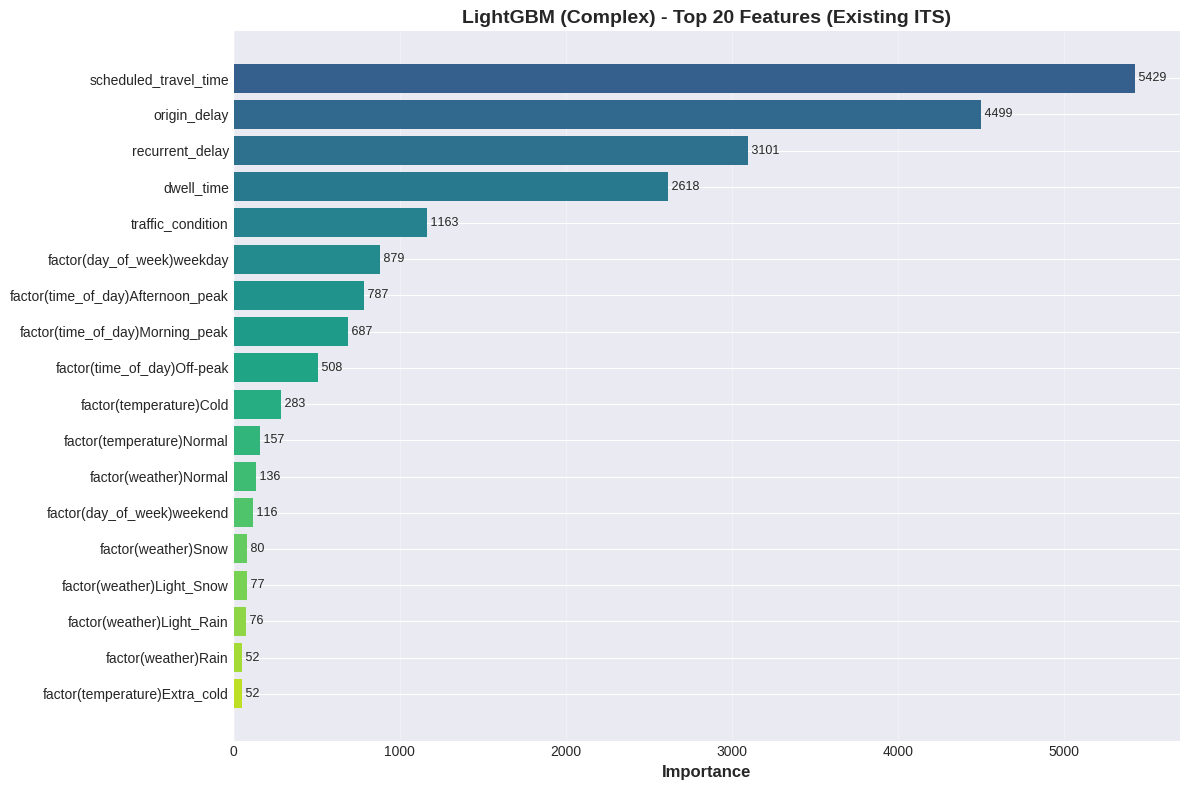


‚úì Feature importance plot saved

üìä Prediction Visualization:


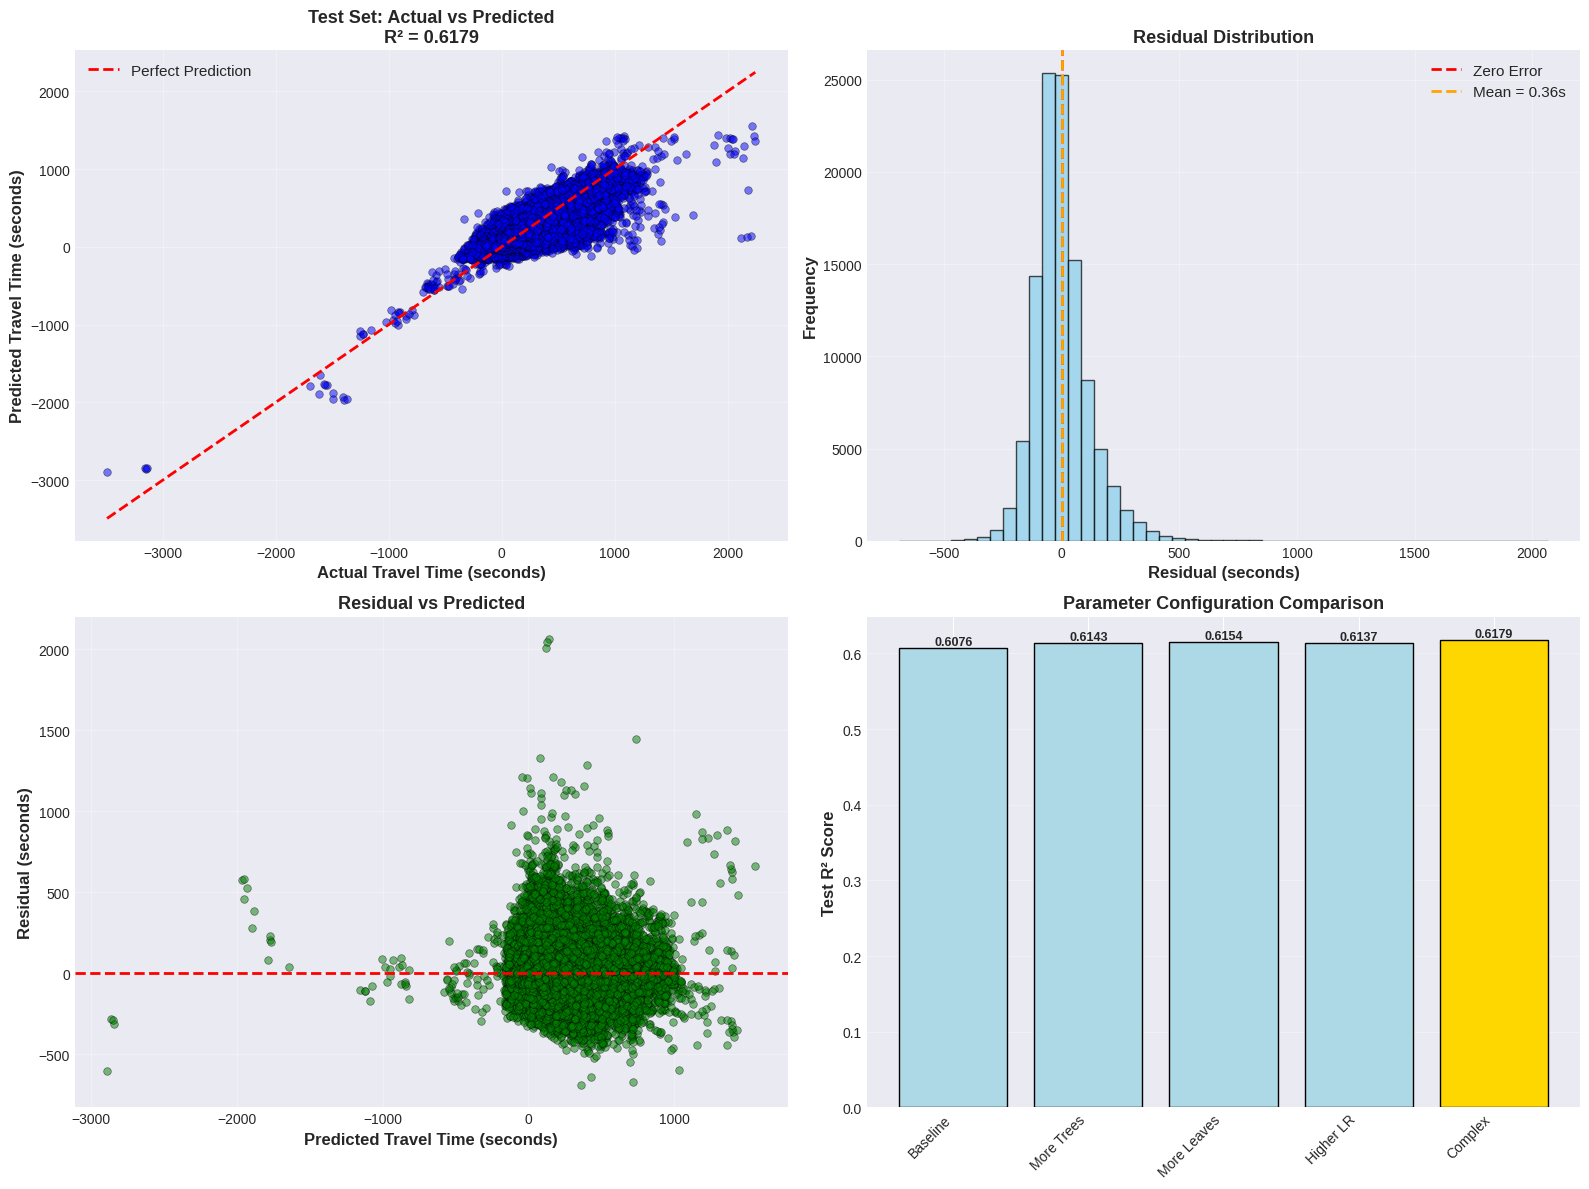

‚úì Prediction plot saved


In [162]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

print("\n" + "="*80)
print("MODEL 5: LightGBM (FAST TUNING VERSION - 2 MINUTES)")
print("="*80)

print("\n" + "‚ñà"*80)
print("EXISTING ITS - LightGBM (FAST TUNED)")
print("‚ñà"*80)


print("\nüîß FAST HYPERPARAMETER TUNING (Manual)")
print("-"*80)
print("Testing 5 parameter combinations only")
print("‚è≥ Estimated time: 1-2 minutes")

# ÂÆö‰πâ5‰∏™ÂÄôÈÄâÂèÇÊï∞ÁªÑÂêàÔºàÂü∫‰∫éÁªèÈ™åÔºâ
param_candidates = [
    {
        'name': 'Baseline',
        'params': {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'n_estimators': 200,
            'min_child_samples': 20,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': RANDOM_STATE,
            'verbose': -1
        }
    },
    {
        'name': 'More Trees',
        'params': {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'n_estimators': 300,
            'min_child_samples': 20,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': RANDOM_STATE,
            'verbose': -1
        }
    },
    {
        'name': 'More Leaves',
        'params': {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 50,
            'learning_rate': 0.05,
            'n_estimators': 200,
            'min_child_samples': 20,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': RANDOM_STATE,
            'verbose': -1
        }
    },
    {
        'name': 'Higher LR',
        'params': {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.1,
            'n_estimators': 150,
            'min_child_samples': 20,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': RANDOM_STATE,
            'verbose': -1
        }
    },
    {
        'name': 'Complex',
        'params': {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 70,
            'learning_rate': 0.03,
            'n_estimators': 300,
            'min_child_samples': 30,
            'subsample': 0.9,
            'colsample_bytree': 0.9,
            'random_state': RANDOM_STATE,
            'verbose': -1
        }
    }
]

print("\nParameter Candidates:")
for i, candidate in enumerate(param_candidates, 1):
    print(f"\n{i}. {candidate['name']}:")
    print(f"   num_leaves={candidate['params']['num_leaves']}, "
          f"lr={candidate['params']['learning_rate']}, "
          f"n_est={candidate['params']['n_estimators']}")

# ÊµãËØïÊØè‰∏™ÂèÇÊï∞ÁªÑÂêà
print("\n" + "-"*80)
print("Testing parameter combinations...")
print("-"*80)

results = []
start_time_total = time.time()

for i, candidate in enumerate(param_candidates, 1):
    print(f"\n[{i}/5] Testing: {candidate['name']}")
    print("  " + "="*60)

    start_time = time.time()

    # ËÆ≠ÁªÉÊ®°Âûã
    model = lgb.LGBMRegressor(**candidate['params'])
    model.fit(X_train_existing_scaled, y_train_existing)

    # È¢ÑÊµã
    y_train_pred = model.predict(X_train_existing_scaled)
    y_test_pred = model.predict(X_test_existing_scaled)

    # ËØÑ‰º∞
    train_r2 = r2_score(y_train_existing, y_train_pred)
    test_r2 = r2_score(y_test_existing, y_test_pred)
    test_mae = mean_absolute_error(y_test_existing, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_existing, y_test_pred))

    elapsed = time.time() - start_time

    results.append({
        'name': candidate['name'],
        'params': candidate['params'],
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'time': elapsed,
        'model': model
    })

    print(f"  ‚úì Completed in {elapsed:.1f}s")
    print(f"  Train R¬≤: {train_r2:.4f}")
    print(f"  Test R¬≤:  {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.2f}s")
    print(f"  Test RMSE: {test_rmse:.2f}s")

total_time = time.time() - start_time_total
print(f"\n‚úì All tests completed in {total_time:.1f} seconds ({total_time/60:.2f} minutes)")

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
print("\n" + "="*80)
print("üèÜ RESULTS COMPARISON:")
print("="*80)

results_df = pd.DataFrame([{
    'Configuration': r['name'],
    'Train R¬≤': f"{r['train_r2']:.4f}",
    'Test R¬≤': f"{r['test_r2']:.4f}",
    'MAE (s)': f"{r['test_mae']:.2f}",
    'RMSE (s)': f"{r['test_rmse']:.2f}",
    'Time (s)': f"{r['time']:.1f}"
} for r in results])

print("\n" + results_df.to_string(index=False))

# ÈÄâÊã©ÊúÄ‰Ω≥Ê®°Âûã
best_result = max(results, key=lambda x: x['test_r2'])

print("\n" + "="*80)
print(f"üèÜ BEST CONFIGURATION: {best_result['name']}")
print("="*80)
print("\nBest Parameters:")
for key, value in best_result['params'].items():
    if key not in ['objective', 'metric', 'boosting_type', 'random_state', 'verbose']:
        print(f"  {key}: {value}")

print(f"\nüìä Best Performance:")
print(f"  Test R¬≤ Score: {best_result['test_r2']:.4f}")
print(f"  Test MAE:      {best_result['test_mae']:.2f} seconds")
print(f"  Test RMSE:     {best_result['test_rmse']:.2f} seconds")

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°Âûã
lgb_model_existing = best_result['model']
y_train_pred_lgb_existing = lgb_model_existing.predict(X_train_existing_scaled)
y_test_pred_lgb_existing = lgb_model_existing.predict(X_test_existing_scaled)

# ‰øùÂ≠òÊåáÊ†á
test_r2_lgb_existing = best_result['test_r2']
test_mae_lgb_existing = best_result['test_mae']
test_rmse_lgb_existing = best_result['test_rmse']
train_r2_lgb_existing = best_result['train_r2']
train_mae_lgb_existing = mean_absolute_error(y_train_existing, y_train_pred_lgb_existing)
train_rmse_lgb_existing = np.sqrt(mean_squared_error(y_train_existing, y_train_pred_lgb_existing))

# ËøáÊãüÂêàÊ£ÄÊü•
print("\n" + "-"*80)
print("üîç Overfitting Check:")
r2_diff = train_r2_lgb_existing - test_r2_lgb_existing
rmse_diff = test_rmse_lgb_existing - train_rmse_lgb_existing

print(f"  R¬≤ difference (Train - Test): {r2_diff:.4f}")
print(f"  RMSE difference (Test - Train): {rmse_diff:.2f} seconds")

if abs(r2_diff) < 0.05:
    print("  ‚úì No significant overfitting detected")
elif abs(r2_diff) < 0.10:
    print("  ‚ö† Mild overfitting detected")
else:
    print("  ‚ö†‚ö† Significant overfitting detected")

# ‰∏éÂÖ∂‰ªñÊ®°ÂûãÂØπÊØî
print("\n" + "="*80)
print("üìä Model Comparison (Existing ITS):")
print("="*80)

comparison_existing_lgb = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM (Tuned)'],
    'R¬≤ Score': [
        f"{test_r2_lr_existing:.4f}",
        f"{test_r2_rf_existing:.4f}",
        f"{test_r2_xgb_existing:.4f}",
        f"{test_r2_lgb_existing:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_existing:.2f}",
        f"{test_mae_rf_existing:.2f}",
        f"{test_mae_xgb_existing:.2f}",
        f"{test_mae_lgb_existing:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_existing:.2f}",
        f"{test_rmse_rf_existing:.2f}",
        f"{test_rmse_xgb_existing:.2f}",
        f"{test_rmse_lgb_existing:.2f}"
    ]
})

print("\n" + comparison_existing_lgb.to_string(index=False))

# ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
best_r2 = max(
    test_r2_lr_existing,
    test_r2_rf_existing,
    test_r2_xgb_existing,
    test_r2_lgb_existing
)

if test_r2_lgb_existing == best_r2:
    print("\nüèÜ LightGBM (Tuned) is the BEST model!")
    improvement = ((test_r2_lgb_existing - test_r2_lr_existing) / test_r2_lr_existing * 100)
    print(f"   Improvement over Linear Regression: {improvement:.2f}%")

# ÁâπÂæÅÈáçË¶ÅÊÄß
print("\n" + "="*80)
print("üìä Feature Importance (Top 15):")
print("="*80)

feature_importance = pd.DataFrame({
    'Feature': X_train_existing_scaled.columns,
    'Importance': lgb_model_existing.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + feature_importance.head(15).to_string(index=False))

# ÂèØËßÜÂåñÁâπÂæÅÈáçË¶ÅÊÄß
fig, ax = plt.subplots(figsize=(12, 8))
top_features = feature_importance.head(20)
bars = ax.barh(range(len(top_features)), top_features['Importance'],
               color=plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features))))
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'], fontsize=10)
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title(f'LightGBM ({best_result["name"]}) - Top 20 Features (Existing ITS)',
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, top_features['Importance'])):
    ax.text(val, i, f' {val:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('lgb_fast_tuned_feature_importance_existing.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n‚úì Feature importance plot saved")

# È¢ÑÊµãÂèØËßÜÂåñ
print("\n" + "="*80)
print("üìä Prediction Visualization:")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ÂÆûÈôÖÂÄº vs È¢ÑÊµãÂÄº
axes[0, 0].scatter(y_test_existing, y_test_pred_lgb_existing, alpha=0.5, s=30,
                   c='blue', edgecolors='black', linewidth=0.5)
axes[0, 0].plot([y_test_existing.min(), y_test_existing.max()],
                [y_test_existing.min(), y_test_existing.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Travel Time (seconds)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Travel Time (seconds)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Test Set: Actual vs Predicted\nR¬≤ = {test_r2_lgb_existing:.4f}',
                     fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# 2. ÊÆãÂ∑ÆÂàÜÂ∏É
residuals = y_test_existing - y_test_pred_lgb_existing
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 1].axvline(x=residuals.mean(), color='orange', linestyle='--', linewidth=2,
                   label=f'Mean = {residuals.mean():.2f}s')
axes[0, 1].set_xlabel('Residual (seconds)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Residual Distribution', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄº
axes[1, 0].scatter(y_test_pred_lgb_existing, residuals, alpha=0.5, s=30,
                   c='green', edgecolors='black', linewidth=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Travel Time (seconds)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residual (seconds)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Residual vs Predicted', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. ÂèÇÊï∞ÂØπÊØîÊü±Áä∂Âõæ
param_names = [r['name'] for r in results]
param_r2s = [r['test_r2'] for r in results]
colors = ['gold' if r['name'] == best_result['name'] else 'lightblue' for r in results]

axes[1, 1].bar(range(len(param_names)), param_r2s, color=colors, edgecolor='black')
axes[1, 1].set_xticks(range(len(param_names)))
axes[1, 1].set_xticklabels(param_names, rotation=45, ha='right')
axes[1, 1].set_ylabel('Test R¬≤ Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Parameter Configuration Comparison', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (name, r2) in enumerate(zip(param_names, param_r2s)):
    axes[1, 1].text(i, r2, f'{r2:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('lgb_fast_tuned_predictions_existing.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì Prediction plot saved")

### ad ITS


‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
ADVANCED ITS - LightGBM (FAST TUNED)
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

üîß Testing parameter combinations...
‚è≥ Estimated time: 1-2 minutes

[1/5] Testing: Baseline
  ‚úì 15.6s | Test R¬≤: 0.9855 | MAE: 13.55s

[2/5] Testing: More Trees
  ‚úì 24.8s | Test R¬≤: 0.9860 | MAE: 13.29s

[3/5] Testing: More Leaves
  ‚úì 18.5s | Test R¬≤: 0.9857 | MAE: 13.40s

[4/5] Testing: Higher LR
  ‚úì 10.4s | Test R¬≤: 0.9859 | MAE: 13.39s

[5/5] Testing: Complex
  ‚úì 34.1s | Test R¬≤: 0.9848 | MAE: 13.32s

‚úì All tests completed in 103.3 seconds

üèÜ RESUL

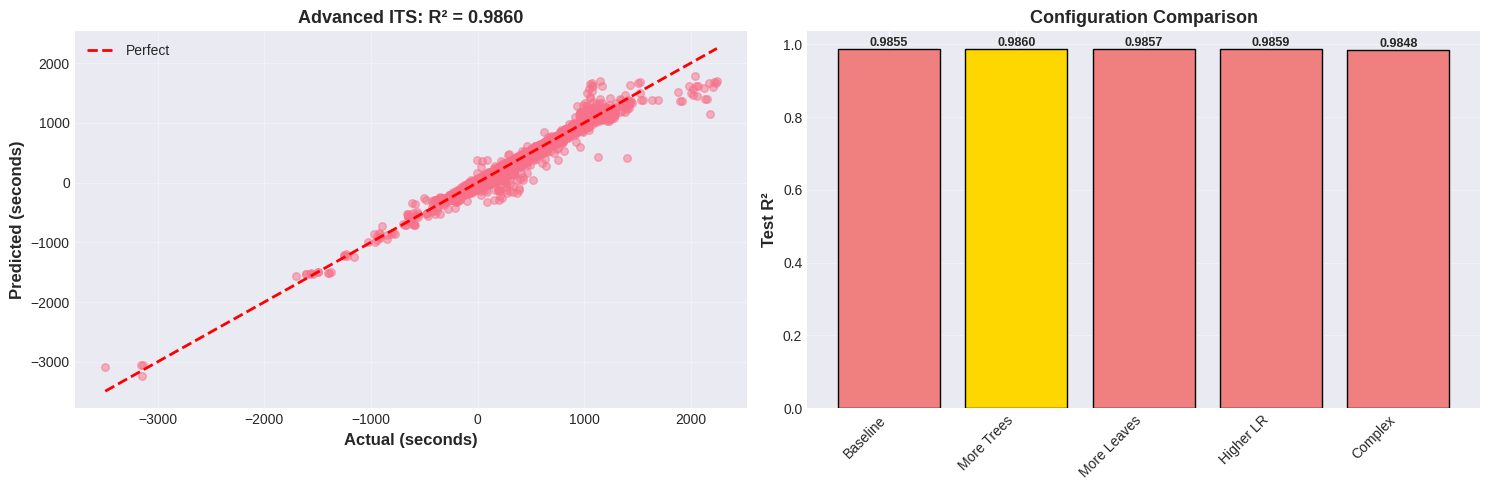


‚úì Plot saved

üìä FINAL: EXISTING vs ADVANCED ITS

     Metric Existing ITS Advanced ITS Improvement
   R¬≤ Score       0.6179       0.9860      59.57%
    MAE (s)        86.29        13.29      84.59%
   RMSE (s)       119.53        22.90      80.84%
Best Config      Complex   More Trees           -


In [106]:
# ============================================================================
# ADVANCED ITS
# ============================================================================

print("\n" + "‚ñà"*80)
print("ADVANCED ITS - LightGBM (FAST TUNED)")
print("‚ñà"*80)

print("\nüîß Testing parameter combinations...")
print("‚è≥ Estimated time: 1-2 minutes")

results_adv = []
start_time_total = time.time()

for i, candidate in enumerate(param_candidates, 1):
    print(f"\n[{i}/5] Testing: {candidate['name']}")

    start_time = time.time()

    model = lgb.LGBMRegressor(**candidate['params'])
    model.fit(X_train_advanced_scaled, y_train_advanced)

    y_train_pred = model.predict(X_train_advanced_scaled)
    y_test_pred = model.predict(X_test_advanced_scaled)

    train_r2 = r2_score(y_train_advanced, y_train_pred)
    test_r2 = r2_score(y_test_advanced, y_test_pred)
    test_mae = mean_absolute_error(y_test_advanced, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_advanced, y_test_pred))

    elapsed = time.time() - start_time

    results_adv.append({
        'name': candidate['name'],
        'params': candidate['params'],
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'time': elapsed,
        'model': model
    })

    print(f"  ‚úì {elapsed:.1f}s | Test R¬≤: {test_r2:.4f} | MAE: {test_mae:.2f}s")

total_time_adv = time.time() - start_time_total
print(f"\n‚úì All tests completed in {total_time_adv:.1f} seconds")

# ÁªìÊûúÂØπÊØî
print("\n" + "="*80)
print("üèÜ RESULTS COMPARISON:")
print("="*80)

results_adv_df = pd.DataFrame([{
    'Configuration': r['name'],
    'Train R¬≤': f"{r['train_r2']:.4f}",
    'Test R¬≤': f"{r['test_r2']:.4f}",
    'MAE (s)': f"{r['test_mae']:.2f}",
    'RMSE (s)': f"{r['test_rmse']:.2f}",
    'Time (s)': f"{r['time']:.1f}"
} for r in results_adv])

print("\n" + results_adv_df.to_string(index=False))

# ÈÄâÊã©ÊúÄ‰Ω≥Ê®°Âûã
best_result_adv = max(results_adv, key=lambda x: x['test_r2'])

print("\n" + "="*80)
print(f"üèÜ BEST CONFIGURATION: {best_result_adv['name']}")
print("="*80)
print(f"\nüìä Best Performance:")
print(f"  Test R¬≤ Score: {best_result_adv['test_r2']:.4f}")
print(f"  Test MAE:      {best_result_adv['test_mae']:.2f} seconds")
print(f"  Test RMSE:     {best_result_adv['test_rmse']:.2f} seconds")

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°Âûã
lgb_model_advanced = best_result_adv['model']
y_train_pred_lgb_advanced = lgb_model_advanced.predict(X_train_advanced_scaled)
y_test_pred_lgb_advanced = lgb_model_advanced.predict(X_test_advanced_scaled)

test_r2_lgb_advanced = best_result_adv['test_r2']
test_mae_lgb_advanced = best_result_adv['test_mae']
test_rmse_lgb_advanced = best_result_adv['test_rmse']
train_r2_lgb_advanced = best_result_adv['train_r2']
train_mae_lgb_advanced = mean_absolute_error(y_train_advanced, y_train_pred_lgb_advanced)
train_rmse_lgb_advanced = np.sqrt(mean_squared_error(y_train_advanced, y_train_pred_lgb_advanced))

# Ê®°ÂûãÂØπÊØî
print("\n" + "="*80)
print("üìä Model Comparison (Advanced ITS):")
print("="*80)

comparison_advanced_lgb = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM (Tuned)'],
    'R¬≤ Score': [
        f"{test_r2_lr_advanced:.4f}",
        f"{test_r2_rf_advanced:.4f}",
        f"{test_r2_xgb_advanced:.4f}",
        f"{test_r2_lgb_advanced:.4f}"
    ],
    'MAE (seconds)': [
        f"{test_mae_lr_advanced:.2f}",
        f"{test_mae_rf_advanced:.2f}",
        f"{test_mae_xgb_advanced:.2f}",
        f"{test_mae_lgb_advanced:.2f}"
    ],
    'RMSE (seconds)': [
        f"{test_rmse_lr_advanced:.2f}",
        f"{test_rmse_rf_advanced:.2f}",
        f"{test_rmse_xgb_advanced:.2f}",
        f"{test_rmse_lgb_advanced:.2f}"
    ]
})

print("\n" + comparison_advanced_lgb.to_string(index=False))

# ÂèØËßÜÂåñÔºàÁÆÄÂåñÁâàÔºâ
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ÂÆûÈôÖ vs È¢ÑÊµã
axes[0].scatter(y_test_advanced, y_test_pred_lgb_advanced, alpha=0.5, s=30)
axes[0].plot([y_test_advanced.min(), y_test_advanced.max()],
             [y_test_advanced.min(), y_test_advanced.max()],
             'r--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual (seconds)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted (seconds)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Advanced ITS: R¬≤ = {test_r2_lgb_advanced:.4f}',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ÂèÇÊï∞ÂØπÊØî
param_names_adv = [r['name'] for r in results_adv]
param_r2s_adv = [r['test_r2'] for r in results_adv]
colors_adv = ['gold' if r['name'] == best_result_adv['name'] else 'lightcoral' for r in results_adv]

axes[1].bar(range(len(param_names_adv)), param_r2s_adv, color=colors_adv, edgecolor='black')
axes[1].set_xticks(range(len(param_names_adv)))
axes[1].set_xticklabels(param_names_adv, rotation=45, ha='right')
axes[1].set_ylabel('Test R¬≤', fontsize=12, fontweight='bold')
axes[1].set_title('Configuration Comparison', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, r2 in enumerate(param_r2s_adv):
    axes[1].text(i, r2, f'{r2:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('lgb_fast_tuned_advanced.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n‚úì Plot saved")

# ÊúÄÁªàÂØπÊØî
print("\n" + "="*80)
print("üìä FINAL: EXISTING vs ADVANCED ITS")
print("="*80)

final_comparison = pd.DataFrame({
    'Metric': ['R¬≤ Score', 'MAE (s)', 'RMSE (s)', 'Best Config'],
    'Existing ITS': [
        f"{test_r2_lgb_existing:.4f}",
        f"{test_mae_lgb_existing:.2f}",
        f"{test_rmse_lgb_existing:.2f}",
        best_result['name']
    ],
    'Advanced ITS': [
        f"{test_r2_lgb_advanced:.4f}",
        f"{test_mae_lgb_advanced:.2f}",
        f"{test_rmse_lgb_advanced:.2f}",
        best_result_adv['name']
    ],
    'Improvement': [
        f"{((test_r2_lgb_advanced - test_r2_lgb_existing) / test_r2_lgb_existing * 100):.2f}%",
        f"{((test_mae_lgb_existing - test_mae_lgb_advanced) / test_mae_lgb_existing * 100):.2f}%",
        f"{((test_rmse_lgb_existing - test_rmse_lgb_advanced) / test_rmse_lgb_existing * 100):.2f}%",
        "-"
    ]
})

print("\n" + final_comparison.to_string(index=False))

## result


üìä PART 6: VISUALIZATION (SEPARATED CHARTS)

üìä Generating Chart 1: R¬≤ Score Comparison...


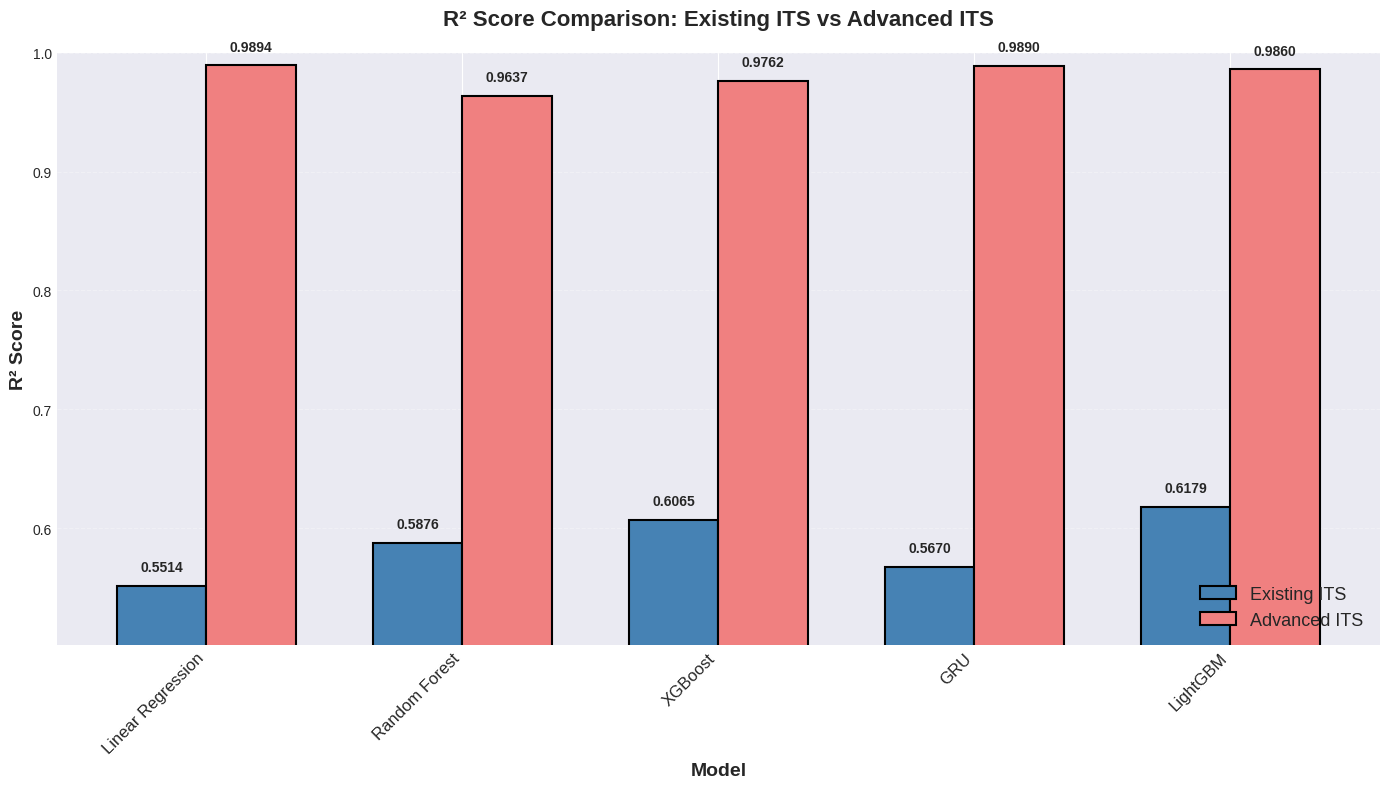

‚úì Chart 1 saved: 'chart_1_r2_comparison.png'

üìä Generating Chart 2: MAE Distribution...


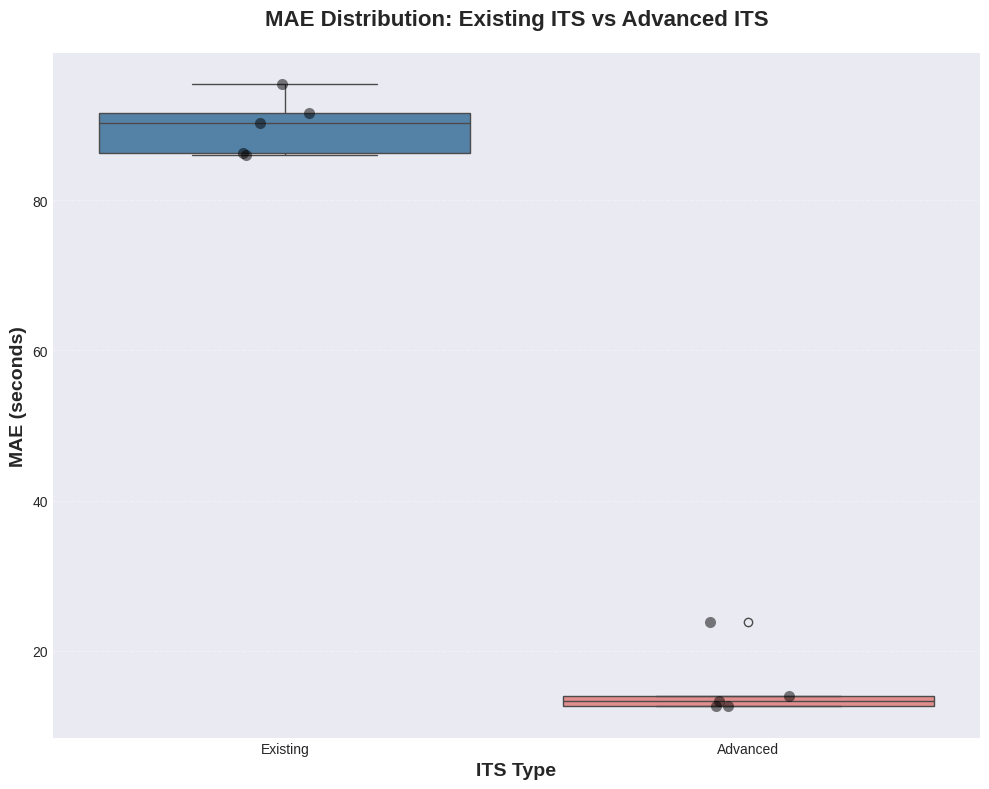

‚úì Chart 2 saved: 'chart_2_mae_distribution.png'

üìä Generating Chart 3: Existing ITS Heatmap...


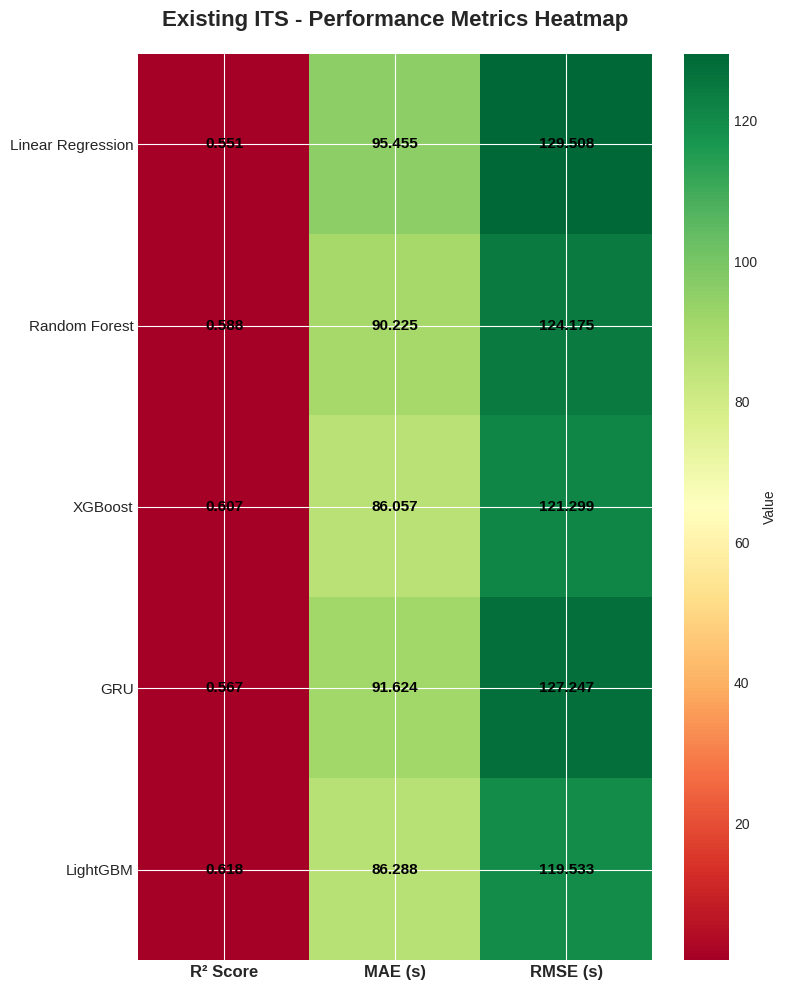

‚úì Chart 3 saved: 'chart_3_existing_heatmap.png'

üìä Generating Chart 4: Advanced ITS Heatmap...


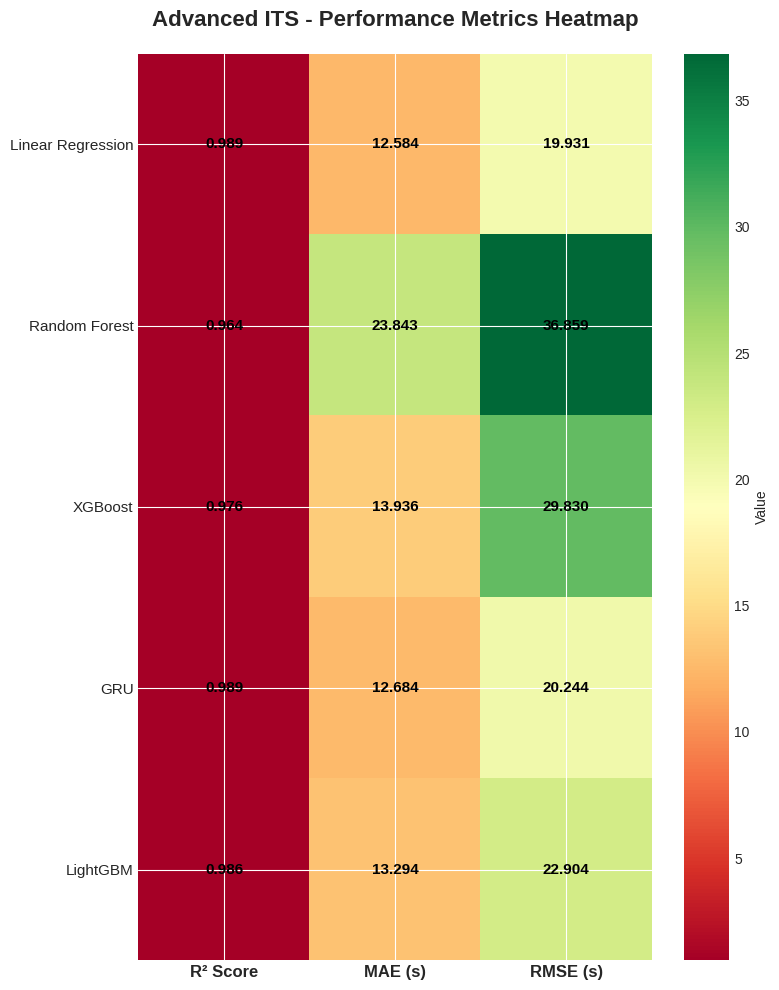

‚úì Chart 4 saved: 'chart_4_advanced_heatmap.png'

üìä Generating Chart 5: Performance Improvement...


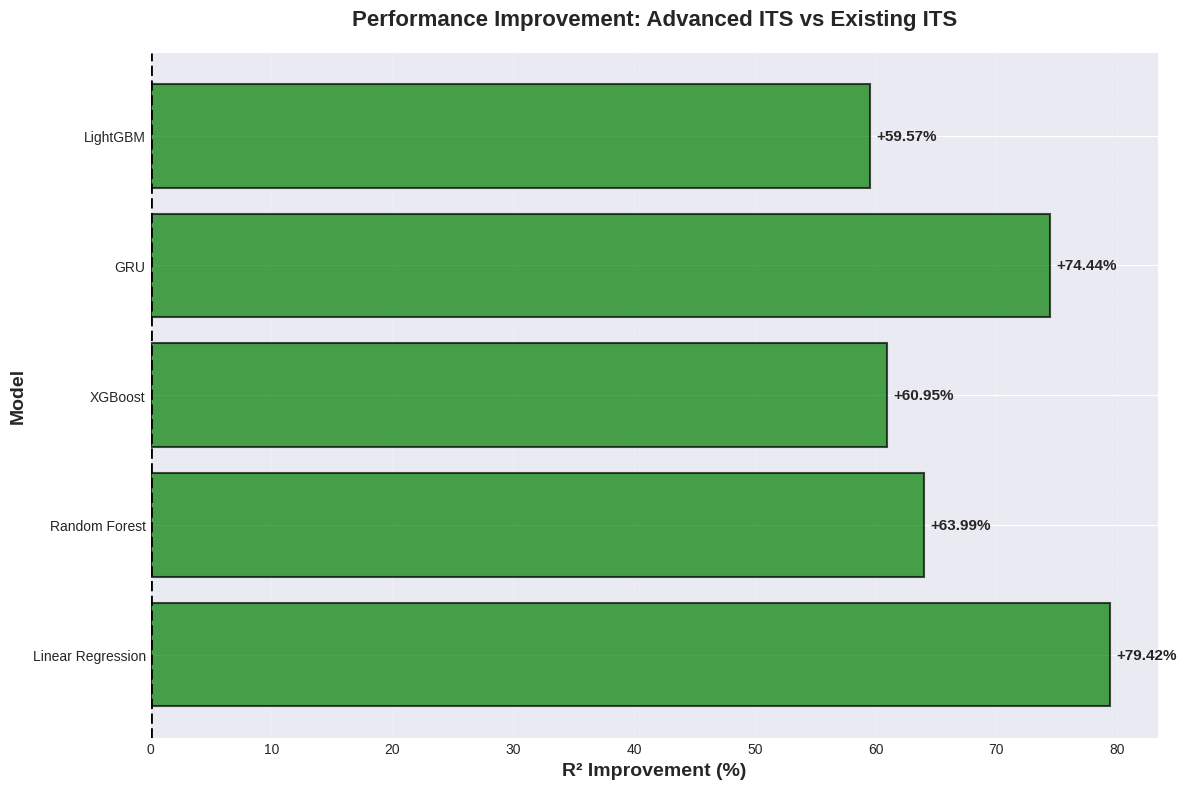

‚úì Chart 5 saved: 'chart_5_improvement_percentage.png'

üìä Generating Chart 6: R¬≤ Scatter Plot...


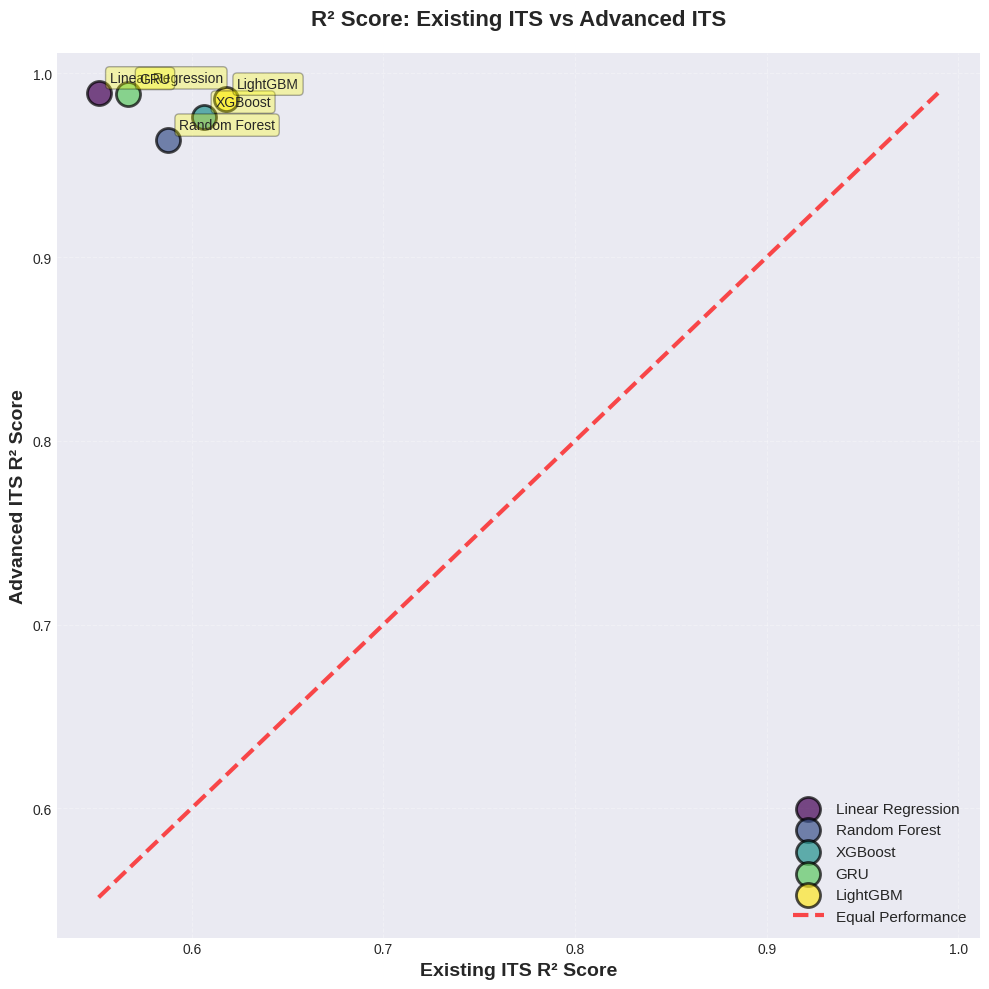

‚úì Chart 6 saved: 'chart_6_r2_scatter.png'

üìä Generating Chart 7: MAE Scatter Plot...


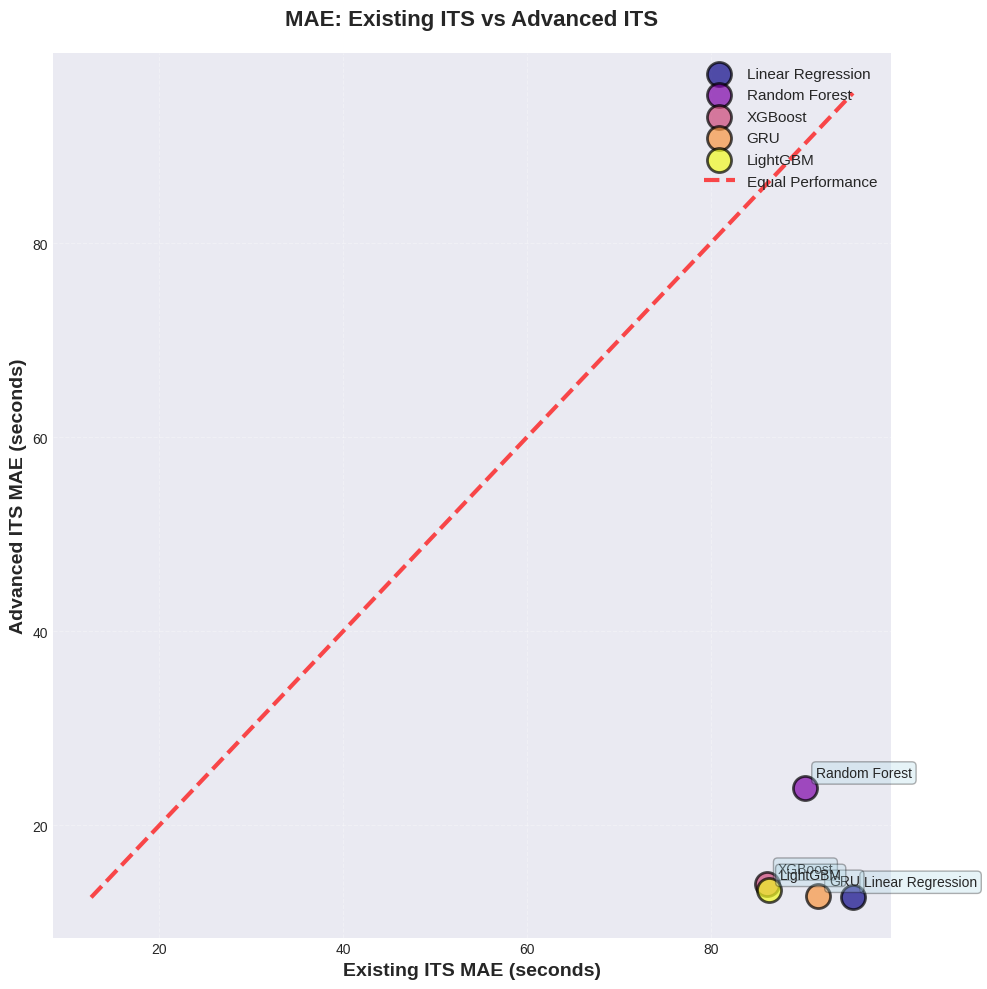

‚úì Chart 7 saved: 'chart_7_mae_scatter.png'

üìä Generating Chart 8: Radar Chart...


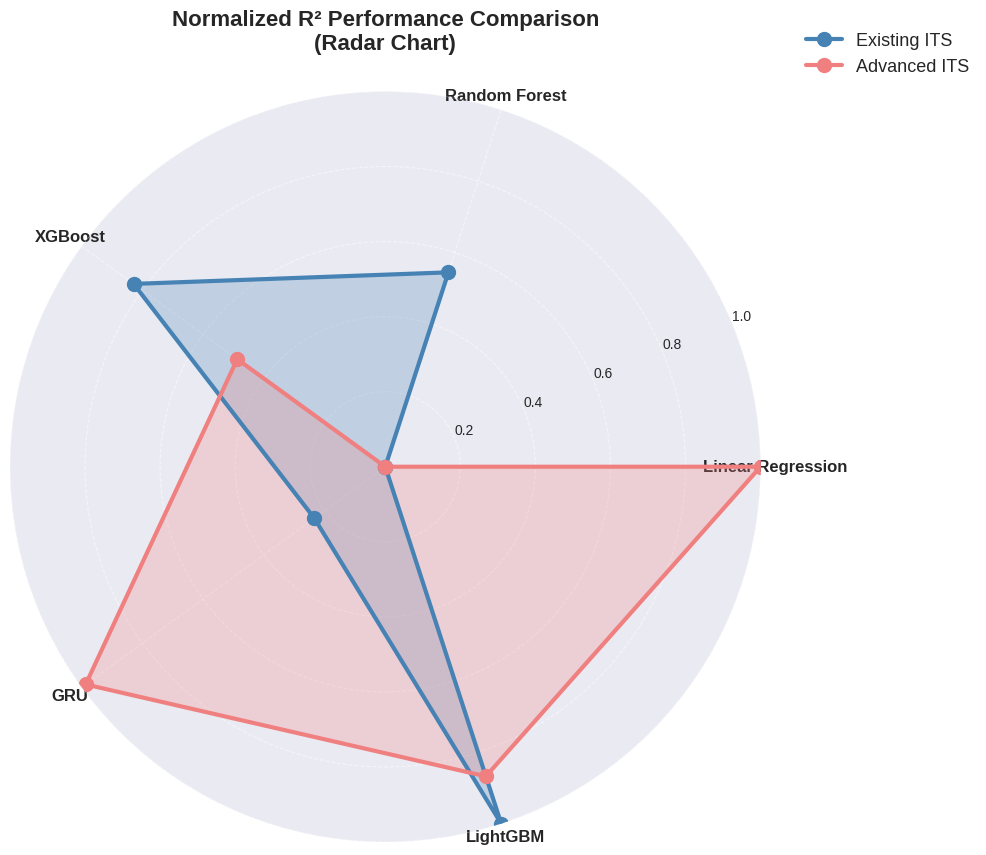

‚úì Chart 8 saved: 'chart_8_radar.png'

üìä Generating Chart 9: Model Ranking...


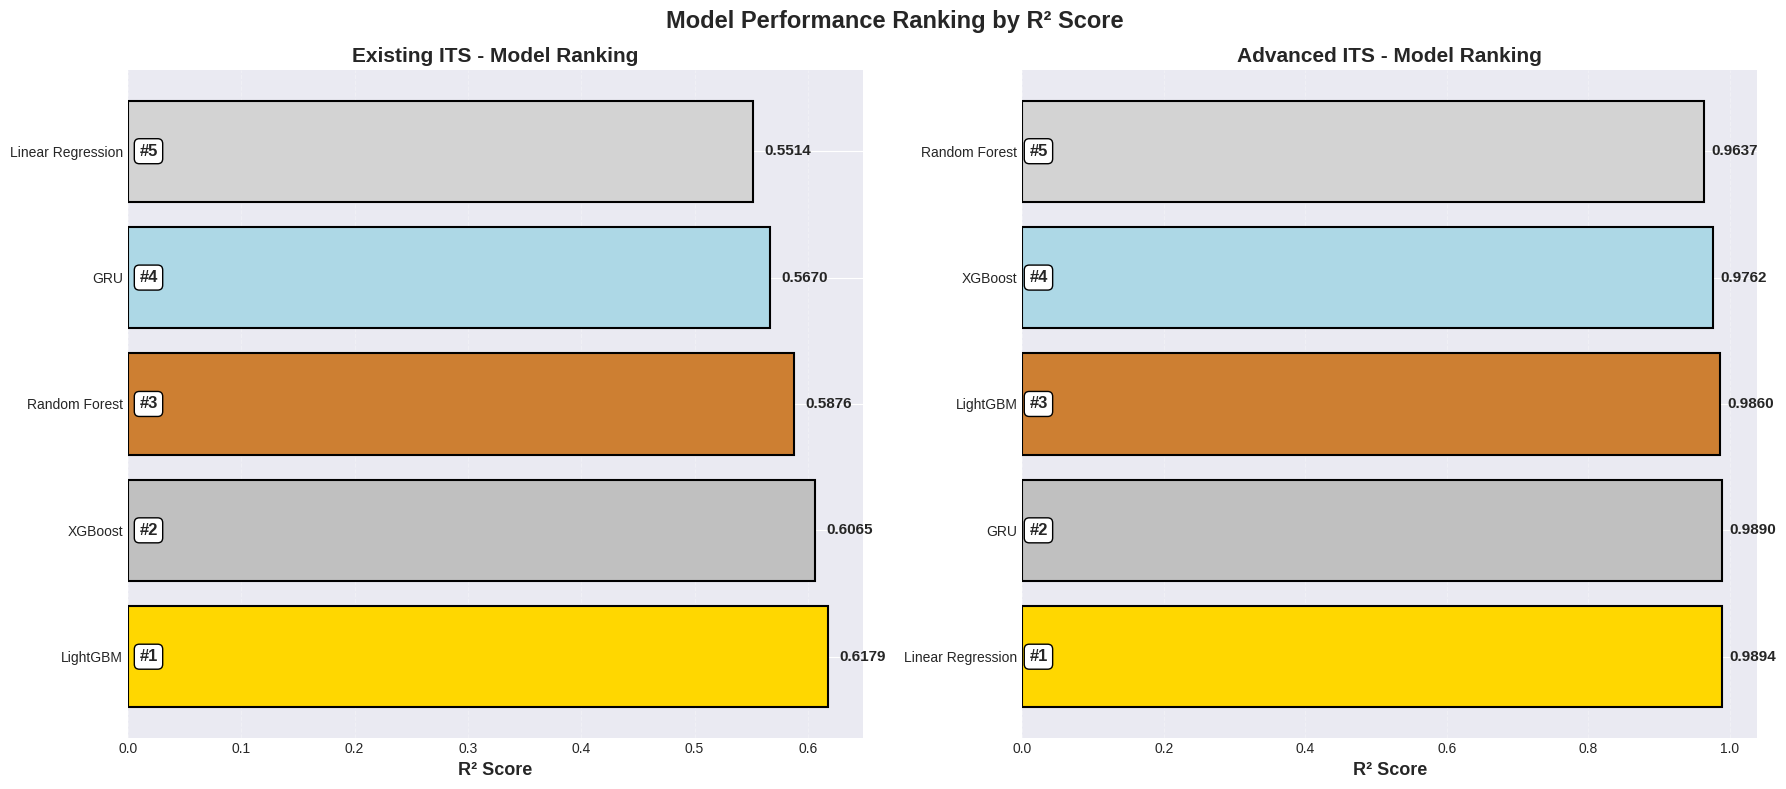

‚úì Chart 9 saved: 'chart_9_ranking.png'

üìä Generating Chart 10: Comprehensive Metrics Comparison...


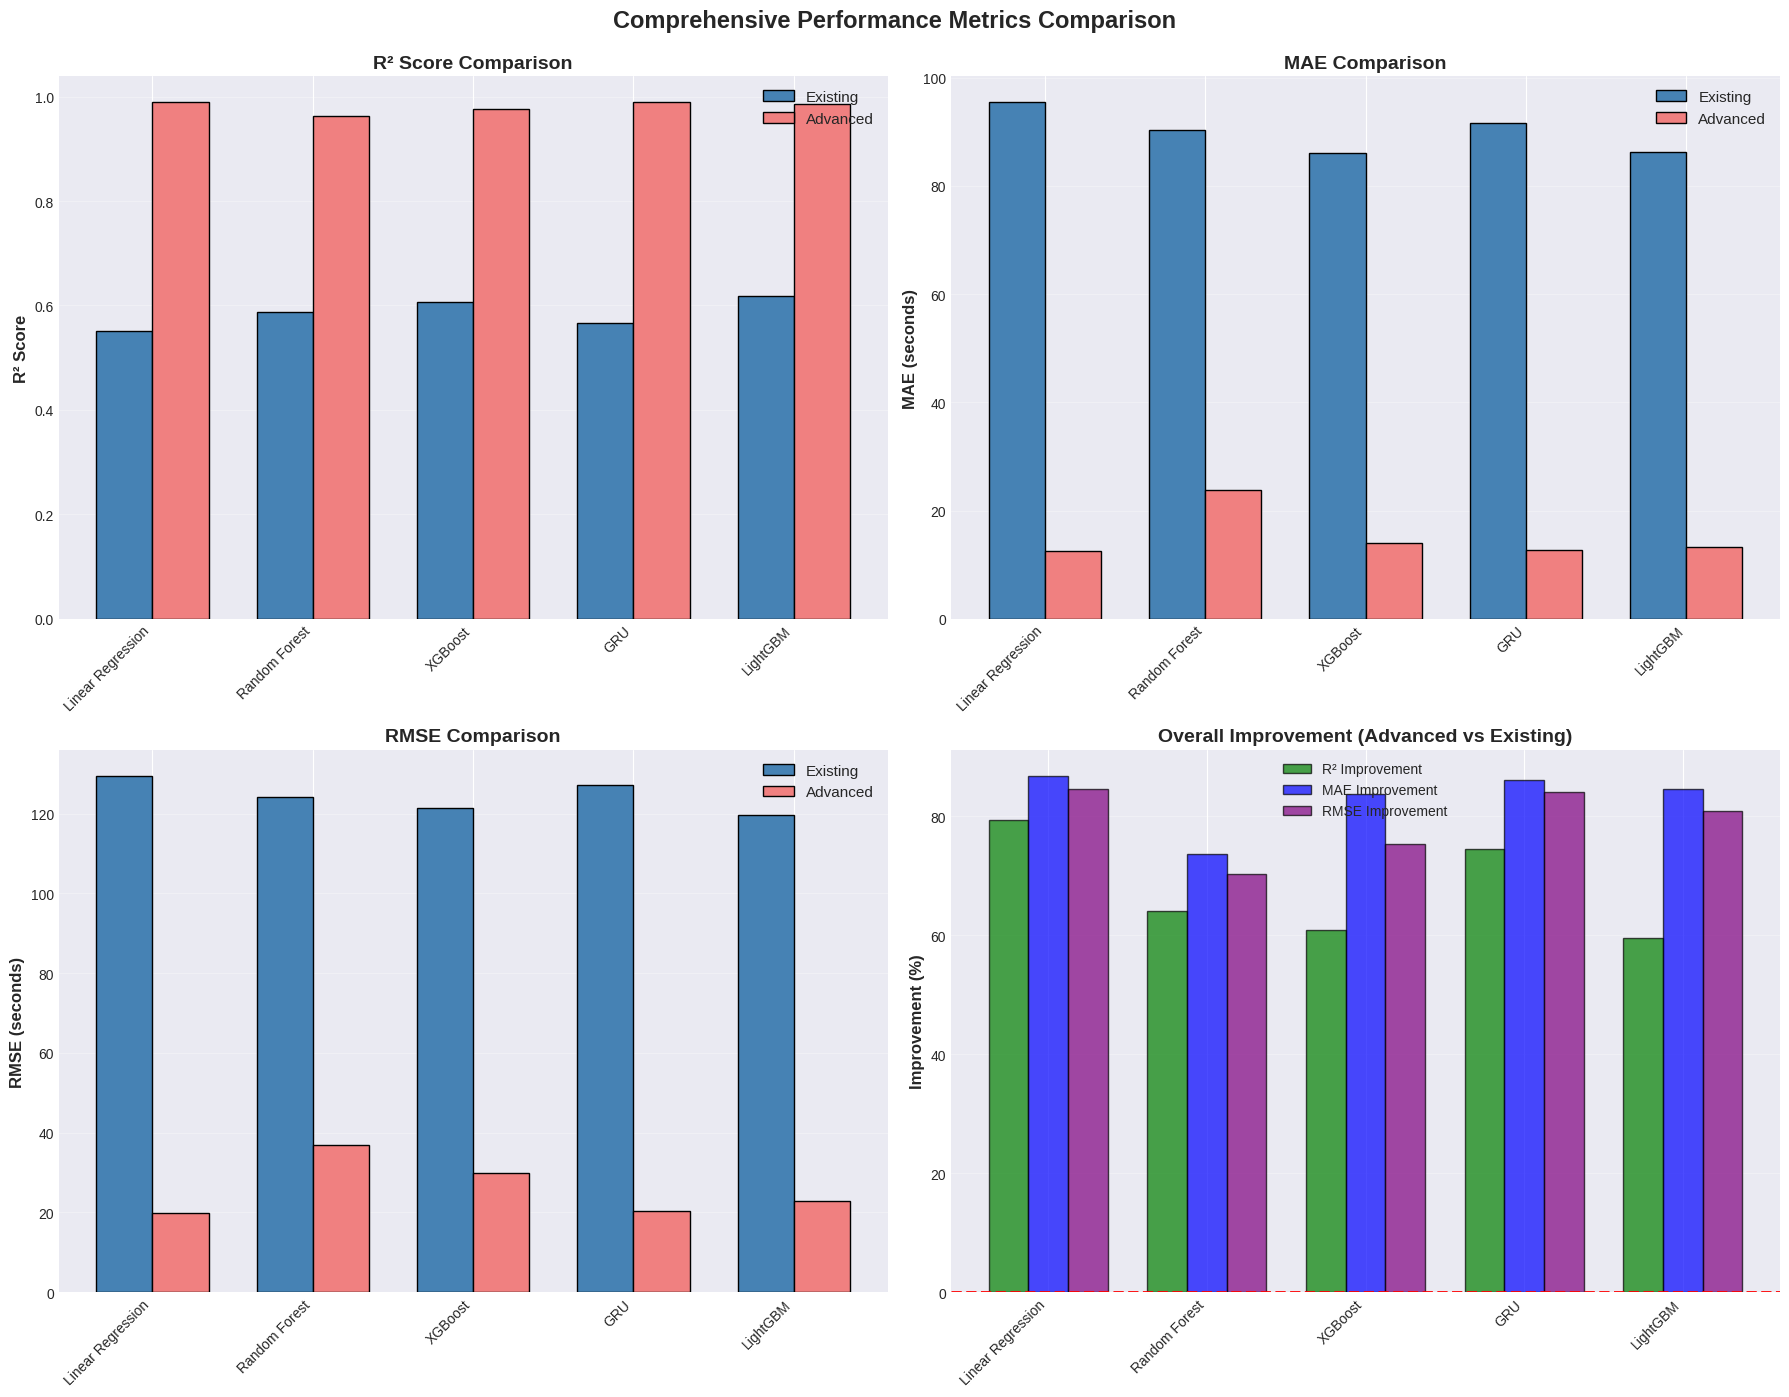

‚úì Chart 10 saved: 'chart_10_comprehensive.png'

Saved Files:
   1. chart_1_r2_comparison.png       - R¬≤ Score Êü±Áä∂ÂõæÂØπÊØî
   2. chart_2_mae_distribution.png    - MAE ÁÆ±Á∫øÂõæÂàÜÂ∏É
   3. chart_3_existing_heatmap.png    - Existing ITS ÁÉ≠ÂäõÂõæ
   4. chart_4_advanced_heatmap.png    - Advanced ITS ÁÉ≠ÂäõÂõæ
   5. chart_5_improvement_percentage.png - ÊÄßËÉΩÊîπËøõÁôæÂàÜÊØî
   6. chart_6_r2_scatter.png          - R¬≤ Êï£ÁÇπÂõæ
   7. chart_7_mae_scatter.png         - MAE Êï£ÁÇπÂõæ
   8. chart_8_radar.png               - Èõ∑ËææÂõæÂØπÊØî
   9. chart_9_ranking.png             - Ê®°ÂûãÊéíÂêçÂØπÊØî
   10. chart_10_comprehensive.png     - ÁªºÂêàÊåáÊ†áÂØπÊØî


In [134]:
model_names_clean = ['Linear Regression', 'Random Forest', 'XGBoost', 'GRU', 'LightGBM']

# ============================================================================
# 6. ÂèØËßÜÂåñÂØπÊØî
# ============================================================================

print("\n" + "="*100)
print("üìä PART 6: VISUALIZATION (SEPARATED CHARTS)")
print("="*100)

# ----------------------------------------------------------------------------
# ÂõæË°® 1: R¬≤ Score ÂØπÊØîÊü±Áä∂Âõæ
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 1: R¬≤ Score Comparison...")

plt.figure(figsize=(14, 8))
x = np.arange(len(model_names_clean))
width = 0.35

bars1 = plt.bar(x - width/2, r2_values_existing, width, label='Existing ITS',
                color='steelblue', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x + width/2, r2_values_advanced, width, label='Advanced ITS',
                color='lightcoral', edgecolor='black', linewidth=1.5)

plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('R¬≤ Score', fontsize=14, fontweight='bold')
plt.title('R¬≤ Score Comparison: Existing ITS vs Advanced ITS', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, model_names_clean, rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=13, loc='lower right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim([min(min(r2_values_existing), min(r2_values_advanced)) - 0.05, 1.0])

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('chart_1_r2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 1 saved: 'chart_1_r2_comparison.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 2: MAE ÂØπÊØîÁÆ±Á∫øÂõæ
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 2: MAE Distribution...")

plt.figure(figsize=(10, 8))
mae_comparison_data = pd.DataFrame({
    'ITS Type': ['Existing']*5 + ['Advanced']*5,
    'Model': model_names_clean * 2,
    'MAE': mae_values_existing + mae_values_advanced
})

import seaborn as sns
sns.boxplot(data=mae_comparison_data, x='ITS Type', y='MAE', palette=['steelblue', 'lightcoral'])
sns.stripplot(data=mae_comparison_data, x='ITS Type', y='MAE',
              color='black', alpha=0.5, size=8, jitter=True)

plt.xlabel('ITS Type', fontsize=14, fontweight='bold')
plt.ylabel('MAE (seconds)', fontsize=14, fontweight='bold')
plt.title('MAE Distribution: Existing ITS vs Advanced ITS', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('chart_2_mae_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 2 saved: 'chart_2_mae_distribution.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 3: Existing ITS ÊÄßËÉΩÁÉ≠ÂäõÂõæ
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 3: Existing ITS Heatmap...")

plt.figure(figsize=(8, 10))
existing_heatmap_data = np.array([r2_values_existing, mae_values_existing, rmse_values_existing]).T

im = plt.imshow(existing_heatmap_data, cmap='RdYlGn', aspect='auto')
plt.colorbar(im, label='Value')

plt.xticks([0, 1, 2], ['R¬≤ Score', 'MAE (s)', 'RMSE (s)'], fontsize=12, fontweight='bold')
plt.yticks(range(5), model_names_clean, fontsize=11)
plt.title('Existing ITS - Performance Metrics Heatmap', fontsize=16, fontweight='bold', pad=20)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i in range(5):
    for j in range(3):
        text = plt.text(j, i, f'{existing_heatmap_data[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('chart_3_existing_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 3 saved: 'chart_3_existing_heatmap.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 4: Advanced ITS ÊÄßËÉΩÁÉ≠ÂäõÂõæ
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 4: Advanced ITS Heatmap...")

plt.figure(figsize=(8, 10))
advanced_heatmap_data = np.array([r2_values_advanced, mae_values_advanced, rmse_values_advanced]).T

im = plt.imshow(advanced_heatmap_data, cmap='RdYlGn', aspect='auto')
plt.colorbar(im, label='Value')

plt.xticks([0, 1, 2], ['R¬≤ Score', 'MAE (s)', 'RMSE (s)'], fontsize=12, fontweight='bold')
plt.yticks(range(5), model_names_clean, fontsize=11)
plt.title('Advanced ITS - Performance Metrics Heatmap', fontsize=16, fontweight='bold', pad=20)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i in range(5):
    for j in range(3):
        text = plt.text(j, i, f'{advanced_heatmap_data[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('chart_4_advanced_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 4 saved: 'chart_4_advanced_heatmap.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 5: ÊÄßËÉΩÊîπËøõÁôæÂàÜÊØî
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 5: Performance Improvement...")

plt.figure(figsize=(12, 8))
r2_improvements = [(r2_values_advanced[i] - r2_values_existing[i]) / r2_values_existing[i] * 100
                   for i in range(5)]
colors_improvement = ['green' if x > 0 else 'red' for x in r2_improvements]

bars = plt.barh(model_names_clean, r2_improvements, color=colors_improvement,
                edgecolor='black', linewidth=1.5, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)

plt.xlabel('R¬≤ Improvement (%)', fontsize=14, fontweight='bold')
plt.ylabel('Model', fontsize=14, fontweight='bold')
plt.title('Performance Improvement: Advanced ITS vs Existing ITS', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, (bar, val) in enumerate(zip(bars, r2_improvements)):
    plt.text(val + (0.5 if val > 0 else -0.5), i, f'{val:+.2f}%',
             va='center', ha='left' if val > 0 else 'right',
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('chart_5_improvement_percentage.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 5 saved: 'chart_5_improvement_percentage.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 6: R¬≤ Êï£ÁÇπÂõæ (Existing vs Advanced)
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 6: R¬≤ Scatter Plot...")

plt.figure(figsize=(10, 10))
colors_scatter = plt.cm.viridis(np.linspace(0, 1, 5))

for i, name in enumerate(model_names_clean):
    plt.scatter(r2_values_existing[i], r2_values_advanced[i],
               s=300, c=[colors_scatter[i]], edgecolors='black',
               linewidth=2, alpha=0.7, label=name)

# Ê∑ªÂä†Á≠âÊÄßËÉΩÁ∫ø
min_val = min(min(r2_values_existing), min(r2_values_advanced))
max_val = max(max(r2_values_existing), max(r2_values_advanced))
plt.plot([min_val, max_val], [min_val, max_val],
         'r--', lw=3, label='Equal Performance', alpha=0.7)

plt.xlabel('Existing ITS R¬≤ Score', fontsize=14, fontweight='bold')
plt.ylabel('Advanced ITS R¬≤ Score', fontsize=14, fontweight='bold')
plt.title('R¬≤ Score: Existing ITS vs Advanced ITS', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3, linestyle='--')

# Ê∑ªÂä†Ê®°ÂûãÂêçÁß∞Ê†áÁ≠æ
for i, name in enumerate(model_names_clean):
    plt.annotate(name, (r2_values_existing[i], r2_values_advanced[i]),
                fontsize=10, xytext=(8, 8), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('chart_6_r2_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 6 saved: 'chart_6_r2_scatter.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 7: MAE Êï£ÁÇπÂõæ (Existing vs Advanced)
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 7: MAE Scatter Plot...")

plt.figure(figsize=(10, 10))
colors_scatter = plt.cm.plasma(np.linspace(0, 1, 5))

for i, name in enumerate(model_names_clean):
    plt.scatter(mae_values_existing[i], mae_values_advanced[i],
               s=300, c=[colors_scatter[i]], edgecolors='black',
               linewidth=2, alpha=0.7, label=name)

# Ê∑ªÂä†Á≠âÊÄßËÉΩÁ∫ø
min_val = min(min(mae_values_existing), min(mae_values_advanced))
max_val = max(max(mae_values_existing), max(mae_values_advanced))
plt.plot([min_val, max_val], [min_val, max_val],
         'r--', lw=3, label='Equal Performance', alpha=0.7)

plt.xlabel('Existing ITS MAE (seconds)', fontsize=14, fontweight='bold')
plt.ylabel('Advanced ITS MAE (seconds)', fontsize=14, fontweight='bold')
plt.title('MAE: Existing ITS vs Advanced ITS', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')

# Ê∑ªÂä†Ê®°ÂûãÂêçÁß∞Ê†áÁ≠æ
for i, name in enumerate(model_names_clean):
    plt.annotate(name, (mae_values_existing[i], mae_values_advanced[i]),
                fontsize=10, xytext=(8, 8), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.savefig('chart_7_mae_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 7 saved: 'chart_7_mae_scatter.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 8: Èõ∑ËææÂõæ (ÂΩí‰∏ÄÂåñÊÄßËÉΩÂØπÊØî)
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 8: Radar Chart...")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# ÂΩí‰∏ÄÂåñR¬≤Âà∞0-1ËåÉÂõ¥
r2_existing_norm = (np.array(r2_values_existing) - min(r2_values_existing)) / \
                   (max(r2_values_existing) - min(r2_values_existing) + 1e-10)
r2_advanced_norm = (np.array(r2_values_advanced) - min(r2_values_advanced)) / \
                   (max(r2_values_advanced) - min(r2_values_advanced) + 1e-10)

angles = np.linspace(0, 2 * np.pi, len(model_names_clean), endpoint=False).tolist()
r2_existing_norm = r2_existing_norm.tolist()
r2_advanced_norm = r2_advanced_norm.tolist()

# Èó≠ÂêàÂõæÂΩ¢
angles += angles[:1]
r2_existing_norm += r2_existing_norm[:1]
r2_advanced_norm += r2_advanced_norm[:1]

# ÁªòÂà∂
ax.plot(angles, r2_existing_norm, 'o-', linewidth=3, label='Existing ITS',
        color='steelblue', markersize=10)
ax.fill(angles, r2_existing_norm, alpha=0.25, color='steelblue')

ax.plot(angles, r2_advanced_norm, 'o-', linewidth=3, label='Advanced ITS',
        color='lightcoral', markersize=10)
ax.fill(angles, r2_advanced_norm, alpha=0.25, color='lightcoral')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(model_names_clean, fontsize=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Normalized R¬≤ Performance Comparison\n(Radar Chart)',
             fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=13)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('chart_8_radar.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 8 saved: 'chart_8_radar.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 9: ÁªºÂêàÊéíÂêçÂØπÊØîÔºàÂà†Èô§Ë°®ÊÉÖÁ¨¶Âè∑Ôºâ
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 9: Model Ranking...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Existing ITS ÊéíÂêç
sorted_idx_existing = np.argsort(r2_values_existing)[::-1]
sorted_models_existing = [model_names_clean[i] for i in sorted_idx_existing]
sorted_r2_existing = [r2_values_existing[i] for i in sorted_idx_existing]

colors_rank = ['gold', 'silver', '#CD7F32', 'lightblue', 'lightgray']
bars1 = ax1.barh(sorted_models_existing, sorted_r2_existing,
                 color=colors_rank, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('R¬≤ Score', fontsize=13, fontweight='bold')
ax1.set_title('Existing ITS - Model Ranking', fontsize=15, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æÂíåÊéíÂêçÔºà‰∏çÁî®Ë°®ÊÉÖÁ¨¶Âè∑Ôºâ
for i, (bar, val) in enumerate(zip(bars1, sorted_r2_existing)):
    ax1.text(val + 0.01, i, f'{val:.4f}', va='center', fontsize=11, fontweight='bold')
    rank_text = f'#{i+1}'  # ‰ΩøÁî® #1, #2, #3 Á≠â
    ax1.text(0.01, i, rank_text, va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))

# Advanced ITS ÊéíÂêç
sorted_idx_advanced = np.argsort(r2_values_advanced)[::-1]
sorted_models_advanced = [model_names_clean[i] for i in sorted_idx_advanced]
sorted_r2_advanced = [r2_values_advanced[i] for i in sorted_idx_advanced]

bars2 = ax2.barh(sorted_models_advanced, sorted_r2_advanced,
                 color=colors_rank, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('R¬≤ Score', fontsize=13, fontweight='bold')
ax2.set_title('Advanced ITS - Model Ranking', fontsize=15, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æÂíåÊéíÂêçÔºà‰∏çÁî®Ë°®ÊÉÖÁ¨¶Âè∑Ôºâ
for i, (bar, val) in enumerate(zip(bars2, sorted_r2_advanced)):
    ax2.text(val + 0.01, i, f'{val:.4f}', va='center', fontsize=11, fontweight='bold')
    rank_text = f'#{i+1}'
    ax2.text(0.01, i, rank_text, va='center', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))

plt.suptitle('Model Performance Ranking by R¬≤ Score', fontsize=17, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('chart_9_ranking.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 9 saved: 'chart_9_ranking.png'")

# ----------------------------------------------------------------------------
# ÂõæË°® 10: ÊâÄÊúâÊåáÊ†áÁªºÂêàÂØπÊØî (ÂàÜÁªÑÊü±Áä∂Âõæ)
# ----------------------------------------------------------------------------
print("\nüìä Generating Chart 10: Comprehensive Metrics Comparison...")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# R¬≤ ÂØπÊØî
ax = axes[0, 0]
x = np.arange(len(model_names_clean))
width = 0.35
ax.bar(x - width/2, r2_values_existing, width, label='Existing', color='steelblue', edgecolor='black')
ax.bar(x + width/2, r2_values_advanced, width, label='Advanced', color='lightcoral', edgecolor='black')
ax.set_ylabel('R¬≤ Score', fontsize=12, fontweight='bold')
ax.set_title('R¬≤ Score Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names_clean, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# MAE ÂØπÊØî
ax = axes[0, 1]
ax.bar(x - width/2, mae_values_existing, width, label='Existing', color='steelblue', edgecolor='black')
ax.bar(x + width/2, mae_values_advanced, width, label='Advanced', color='lightcoral', edgecolor='black')
ax.set_ylabel('MAE (seconds)', fontsize=12, fontweight='bold')
ax.set_title('MAE Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names_clean, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# RMSE ÂØπÊØî
ax = axes[1, 0]
ax.bar(x - width/2, rmse_values_existing, width, label='Existing', color='steelblue', edgecolor='black')
ax.bar(x + width/2, rmse_values_advanced, width, label='Advanced', color='lightcoral', edgecolor='black')
ax.set_ylabel('RMSE (seconds)', fontsize=12, fontweight='bold')
ax.set_title('RMSE Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names_clean, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# ÊîπËøõÁôæÂàÜÊØîÊ±áÊÄª
ax = axes[1, 1]
r2_imp = [(r2_values_advanced[i] - r2_values_existing[i]) / r2_values_existing[i] * 100 for i in range(5)]
mae_imp = [(mae_values_existing[i] - mae_values_advanced[i]) / mae_values_existing[i] * 100 for i in range(5)]
rmse_imp = [(rmse_values_existing[i] - rmse_values_advanced[i]) / rmse_values_existing[i] * 100 for i in range(5)]

x_imp = np.arange(len(model_names_clean))
width_imp = 0.25
ax.bar(x_imp - width_imp, r2_imp, width_imp, label='R¬≤ Improvement', color='green', alpha=0.7, edgecolor='black')
ax.bar(x_imp, mae_imp, width_imp, label='MAE Improvement', color='blue', alpha=0.7, edgecolor='black')
ax.bar(x_imp + width_imp, rmse_imp, width_imp, label='RMSE Improvement', color='purple', alpha=0.7, edgecolor='black')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('Improvement (%)', fontsize=12, fontweight='bold')
ax.set_title('Overall Improvement (Advanced vs Existing)', fontsize=14, fontweight='bold')
ax.set_xticks(x_imp)
ax.set_xticklabels(model_names_clean, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.suptitle('Comprehensive Performance Metrics Comparison', fontsize=17, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('chart_10_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()
print("‚úì Chart 10 saved: 'chart_10_comprehensive.png'")

# ----------------------------------------------------------------------------
# ÊÄªÁªì
# ----------------------------------------------------------------------------

print("="*100)
print("\nSaved Files:")
print("   1. chart_1_r2_comparison.png       - R¬≤ Score Êü±Áä∂ÂõæÂØπÊØî")
print("   2. chart_2_mae_distribution.png    - MAE ÁÆ±Á∫øÂõæÂàÜÂ∏É")
print("   3. chart_3_existing_heatmap.png    - Existing ITS ÁÉ≠ÂäõÂõæ")
print("   4. chart_4_advanced_heatmap.png    - Advanced ITS ÁÉ≠ÂäõÂõæ")
print("   5. chart_5_improvement_percentage.png - ÊÄßËÉΩÊîπËøõÁôæÂàÜÊØî")
print("   6. chart_6_r2_scatter.png          - R¬≤ Êï£ÁÇπÂõæ")
print("   7. chart_7_mae_scatter.png         - MAE Êï£ÁÇπÂõæ")
print("   8. chart_8_radar.png               - Èõ∑ËææÂõæÂØπÊØî")
print("   9. chart_9_ranking.png             - Ê®°ÂûãÊéíÂêçÂØπÊØî")
print("   10. chart_10_comprehensive.png     - ÁªºÂêàÊåáÊ†áÂØπÊØî")



## ‰øùÂ≠òÊ®°Âûã

In [131]:
# ============================================================================
# üíæ ‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÂíåÊâÄÊúâÁõ∏ÂÖ≥Êï∞ÊçÆ
# ============================================================================

print("\n" + "="*80)
print("üíæ SAVING BEST MODEL AND DATA")
print("="*80)

import joblib
import json
import hashlib
import pandas as pd
from datetime import datetime

# ----------------------------------------------------------------------------
# 1. ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
# ----------------------------------------------------------------------------

print("\n1. ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã...")

# ‰øùÂ≠òÊ®°ÂûãÂØπË±°
joblib.dump(lgb_model_existing, 'lgb_model_existing_best.joblib')
print("   ‚úì Ê®°ÂûãÂ∑≤‰øùÂ≠ò: lgb_model_existing_best.joblib")

# ----------------------------------------------------------------------------
# 2. ‰øùÂ≠òËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ
# ----------------------------------------------------------------------------

print("\n2. ‰øùÂ≠òËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ...")

# ‰øùÂ≠òËÆ≠ÁªÉÊï∞ÊçÆ
joblib.dump({
    'X_train': X_train_existing_scaled,
    'y_train': y_train_existing
}, 'train_data_existing.joblib')
print("   ‚úì ËÆ≠ÁªÉÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: /train_data_existing.joblib")

# ‰øùÂ≠òÊµãËØïÊï∞ÊçÆ
joblib.dump({
    'X_test': X_test_existing_scaled,
    'y_test': y_test_existing
}, 'test_data_existing.joblib')
print("   ‚úì ÊµãËØïÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: test_data_existing.joblib")

# ----------------------------------------------------------------------------
# 3. ‰øùÂ≠òÈ¢ÑÂ§ÑÁêÜÂô®ÔºàÂ¶ÇÊûúÊúâÁöÑËØùÔºâ
# ----------------------------------------------------------------------------

print("\n3. ‰øùÂ≠òÈ¢ÑÂ§ÑÁêÜÂô®...")

# Â¶ÇÊûú‰Ω†Êúâ scalerÔºå‰øùÂ≠òÂÆÉ
# ÂÅáËÆæ‰Ω†ÁöÑ scaler ÂèòÈáèÂêçÊòØ scaler_existing
try:
    joblib.dump(scaler_existing, 'scaler_existing.joblib')
    print("   ‚úì Scaler Â∑≤‰øùÂ≠ò: scaler_existing.joblib")
except NameError:
    print("   ‚ö†Ô∏è  Êú™ÊâæÂà∞ scaler_existingÔºåË∑≥Ëøá")

# ----------------------------------------------------------------------------
# 4. ‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÁöÑÊÄßËÉΩÊåáÊ†á
# ----------------------------------------------------------------------------

print("\n4. ‰øùÂ≠òÊÄßËÉΩÊåáÊ†á...")

metrics_best = {
    'model_name': 'LightGBM',
    'configuration': best_result['name'],
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),

    # ËÆ≠ÁªÉÈõÜÊÄßËÉΩ
    'train_metrics': {
        'r2': float(train_r2_lgb_existing),
        'mae': float(train_mae_lgb_existing),
        'rmse': float(train_rmse_lgb_existing)
    },

    # ÊµãËØïÈõÜÊÄßËÉΩ
    'test_metrics': {
        'r2': float(test_r2_lgb_existing),
        'mae': float(test_mae_lgb_existing),
        'rmse': float(test_rmse_lgb_existing)
    },

    # Êï∞ÊçÆ‰ø°ÊÅØ
    'data_info': {
        'train_size': int(X_train_existing_scaled.shape[0]),
        'test_size': int(X_test_existing_scaled.shape[0]),
        'n_features': int(X_train_existing_scaled.shape[1]),
        'feature_names': list(X_train_existing_scaled.columns) if hasattr(X_train_existing_scaled, 'columns') else None
    },

    # ÊúÄ‰Ω≥ÂèÇÊï∞
    'best_params': best_result['params'],

    # ËÆ≠ÁªÉÊó∂Èó¥
    'training_time': float(best_result['time'])
}

with open('metrics_best.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_best, f, indent=4, ensure_ascii=False)
print("   ‚úì ÊÄßËÉΩÊåáÊ†áÂ∑≤‰øùÂ≠ò: metrics_best.json")

# ----------------------------------------------------------------------------
# 5. ‰øùÂ≠òÊâÄÊúâÈÖçÁΩÆÁöÑÁªìÊûú
# ----------------------------------------------------------------------------

print("\n5. ‰øùÂ≠òÊâÄÊúâÈÖçÁΩÆÁöÑÁªìÊûú...")

all_results = []
for r in results:
    all_results.append({
        'configuration': r['name'],
        'train_r2': float(r['train_r2']),
        'test_r2': float(r['test_r2']),
        'test_mae': float(r['test_mae']),
        'test_rmse': float(r['test_rmse']),
        'training_time': float(r['time']),
        'params': r['params']
    })

with open('all_configurations.json', 'w', encoding='utf-8') as f:
    json.dump(all_results, f, indent=4, ensure_ascii=False)
print("   ‚úì ÊâÄÊúâÈÖçÁΩÆÁªìÊûúÂ∑≤‰øùÂ≠ò: all_configurations.json")

# ----------------------------------------------------------------------------
# 8. ‰øùÂ≠òÊï∞ÊçÆÁöÑÂÖÉ‰ø°ÊÅØÔºàÁî®‰∫éÈ™åËØÅÔºâ- ‰øÆÂ§çÁâà
# ----------------------------------------------------------------------------

print("\n8. ‰øùÂ≠òÊï∞ÊçÆÂÖÉ‰ø°ÊÅØ...")

def compute_hash(data):
    """ËÆ°ÁÆóÊï∞ÊçÆÁöÑ hash ÂÄº"""
    if isinstance(data, pd.DataFrame):
        data_bytes = pd.util.hash_pandas_object(data, index=True).values.tobytes()
    elif isinstance(data, pd.Series):
        data_bytes = pd.util.hash_pandas_object(data, index=True).values.tobytes()
    elif isinstance(data, np.ndarray):
        data_bytes = data.tobytes()
    else:
        # ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ
        data_bytes = np.array(data).tobytes()
    return hashlib.md5(data_bytes).hexdigest()

def get_shape(data):
    """ÂÆâÂÖ®Âú∞Ëé∑ÂèñÊï∞ÊçÆÁöÑ shape"""
    if hasattr(data, 'shape'):
        return data.shape
    elif isinstance(data, (list, tuple)):
        return (len(data),)
    else:
        # ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑÂêéËé∑Âèñ shape
        return np.array(data).shape

def get_data_info(data, name):
    """Ëé∑ÂèñÊï∞ÊçÆÁöÑËØ¶ÁªÜ‰ø°ÊÅØ"""
    info = {
        'shape': get_shape(data),
        'type': str(type(data).__name__),
        'hash': compute_hash(data)
    }

    # Â¶ÇÊûúÊòØ DataFrame Êàñ SeriesÔºåËÆ∞ÂΩïÂàóÂêç
    if isinstance(data, pd.DataFrame):
        info['columns'] = list(data.columns)
        info['dtypes'] = {col: str(dtype) for col, dtype in data.dtypes.items()}
    elif isinstance(data, pd.Series):
        info['name'] = data.name
        info['dtype'] = str(data.dtype)

    return info

# Êî∂ÈõÜÊâÄÊúâÊï∞ÊçÆ‰ø°ÊÅØ
metadata = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'X_train': get_data_info(X_train_existing_scaled, 'X_train'),
    'y_train': get_data_info(y_train_existing, 'y_train'),
    'X_test': get_data_info(X_test_existing_scaled, 'X_test'),
    'y_test': get_data_info(y_test_existing, 'y_test')
}

# Ê∑ªÂä†ÁâπÂæÅÂêçÁß∞ÔºàÂ¶ÇÊûúÊúâÔºâ
if hasattr(X_train_existing_scaled, 'columns'):
    metadata['feature_names'] = list(X_train_existing_scaled.columns)
else:
    metadata['feature_names'] = None

with open('metadata.json', 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)
print("   ‚úì ÂÖÉ‰ø°ÊÅØÂ∑≤‰øùÂ≠ò: metadata.json")

# ÊòæÁ§∫Êï∞ÊçÆÁ±ªÂûã‰ø°ÊÅØÔºàÁî®‰∫éË∞ÉËØïÔºâ
print("\n   Êï∞ÊçÆÁ±ªÂûã‰ø°ÊÅØ:")
print(f"     X_train: {type(X_train_existing_scaled).__name__}, shape: {get_shape(X_train_existing_scaled)}")
print(f"     y_train: {type(y_train_existing).__name__}, shape: {get_shape(y_train_existing)}")
print(f"     X_test:  {type(X_test_existing_scaled).__name__}, shape: {get_shape(X_test_existing_scaled)}")
print(f"     y_test:  {type(y_test_existing).__name__}, shape: {get_shape(y_test_existing)}")


üíæ SAVING BEST MODEL AND DATA

1. ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã...
   ‚úì Ê®°ÂûãÂ∑≤‰øùÂ≠ò: lgb_model_existing_best.joblib

2. ‰øùÂ≠òËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ...
   ‚úì ËÆ≠ÁªÉÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: /train_data_existing.joblib
   ‚úì ÊµãËØïÊï∞ÊçÆÂ∑≤‰øùÂ≠ò: test_data_existing.joblib

3. ‰øùÂ≠òÈ¢ÑÂ§ÑÁêÜÂô®...
   ‚úì Scaler Â∑≤‰øùÂ≠ò: scaler_existing.joblib

4. ‰øùÂ≠òÊÄßËÉΩÊåáÊ†á...
   ‚úì ÊÄßËÉΩÊåáÊ†áÂ∑≤‰øùÂ≠ò: metrics_best.json

5. ‰øùÂ≠òÊâÄÊúâÈÖçÁΩÆÁöÑÁªìÊûú...
   ‚úì ÊâÄÊúâÈÖçÁΩÆÁªìÊûúÂ∑≤‰øùÂ≠ò: all_configurations.json

8. ‰øùÂ≠òÊï∞ÊçÆÂÖÉ‰ø°ÊÅØ...
   ‚úì ÂÖÉ‰ø°ÊÅØÂ∑≤‰øùÂ≠ò: metadata.json

   Êï∞ÊçÆÁ±ªÂûã‰ø°ÊÅØ:
     X_train: DataFrame, shape: (436082, 18)
     y_train: str, shape: ()
     X_test:  DataFrame, shape: (109021, 18)
     y_test:  str, shape: ()


In [117]:
# ============================================================================
# Ê≠£Á°ÆÁöÑ‰øùÂ≠òÊñπÂºè
# ============================================================================

print("\n" + "="*100)
print("üíæ Ê≠£Á°Æ‰øùÂ≠òÊ®°ÂûãÂíåÊï∞ÊçÆ")
print("="*100)

import joblib
import json
import hashlib
import pandas as pd

# ----------------------------------------------------------------------------
# 1. ‰øùÂ≠òÊ®°Âûã
# ----------------------------------------------------------------------------

print("\n‰øùÂ≠ò LightGBM Ê®°Âûã...")

# ‰øùÂ≠òÊ®°ÂûãÂØπË±°
joblib.dump(lgb_model_existing, 'lgb_model_existing.joblib')
print("‚úì Ê®°ÂûãÂ∑≤‰øùÂ≠ò")

# ----------------------------------------------------------------------------
# 2. ‰øùÂ≠òËÆ≠ÁªÉÊï∞ÊçÆÂíåÊµãËØïÊï∞ÊçÆ
# ----------------------------------------------------------------------------

print("\n‰øùÂ≠òËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ...")

# ‰øùÂ≠òËÆ≠ÁªÉÊï∞ÊçÆ
joblib.dump((X_train_existing, y_train_existing), 'train_data_existing.joblib')
print("‚úì ËÆ≠ÁªÉÊï∞ÊçÆÂ∑≤‰øùÂ≠ò")

# ‰øùÂ≠òÊµãËØïÊï∞ÊçÆ
joblib.dump((X_test_existing, y_test_existing), 'test_data_existing.joblib')
print("‚úì ÊµãËØïÊï∞ÊçÆÂ∑≤‰øùÂ≠ò")

# ----------------------------------------------------------------------------
# 3. ËÆ°ÁÆóÂπ∂‰øùÂ≠òÊÄßËÉΩÊåáÊ†áÔºà‰∏ç‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÔºâ
# ----------------------------------------------------------------------------

print("\nËÆ°ÁÆóÊÄßËÉΩÊåáÊ†á...")

# ÈáçÊñ∞È¢ÑÊµãÔºàÁ°Æ‰øù‰ΩøÁî®Ê≠£Á°ÆÁöÑÊï∞ÊçÆÔºâ
y_pred_lgb_existing = lgb_model_existing.predict(X_test_existing)

# ËÆ°ÁÆóÊåáÊ†á
metrics_existing = {
    'model': 'LightGBM',
    'r2': float(r2_score(y_test_existing, y_pred_lgb_existing)),
    'mae': float(mean_absolute_error(y_test_existing, y_pred_lgb_existing)),
    'rmse': float(np.sqrt(mean_squared_error(y_test_existing, y_pred_lgb_existing))),
    'test_size': int(X_test_existing.shape[0]),
    'n_features': int(X_test_existing.shape[1])
}

# ‰øùÂ≠òÊåáÊ†á
with open('metrics_existing.json', 'w') as f:
    json.dump(metrics_existing, f, indent=4)
print("‚úì ÊÄßËÉΩÊåáÊ†áÂ∑≤‰øùÂ≠ò")

# ----------------------------------------------------------------------------
# 4. ‰øùÂ≠òÊï∞ÊçÆÁöÑÂÖÉ‰ø°ÊÅØÔºàÁî®‰∫éÈ™åËØÅÔºâ
# ----------------------------------------------------------------------------

print("\n‰øùÂ≠òÊï∞ÊçÆÂÖÉ‰ø°ÊÅØ...")

# ËÆ°ÁÆóÊï∞ÊçÆÁöÑ hashÔºàÁî®‰∫éÈ™åËØÅÊï∞ÊçÆ‰∏ÄËá¥ÊÄßÔºâ
def compute_hash(data):
    """ËÆ°ÁÆóÊï∞ÊçÆÁöÑ hash ÂÄº"""
    if isinstance(data, pd.DataFrame):
        data_bytes = pd.util.hash_pandas_object(data, index=True).values.tobytes()
    elif isinstance(data, pd.Series):
        data_bytes = pd.util.hash_pandas_object(data, index=True).values.tobytes()
    else:
        data_bytes = data.tobytes()
    return hashlib.md5(data_bytes).hexdigest()

metadata = {
    'X_train_hash': compute_hash(X_train_existing),
    'y_train_hash': compute_hash(y_train_existing),
    'X_test_hash': compute_hash(X_test_existing),
    'y_test_hash': compute_hash(y_test_existing),
    'X_train_shape': X_train_existing.shape,
    'y_train_shape': y_train_existing.shape,
    'X_test_shape': X_test_existing.shape,
    'y_test_shape': y_test_existing.shape,
    'feature_names': list(X_test_existing.columns) if hasattr(X_test_existing, 'columns') else None
}

with open('metadata_existing.json', 'w') as f:
    json.dump(metadata, f, indent=4)
print("‚úì ÂÖÉ‰ø°ÊÅØÂ∑≤‰øùÂ≠ò")

print("\n" + "="*100)
print("‚úÖ ÊâÄÊúâÊï∞ÊçÆÂ∑≤Ê≠£Á°Æ‰øùÂ≠òÔºÅ")
print("="*100)



üíæ Ê≠£Á°Æ‰øùÂ≠òÊ®°ÂûãÂíåÊï∞ÊçÆ

‰øùÂ≠ò LightGBM Ê®°Âûã...
‚úì Ê®°ÂûãÂ∑≤‰øùÂ≠ò

‰øùÂ≠òËÆ≠ÁªÉÂíåÊµãËØïÊï∞ÊçÆ...
‚úì ËÆ≠ÁªÉÊï∞ÊçÆÂ∑≤‰øùÂ≠ò
‚úì ÊµãËØïÊï∞ÊçÆÂ∑≤‰øùÂ≠ò

ËÆ°ÁÆóÊÄßËÉΩÊåáÊ†á...
‚úì ÊÄßËÉΩÊåáÊ†áÂ∑≤‰øùÂ≠ò

‰øùÂ≠òÊï∞ÊçÆÂÖÉ‰ø°ÊÅØ...
‚úì ÂÖÉ‰ø°ÊÅØÂ∑≤‰øùÂ≠ò

‚úÖ ÊâÄÊúâÊï∞ÊçÆÂ∑≤Ê≠£Á°Æ‰øùÂ≠òÔºÅ


# È≤ÅÊ£íÊÄßÊµãËØï

## Âô™Â£∞ÔºåITS


ROBUSTNESS TEST 1: NOISE ROBUSTNESS

ÁõÆÁöÑ: ÊµãËØïÊ®°ÂûãÂØπËæìÂÖ•ÁâπÂæÅÂô™Â£∞ÁöÑÊïèÊÑüÂ∫¶
ÊñπÊ≥ï: ÂêëÊµãËØïÈõÜÁâπÂæÅÊ∑ªÂä†‰∏çÂêåÁ®ãÂ∫¶ÁöÑÈ´òÊñØÂô™Â£∞

--------------------------------------------------------------------------------
‰ΩøÁî®ÁöÑÊ®°ÂûãÂíåÊï∞ÊçÆ:
--------------------------------------------------------------------------------
‚úì Ê®°Âûã: LightGBM (Complex)
‚úì ÊµãËØïÈõÜÂ§ßÂ∞è: 109021 Ê†∑Êú¨, 18 ÁâπÂæÅ
‚úì y_test Á±ªÂûã: <class 'pandas.core.series.Series'>
‚úì y_test shape: (109021,)
‚úì ÂéüÂßãÊµãËØïÈõÜ R¬≤: 0.6179
‚úì ÂéüÂßãÊµãËØïÈõÜ MAE: 86.29 seconds

--------------------------------------------------------------------------------
Âô™Â£∞ÈÖçÁΩÆ:
--------------------------------------------------------------------------------
Âô™Â£∞Ê∞¥Âπ≥: [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
ËØ¥Êòé: 0.1 Ë°®Á§∫Âô™Â£∞Ê†áÂáÜÂ∑Æ = 10% √ó ÁâπÂæÅÊ†áÂáÜÂ∑Æ

--------------------------------------------------------------------------------
ÂºÄÂßãÂô™Â£∞ÊµãËØï:
----------------------------------------

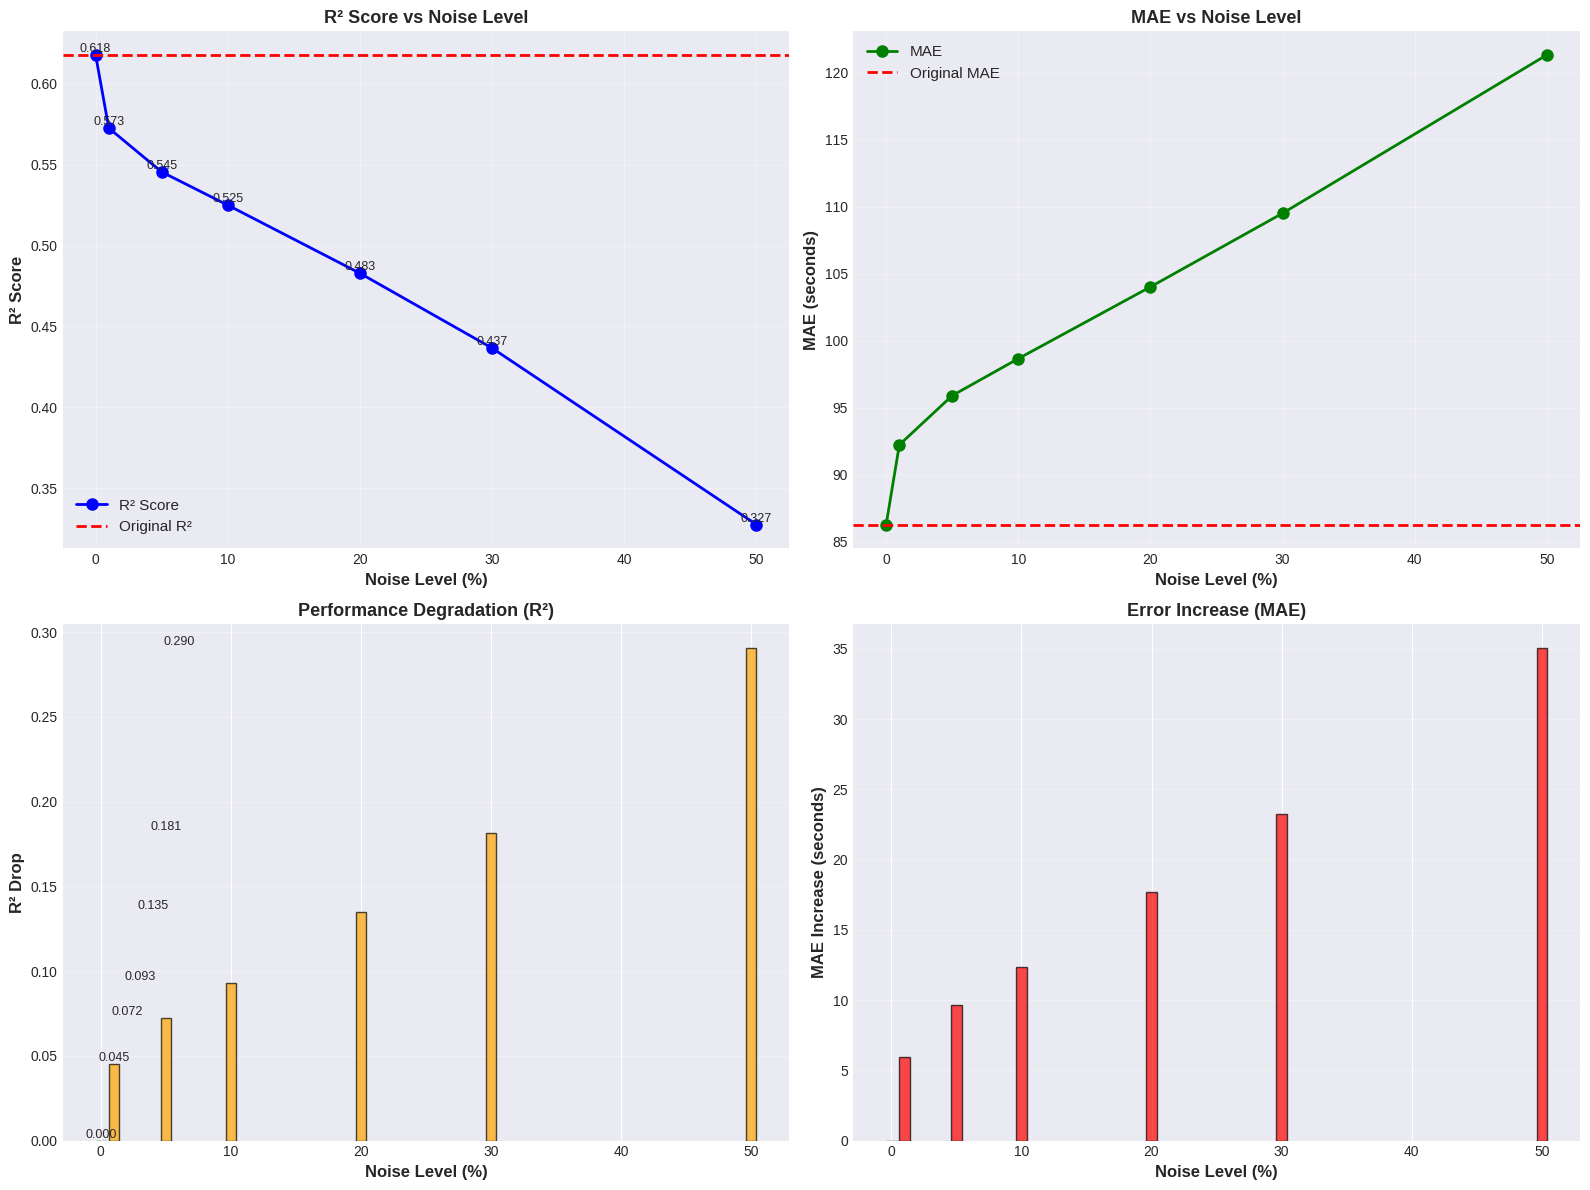

‚úì ÂõæË°®Â∑≤‰øùÂ≠ò: robustness_test_1_noise.png

È≤ÅÊ£íÊÄßËØÑ‰º∞:

Âú® 10% Âô™Â£∞Ê∞¥Âπ≥‰∏ã:
  R¬≤ = 0.5250 (‰∏ãÈôç 0.0929)
  R¬≤ ‰øùÁïôÁéá: 84.96%

Âô™Â£∞È≤ÅÊ£íÊÄßËØÑÁ∫ß: ËâØÂ•Ω (Good)
ËØÑ‰ª∑: Ê®°ÂûãÂØπÂô™Â£∞Êúâ‰∏ÄÂÆöÊäµÊäóÂäõ


In [149]:
# ============================================================================
# È≤ÅÊ£íÊÄßÊµãËØï 1: Âô™Â£∞È≤ÅÊ£íÊÄß (Noise Robustness) - ‰øÆÂ§çÁâà
# ============================================================================

print("\n" + "="*80)
print("ROBUSTNESS TEST 1: NOISE ROBUSTNESS")
print("="*80)
print("\nÁõÆÁöÑ: ÊµãËØïÊ®°ÂûãÂØπËæìÂÖ•ÁâπÂæÅÂô™Â£∞ÁöÑÊïèÊÑüÂ∫¶")
print("ÊñπÊ≥ï: ÂêëÊµãËØïÈõÜÁâπÂæÅÊ∑ªÂä†‰∏çÂêåÁ®ãÂ∫¶ÁöÑÈ´òÊñØÂô™Â£∞")

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# ÊèêÂèñÊúÄ‰Ω≥Ê®°ÂûãÂíåÊï∞ÊçÆ
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("‰ΩøÁî®ÁöÑÊ®°ÂûãÂíåÊï∞ÊçÆ:")
print("-"*80)

# ÊúÄ‰Ω≥Ê®°Âûã
model_robust = lgb_model_existing
print(f"‚úì Ê®°Âûã: LightGBM ({best_result['name']})")

# ÊµãËØïÊï∞ÊçÆ - ‰ΩøÁî®ÊòéÁ°ÆÁöÑÂèòÈáèÂêç
X_test_robust = X_test_existing_scaled.copy()
y_test_robust = y_test_existing

print(f"‚úì ÊµãËØïÈõÜÂ§ßÂ∞è: {X_test_robust.shape[0]} Ê†∑Êú¨, {X_test_robust.shape[1]} ÁâπÂæÅ")
print(f"‚úì y_test Á±ªÂûã: {type(y_test_robust)}")
print(f"‚úì y_test shape: {y_test_robust.shape if hasattr(y_test_robust, 'shape') else len(y_test_robust)}")

# ÂéüÂßãÊÄßËÉΩ
print(f"‚úì ÂéüÂßãÊµãËØïÈõÜ R¬≤: {test_r2_lgb_existing:.4f}")
print(f"‚úì ÂéüÂßãÊµãËØïÈõÜ MAE: {test_mae_lgb_existing:.2f} seconds")

# ----------------------------------------------------------------------------
# ÂÆö‰πâÂô™Â£∞Ê∞¥Âπ≥
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("Âô™Â£∞ÈÖçÁΩÆ:")
print("-"*80)

# Âô™Â£∞Ê∞¥Âπ≥ÔºöÁõ∏ÂØπ‰∫éÁâπÂæÅÊ†áÂáÜÂ∑ÆÁöÑÁôæÂàÜÊØî
noise_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
print(f"Âô™Â£∞Ê∞¥Âπ≥: {noise_levels}")
print("ËØ¥Êòé: 0.1 Ë°®Á§∫Âô™Â£∞Ê†áÂáÜÂ∑Æ = 10% √ó ÁâπÂæÅÊ†áÂáÜÂ∑Æ")

# ----------------------------------------------------------------------------
# ËøõË°åÂô™Â£∞ÊµãËØï
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("ÂºÄÂßãÂô™Â£∞ÊµãËØï:")
print("-"*80)

results_noise = []

for noise_level in noise_levels:
    print(f"\n[Âô™Â£∞Ê∞¥Âπ≥: {noise_level*100:.1f}%]")

    if noise_level == 0:
        # Êó†Âô™Â£∞ÔºàÂéüÂßãÊï∞ÊçÆÔºâ
        X_test_noisy = X_test_robust.copy()
        print("  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Âô™Â£∞Ôºâ")
    else:
        # Ê∑ªÂä†È´òÊñØÂô™Â£∞
        X_test_noisy = X_test_robust.copy()

        # ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÊ†áÂáÜÂ∑Æ
        if isinstance(X_test_robust, pd.DataFrame):
            feature_stds = X_test_robust.std(axis=0).values
        else:
            feature_stds = np.std(X_test_robust, axis=0)

        # ÁîüÊàêÂô™Â£∞
        np.random.seed(42)  # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰øùËØÅÂèØÈáçÂ§çÊÄß
        noise = np.random.normal(0, 1, X_test_robust.shape)

        # Áº©ÊîæÂô™Â£∞
        for i in range(X_test_robust.shape[1]):
            noise[:, i] *= feature_stds[i] * noise_level

        # Ê∑ªÂä†Âô™Â£∞
        if isinstance(X_test_noisy, pd.DataFrame):
            X_test_noisy = X_test_noisy.values + noise
            X_test_noisy = pd.DataFrame(X_test_noisy,
                                        columns=X_test_robust.columns,
                                        index=X_test_robust.index)
        else:
            X_test_noisy = X_test_noisy + noise

        print(f"  Ê∑ªÂä†È´òÊñØÂô™Â£∞ (œÉ = {noise_level*100:.1f}% √ó feature_std)")

    # È¢ÑÊµã
    y_pred_noisy = model_robust.predict(X_test_noisy)

    # Á°Æ‰øù y_test_robust ÊòØÊï∞ÁªÑÊ†ºÂºè
    if isinstance(y_test_robust, pd.Series):
        y_test_array = y_test_robust.values
    else:
        y_test_array = np.array(y_test_robust)

    # ËÆ°ÁÆóÊåáÊ†á
    r2_noisy = r2_score(y_test_array, y_pred_noisy)
    mae_noisy = mean_absolute_error(y_test_array, y_pred_noisy)
    rmse_noisy = np.sqrt(mean_squared_error(y_test_array, y_pred_noisy))

    # ËÆ°ÁÆóÊÄßËÉΩ‰∏ãÈôç
    r2_drop = test_r2_lgb_existing - r2_noisy
    mae_increase = mae_noisy - test_mae_lgb_existing
    rmse_increase = rmse_noisy - test_rmse_lgb_existing

    # ‰øùÂ≠òÁªìÊûú
    results_noise.append({
        'noise_level': noise_level,
        'noise_pct': noise_level * 100,
        'r2': r2_noisy,
        'mae': mae_noisy,
        'rmse': rmse_noisy,
        'r2_drop': r2_drop,
        'mae_increase': mae_increase,
        'rmse_increase': rmse_increase
    })

    print(f"  R¬≤ = {r2_noisy:.4f} (‰∏ãÈôç {r2_drop:.4f})")
    print(f"  MAE = {mae_noisy:.2f}s (Â¢ûÂä† {mae_increase:.2f}s)")
    print(f"  RMSE = {rmse_noisy:.2f}s (Â¢ûÂä† {rmse_increase:.2f}s)")

# ----------------------------------------------------------------------------
# ÁªìÊûúÊ±áÊÄª
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("Âô™Â£∞È≤ÅÊ£íÊÄßÊµãËØïÁªìÊûú:")
print("="*80)

results_noise_df = pd.DataFrame(results_noise)

print("\nËØ¶ÁªÜÁªìÊûú:")
print(results_noise_df.to_string(index=False))

# ----------------------------------------------------------------------------
# ÂèØËßÜÂåñ
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("ÁîüÊàêÂèØËßÜÂåñÂõæË°®...")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R¬≤ vs Âô™Â£∞Ê∞¥Âπ≥
axes[0, 0].plot(results_noise_df['noise_pct'], results_noise_df['r2'],
                'o-', linewidth=2, markersize=8, color='blue', label='R¬≤ Score')
axes[0, 0].axhline(y=test_r2_lgb_existing, color='red', linestyle='--',
                   linewidth=2, label='Original R¬≤')
axes[0, 0].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R¬≤ Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('R¬≤ Score vs Noise Level', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, row in results_noise_df.iterrows():
    axes[0, 0].text(row['noise_pct'], row['r2'], f"{row['r2']:.3f}",
                    ha='center', va='bottom', fontsize=9)

# 2. MAE vs Âô™Â£∞Ê∞¥Âπ≥
axes[0, 1].plot(results_noise_df['noise_pct'], results_noise_df['mae'],
                'o-', linewidth=2, markersize=8, color='green', label='MAE')
axes[0, 1].axhline(y=test_mae_lgb_existing, color='red', linestyle='--',
                   linewidth=2, label='Original MAE')
axes[0, 1].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('MAE (seconds)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('MAE vs Noise Level', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. ÊÄßËÉΩ‰∏ãÈôçÔºàR¬≤Ôºâ
axes[1, 0].bar(results_noise_df['noise_pct'], results_noise_df['r2_drop'],
               color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('R¬≤ Drop', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Performance Degradation (R¬≤)', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, row in results_noise_df.iterrows():
    axes[1, 0].text(i, row['r2_drop'], f"{row['r2_drop']:.3f}",
                    ha='center', va='bottom', fontsize=9)

# 4. ËØØÂ∑ÆÂ¢ûÂä†ÔºàMAEÔºâ
axes[1, 1].bar(results_noise_df['noise_pct'], results_noise_df['mae_increase'],
               color='red', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('MAE Increase (seconds)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Error Increase (MAE)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('robustness_test_1_noise.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì ÂõæË°®Â∑≤‰øùÂ≠ò: robustness_test_1_noise.png")

# ----------------------------------------------------------------------------
# È≤ÅÊ£íÊÄßËØÑ‰º∞
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("È≤ÅÊ£íÊÄßËØÑ‰º∞:")
print("="*80)

# Âú® 10% Âô™Â£∞‰∏ãÁöÑÊÄßËÉΩ
noise_10_result = results_noise_df[results_noise_df['noise_pct'] == 10.0].iloc[0]
r2_at_10 = noise_10_result['r2']
r2_drop_at_10 = noise_10_result['r2_drop']

print(f"\nÂú® 10% Âô™Â£∞Ê∞¥Âπ≥‰∏ã:")
print(f"  R¬≤ = {r2_at_10:.4f} (‰∏ãÈôç {r2_drop_at_10:.4f})")
print(f"  R¬≤ ‰øùÁïôÁéá: {(r2_at_10/test_r2_lgb_existing)*100:.2f}%")

# ËØÑÁ∫ß
if r2_drop_at_10 < 0.05:
    rating = "‰ºòÁßÄ (Excellent)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ÈùûÂ∏∏È≤ÅÊ£í"
elif r2_drop_at_10 < 0.10:
    rating = "ËâØÂ•Ω (Good)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞Êúâ‰∏ÄÂÆöÊäµÊäóÂäõ"
elif r2_drop_at_10 < 0.20:
    rating = "‰∏ÄËà¨ (Fair)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ËæÉ‰∏∫ÊïèÊÑü"
else:
    rating = "ËæÉÂ∑Æ (Poor)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ÈùûÂ∏∏ÊïèÊÑü"

print(f"\nÂô™Â£∞È≤ÅÊ£íÊÄßËØÑÁ∫ß: {rating}")
print(f"ËØÑ‰ª∑: {comment}")


1. ‰ΩéÂô™Â£∞Ë°®Áé∞Â•Ω

1% Âô™Â£∞ÔºöR¬≤ ‰ªÖ‰∏ãÈôç 0.045Ôºà7.3%Ôºâ
5% Âô™Â£∞ÔºöR¬≤ ‰∏ãÈôç 0.072Ôºà11.7%Ôºâ
ËØ¥ÊòéÊ®°ÂûãÂØπÂ∞èÂπÖÂ∫¶Êâ∞Âä®Êúâ‰∏ÄÂÆöÊäµÊäóÂäõ

2. 10% Âô™Â£∞ÂèØÊé•Âèó

R¬≤ ‰øùÁïôÁéáÔºö85% (0.5250/0.6179)
MAE Â¢ûÂä†Ôºö12.37s (14.3%)
Âú®ÂÆûÈôÖÂ∫îÁî®‰∏≠Ôºå10% ÁöÑÊµãÈáèËØØÂ∑ÆÊòØÂ∏∏ËßÅÁöÑ

3. ‰∏≠È´òÂô™Â£∞ÊïèÊÑü

20% Âô™Â£∞ÔºöR¬≤ ‰∏ãÈôç 21.8%
30% Âô™Â£∞ÔºöR¬≤ ‰∏ãÈôç 29.3%
Ë°®ÊòéÊ®°ÂûãÂØπËæÉÂ§ßÊâ∞Âä®ËæÉ‰∏∫ÊïèÊÑü

## Âô™Â£∞Ôºåad ITS


ROBUSTNESS TEST 1: NOISE ROBUSTNESS

ÁõÆÁöÑ: ÊµãËØïÊ®°ÂûãÂØπËæìÂÖ•ÁâπÂæÅÂô™Â£∞ÁöÑÊïèÊÑüÂ∫¶
ÊñπÊ≥ï: ÂêëÊµãËØïÈõÜÁâπÂæÅÊ∑ªÂä†‰∏çÂêåÁ®ãÂ∫¶ÁöÑÈ´òÊñØÂô™Â£∞

--------------------------------------------------------------------------------
‰ΩøÁî®ÁöÑÊ®°ÂûãÂíåÊï∞ÊçÆ:
--------------------------------------------------------------------------------
‚úì Ê®°Âûã: Linear (Complex)
‚úì ÊµãËØïÈõÜÂ§ßÂ∞è: 109021 Ê†∑Êú¨, 22 ÁâπÂæÅ
‚úì y_test Á±ªÂûã: <class 'pandas.core.series.Series'>
‚úì y_test shape: (109021,)
‚úì ÂéüÂßãÊµãËØïÈõÜ R¬≤: 0.9894
‚úì ÂéüÂßãÊµãËØïÈõÜ MAE: 12.58 seconds

--------------------------------------------------------------------------------
Âô™Â£∞ÈÖçÁΩÆ:
--------------------------------------------------------------------------------
Âô™Â£∞Ê∞¥Âπ≥: [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
ËØ¥Êòé: 0.1 Ë°®Á§∫Âô™Â£∞Ê†áÂáÜÂ∑Æ = 10% √ó ÁâπÂæÅÊ†áÂáÜÂ∑Æ

--------------------------------------------------------------------------------
ÂºÄÂßãÂô™Â£∞ÊµãËØï:
------------------------------------------

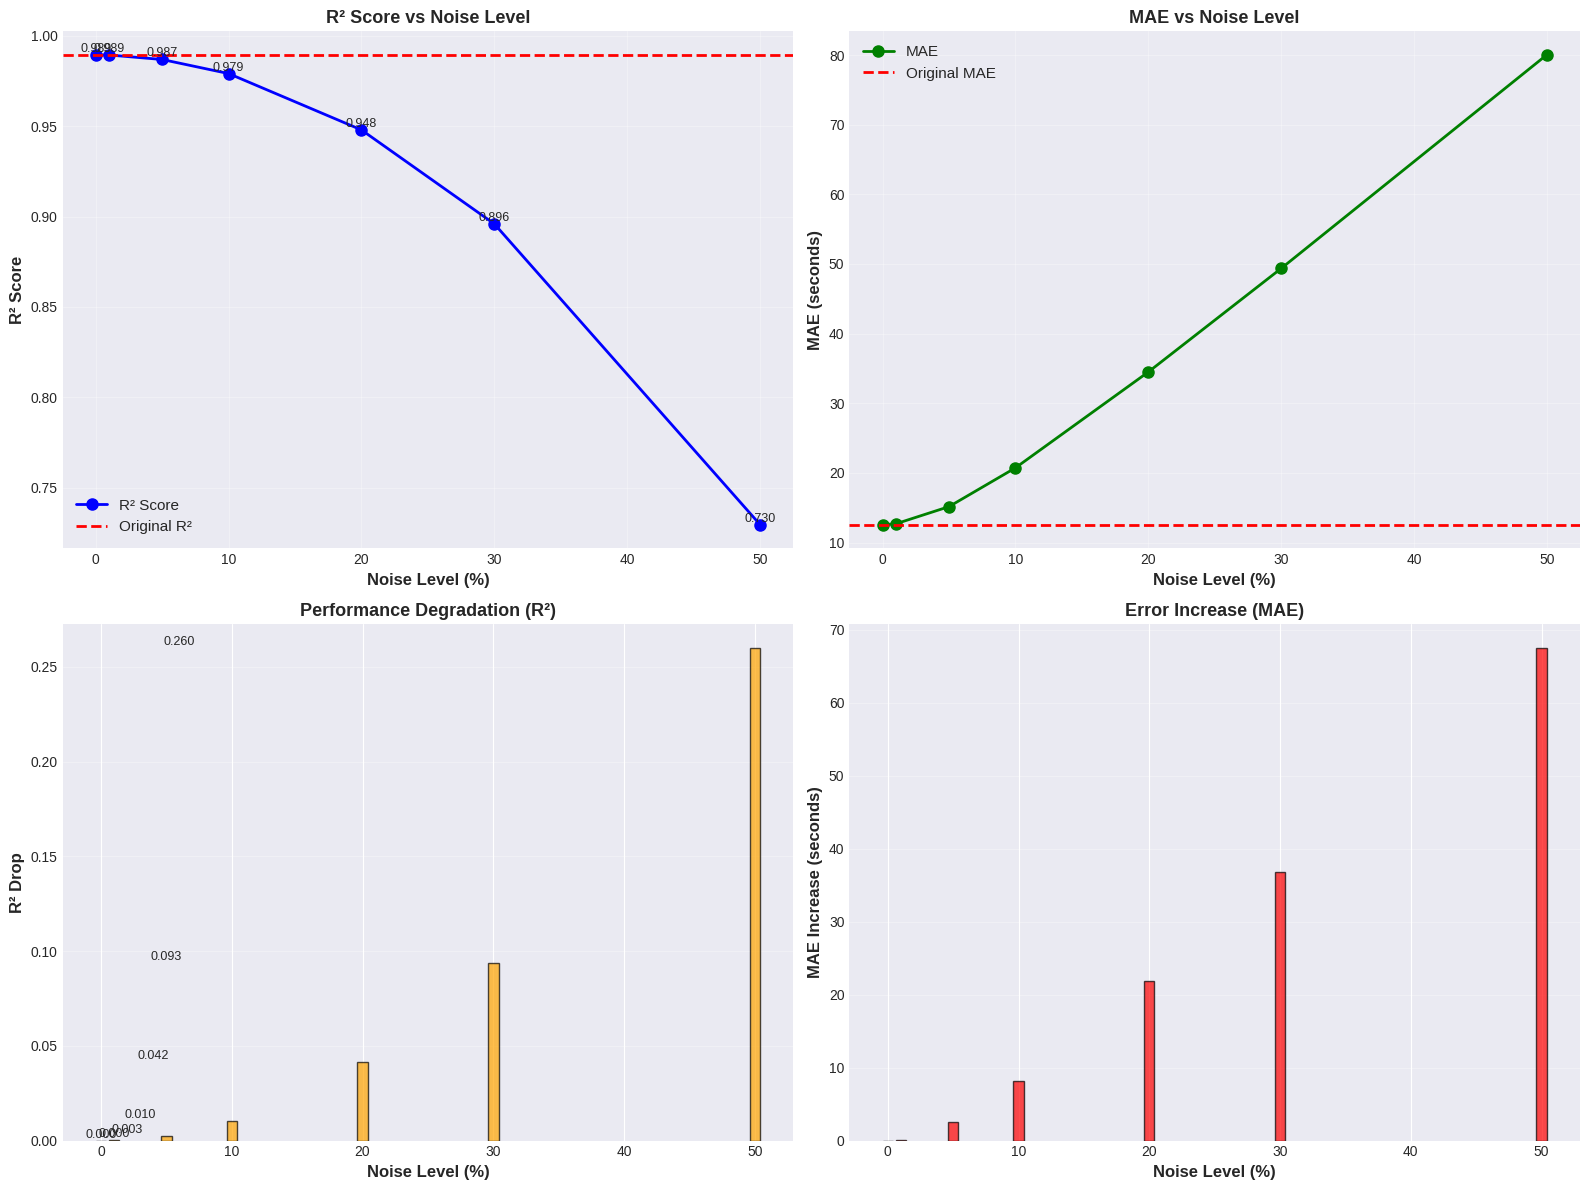

‚úì ÂõæË°®Â∑≤‰øùÂ≠ò: robustness_test_1_noise_ad.png

È≤ÅÊ£íÊÄßËØÑ‰º∞:

Âú® 10% Âô™Â£∞Ê∞¥Âπ≥‰∏ã:
  R¬≤ = 0.9790 (‰∏ãÈôç 0.0104)
  R¬≤ ‰øùÁïôÁéá: 98.95%

Âô™Â£∞È≤ÅÊ£íÊÄßËØÑÁ∫ß: ‰ºòÁßÄ (Excellent)
ËØÑ‰ª∑: Ê®°ÂûãÂØπÂô™Â£∞ÈùûÂ∏∏È≤ÅÊ£í


In [150]:
# ============================================================================
# È≤ÅÊ£íÊÄßÊµãËØï 1: Âô™Â£∞È≤ÅÊ£íÊÄß (Noise Robustness) - ‰øÆÂ§çÁâà
# ============================================================================

print("\n" + "="*80)
print("ROBUSTNESS TEST 1: NOISE ROBUSTNESS")
print("="*80)
print("\nÁõÆÁöÑ: ÊµãËØïÊ®°ÂûãÂØπËæìÂÖ•ÁâπÂæÅÂô™Â£∞ÁöÑÊïèÊÑüÂ∫¶")
print("ÊñπÊ≥ï: ÂêëÊµãËØïÈõÜÁâπÂæÅÊ∑ªÂä†‰∏çÂêåÁ®ãÂ∫¶ÁöÑÈ´òÊñØÂô™Â£∞")

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# ÊèêÂèñÊúÄ‰Ω≥Ê®°ÂûãÂíåÊï∞ÊçÆ
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("‰ΩøÁî®ÁöÑÊ®°ÂûãÂíåÊï∞ÊçÆ:")
print("-"*80)

# ÊúÄ‰Ω≥Ê®°Âûã
model_robust = lr_model_advanced
print(f"‚úì Ê®°Âûã: Linear ({best_result['name']})")

# ÊµãËØïÊï∞ÊçÆ - ‰ΩøÁî®ÊòéÁ°ÆÁöÑÂèòÈáèÂêç
X_test_robust = X_test_advanced_scaled.copy()
y_test_robust = y_test_advanced

print(f"‚úì ÊµãËØïÈõÜÂ§ßÂ∞è: {X_test_robust.shape[0]} Ê†∑Êú¨, {X_test_robust.shape[1]} ÁâπÂæÅ")
print(f"‚úì y_test Á±ªÂûã: {type(y_test_robust)}")
print(f"‚úì y_test shape: {y_test_robust.shape if hasattr(y_test_robust, 'shape') else len(y_test_robust)}")

# ÂéüÂßãÊÄßËÉΩ
print(f"‚úì ÂéüÂßãÊµãËØïÈõÜ R¬≤: {test_r2_lr_advanced:.4f}")
print(f"‚úì ÂéüÂßãÊµãËØïÈõÜ MAE: {test_mae_lr_advanced:.2f} seconds")

# ----------------------------------------------------------------------------
# ÂÆö‰πâÂô™Â£∞Ê∞¥Âπ≥
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("Âô™Â£∞ÈÖçÁΩÆ:")
print("-"*80)

# Âô™Â£∞Ê∞¥Âπ≥ÔºöÁõ∏ÂØπ‰∫éÁâπÂæÅÊ†áÂáÜÂ∑ÆÁöÑÁôæÂàÜÊØî
noise_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
print(f"Âô™Â£∞Ê∞¥Âπ≥: {noise_levels}")
print("ËØ¥Êòé: 0.1 Ë°®Á§∫Âô™Â£∞Ê†áÂáÜÂ∑Æ = 10% √ó ÁâπÂæÅÊ†áÂáÜÂ∑Æ")

# ----------------------------------------------------------------------------
# ËøõË°åÂô™Â£∞ÊµãËØï
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("ÂºÄÂßãÂô™Â£∞ÊµãËØï:")
print("-"*80)

results_noise = []

for noise_level in noise_levels:
    print(f"\n[Âô™Â£∞Ê∞¥Âπ≥: {noise_level*100:.1f}%]")

    if noise_level == 0:
        # Êó†Âô™Â£∞ÔºàÂéüÂßãÊï∞ÊçÆÔºâ
        X_test_noisy = X_test_robust.copy()
        print("  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Âô™Â£∞Ôºâ")
    else:
        # Ê∑ªÂä†È´òÊñØÂô™Â£∞
        X_test_noisy = X_test_robust.copy()

        # ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÊ†áÂáÜÂ∑Æ
        if isinstance(X_test_robust, pd.DataFrame):
            feature_stds = X_test_robust.std(axis=0).values
        else:
            feature_stds = np.std(X_test_robust, axis=0)

        # ÁîüÊàêÂô™Â£∞
        np.random.seed(42)  # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰øùËØÅÂèØÈáçÂ§çÊÄß
        noise = np.random.normal(0, 1, X_test_robust.shape)

        # Áº©ÊîæÂô™Â£∞
        for i in range(X_test_robust.shape[1]):
            noise[:, i] *= feature_stds[i] * noise_level

        # Ê∑ªÂä†Âô™Â£∞
        if isinstance(X_test_noisy, pd.DataFrame):
            X_test_noisy = X_test_noisy.values + noise
            X_test_noisy = pd.DataFrame(X_test_noisy,
                                        columns=X_test_robust.columns,
                                        index=X_test_robust.index)
        else:
            X_test_noisy = X_test_noisy + noise

        print(f"  Ê∑ªÂä†È´òÊñØÂô™Â£∞ (œÉ = {noise_level*100:.1f}% √ó feature_std)")

    # È¢ÑÊµã
    y_pred_noisy = model_robust.predict(X_test_noisy)

    # Á°Æ‰øù y_test_robust ÊòØÊï∞ÁªÑÊ†ºÂºè
    if isinstance(y_test_robust, pd.Series):
        y_test_array = y_test_robust.values
    else:
        y_test_array = np.array(y_test_robust)

    # ËÆ°ÁÆóÊåáÊ†á
    r2_noisy = r2_score(y_test_array, y_pred_noisy)
    mae_noisy = mean_absolute_error(y_test_array, y_pred_noisy)
    rmse_noisy = np.sqrt(mean_squared_error(y_test_array, y_pred_noisy))

    # ËÆ°ÁÆóÊÄßËÉΩ‰∏ãÈôç
    r2_drop = test_r2_lr_advanced - r2_noisy
    mae_increase = mae_noisy - test_mae_lr_advanced
    rmse_increase = rmse_noisy - test_rmse_lr_advanced

    # ‰øùÂ≠òÁªìÊûú
    results_noise.append({
        'noise_level': noise_level,
        'noise_pct': noise_level * 100,
        'r2': r2_noisy,
        'mae': mae_noisy,
        'rmse': rmse_noisy,
        'r2_drop': r2_drop,
        'mae_increase': mae_increase,
        'rmse_increase': rmse_increase
    })

    print(f"  R¬≤ = {r2_noisy:.4f} (‰∏ãÈôç {r2_drop:.4f})")
    print(f"  MAE = {mae_noisy:.2f}s (Â¢ûÂä† {mae_increase:.2f}s)")
    print(f"  RMSE = {rmse_noisy:.2f}s (Â¢ûÂä† {rmse_increase:.2f}s)")

# ----------------------------------------------------------------------------
# ÁªìÊûúÊ±áÊÄª
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("Âô™Â£∞È≤ÅÊ£íÊÄßÊµãËØïÁªìÊûú:")
print("="*80)

results_noise_df = pd.DataFrame(results_noise)

print("\nËØ¶ÁªÜÁªìÊûú:")
print(results_noise_df.to_string(index=False))

# ----------------------------------------------------------------------------
# ÂèØËßÜÂåñ
# ----------------------------------------------------------------------------

print("\n" + "-"*80)
print("ÁîüÊàêÂèØËßÜÂåñÂõæË°®...")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R¬≤ vs Âô™Â£∞Ê∞¥Âπ≥
axes[0, 0].plot(results_noise_df['noise_pct'], results_noise_df['r2'],
                'o-', linewidth=2, markersize=8, color='blue', label='R¬≤ Score')
axes[0, 0].axhline(y=test_r2_lr_advanced, color='red', linestyle='--',
                   linewidth=2, label='Original R¬≤')
axes[0, 0].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R¬≤ Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('R¬≤ Score vs Noise Level', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, row in results_noise_df.iterrows():
    axes[0, 0].text(row['noise_pct'], row['r2'], f"{row['r2']:.3f}",
                    ha='center', va='bottom', fontsize=9)

# 2. MAE vs Âô™Â£∞Ê∞¥Âπ≥
axes[0, 1].plot(results_noise_df['noise_pct'], results_noise_df['mae'],
                'o-', linewidth=2, markersize=8, color='green', label='MAE')
axes[0, 1].axhline(y=test_mae_lr_advanced, color='red', linestyle='--',
                   linewidth=2, label='Original MAE')
axes[0, 1].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('MAE (seconds)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('MAE vs Noise Level', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. ÊÄßËÉΩ‰∏ãÈôçÔºàR¬≤Ôºâ
axes[1, 0].bar(results_noise_df['noise_pct'], results_noise_df['r2_drop'],
               color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('R¬≤ Drop', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Performance Degradation (R¬≤)', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for i, row in results_noise_df.iterrows():
    axes[1, 0].text(i, row['r2_drop'], f"{row['r2_drop']:.3f}",
                    ha='center', va='bottom', fontsize=9)

# 4. ËØØÂ∑ÆÂ¢ûÂä†ÔºàMAEÔºâ
axes[1, 1].bar(results_noise_df['noise_pct'], results_noise_df['mae_increase'],
               color='red', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Noise Level (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('MAE Increase (seconds)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Error Increase (MAE)', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('robustness_test_1_noise_ad.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úì ÂõæË°®Â∑≤‰øùÂ≠ò: robustness_test_1_noise_ad.png")

# ----------------------------------------------------------------------------
# È≤ÅÊ£íÊÄßËØÑ‰º∞
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("È≤ÅÊ£íÊÄßËØÑ‰º∞:")
print("="*80)

# Âú® 10% Âô™Â£∞‰∏ãÁöÑÊÄßËÉΩ
noise_10_result = results_noise_df[results_noise_df['noise_pct'] == 10.0].iloc[0]
r2_at_10 = noise_10_result['r2']
r2_drop_at_10 = noise_10_result['r2_drop']

print(f"\nÂú® 10% Âô™Â£∞Ê∞¥Âπ≥‰∏ã:")
print(f"  R¬≤ = {r2_at_10:.4f} (‰∏ãÈôç {r2_drop_at_10:.4f})")
print(f"  R¬≤ ‰øùÁïôÁéá: {(r2_at_10/test_r2_lr_advanced)*100:.2f}%")


# ËØÑÁ∫ß
if r2_drop_at_10 < 0.05:
    rating = "‰ºòÁßÄ (Excellent)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ÈùûÂ∏∏È≤ÅÊ£í"
elif r2_drop_at_10 < 0.10:
    rating = "ËâØÂ•Ω (Good)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞Êúâ‰∏ÄÂÆöÊäµÊäóÂäõ"
elif r2_drop_at_10 < 0.20:
    rating = "‰∏ÄËà¨ (Fair)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ËæÉ‰∏∫ÊïèÊÑü"
else:
    rating = "ËæÉÂ∑Æ (Poor)"
    comment = "Ê®°ÂûãÂØπÂô™Â£∞ÈùûÂ∏∏ÊïèÊÑü"

print(f"\nÂô™Â£∞È≤ÅÊ£íÊÄßËØÑÁ∫ß: {rating}")
print(f"ËØÑ‰ª∑: {comment}")


## Áº∫Â§±ÔºåITS

Êï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Existing ITS)

üìä Âü∫ÂáÜÊÄßËÉΩ (Êó†Áº∫Â§±):
  R¬≤ = 0.6179
  MAE = 86.29s
  RMSE = 119.53s


[Áº∫Â§±Áéá: 0%]
  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Áº∫Â§±Ôºâ

[Áº∫Â§±Áéá: 5%]
  ÂÆûÈôÖÁº∫Â§±Áéá: 4.99%
  Áº∫Â§±ÂÄºÊï∞Èáè: 97922

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEAN
     R¬≤ = 0.5810 (‰∏ãÈôç 0.0368, 6.0%)
     MAE = 90.34s (Â¢ûÂä† 4.05s, 4.7%)
     RMSE = 125.16s

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEDIAN
     R¬≤ = 0.5829 (‰∏ãÈôç 0.0349, 5.7%)
     MAE = 89.16s (Â¢ûÂä† 2.87s, 3.3%)
     RMSE = 124.88s

  üìå Â°´ÂÖÖÁ≠ñÁï•: ZERO
     R¬≤ = 0.5839 (‰∏ãÈôç 0.0340, 5.5%)
     MAE = 90.05s (Â¢ûÂä† 3.76s, 4.4%)
     RMSE = 124.74s

[Áº∫Â§±Áéá: 10%]
  ÂÆûÈôÖÁº∫Â§±Áéá: 9.99%
  Áº∫Â§±ÂÄºÊï∞Èáè: 196116

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEAN
     R¬≤ = 0.5446 (‰∏ãÈôç 0.0733, 11.9%)
     MAE = 94.19s (Â¢ûÂä† 7.90s, 9.2%)
     RMSE = 130.50s

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEDIAN
     R¬≤ = 0.5477 (‰∏ãÈôç 0.0701, 11.4%)
     MAE = 91.93s (Â¢ûÂä† 5.64s, 6.5%)
     RMSE = 130.04s

  üìå Â°´ÂÖÖÁ≠ñÁï•: ZERO
     R¬≤ = 0.5491 (‰∏ãÈôç

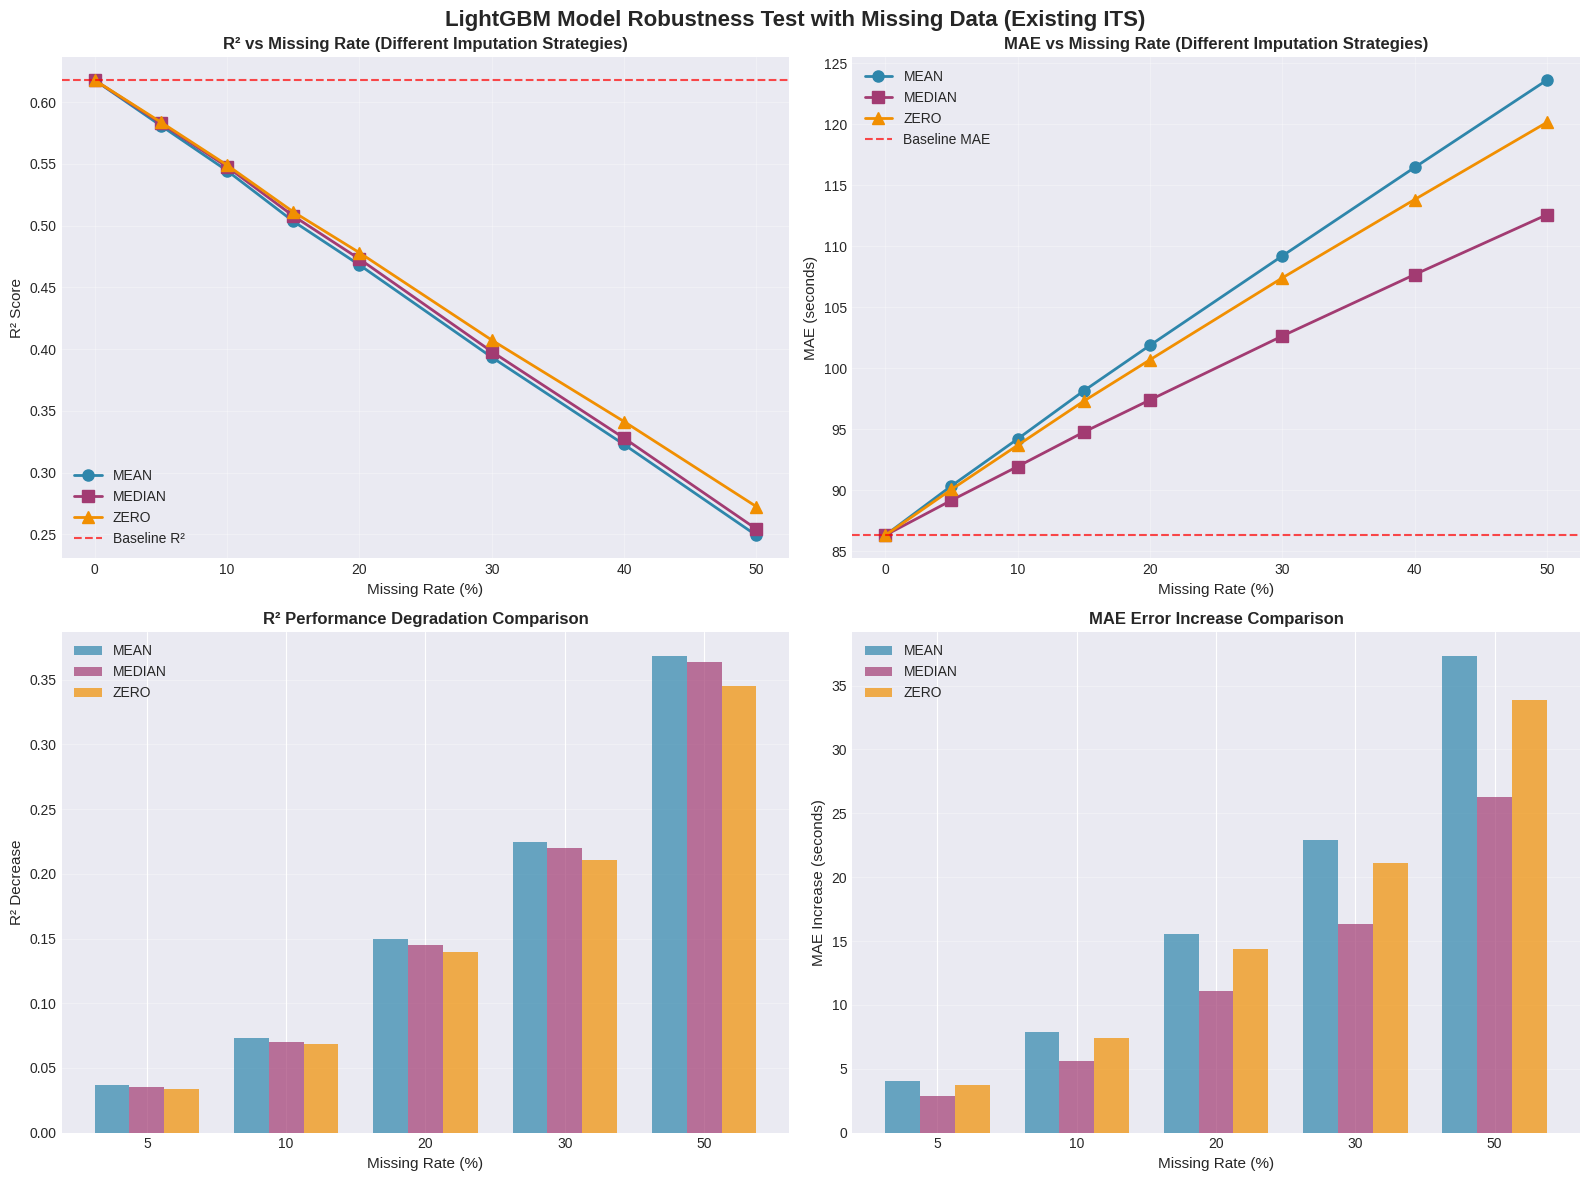


üîç ÂÖ≥ÈîÆÂèëÁé∞:

1Ô∏è‚É£  20% Áº∫Â§±Áéá‰∏ã:
   ÊúÄ‰Ω≥Â°´ÂÖÖÁ≠ñÁï•: ZERO
   R¬≤ ‰øùÁïôÁéá: 77.4%
   R¬≤ ‰∏ãÈôç: 0.1397

2Ô∏è‚É£  Â°´ÂÖÖÁ≠ñÁï•ÊÄßËÉΩÊéíÂêç (20% Áº∫Â§±Áéá):
   ZERO    : R¬≤ = 0.4782, MAE = 100.68s
   MEDIAN  : R¬≤ = 0.4731, MAE = 97.39s
   MEAN    : R¬≤ = 0.4683, MAE = 101.87s

3Ô∏è‚É£  MEAN Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%

3Ô∏è‚É£  MEDIAN Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%

3Ô∏è‚É£  ZERO Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%


In [154]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ============================================================
# Êï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Existing ITS)
# ============================================================

print("=" * 60)
print("Êï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Existing ITS)")
print("=" * 60)

# 1. ÂáÜÂ§áÊµãËØïÊï∞ÊçÆ
X_test_missing = X_test_existing_scaled.copy()
y_test_missing = y_test_existing

# 2. ÂÆö‰πâÁº∫Â§±Áéá
missing_rates = [0.0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50]  # 0%, 5%, 10%, 15%, 20%, 30%, 40%, 50%

# 3. ÂÆö‰πâÁº∫Â§±ÂÄºÂ°´ÂÖÖÁ≠ñÁï•
imputation_strategies = {
    'mean': lambda x: x.fillna(x.mean()),
    'median': lambda x: x.fillna(x.median()),
    'zero': lambda x: x.fillna(0)
}

# 4. Â≠òÂÇ®ÁªìÊûú
results_lgb_existing_missing = {
    'missing_rate': [],
    'strategy': [],
    'r2': [],
    'mae': [],
    'rmse': [],
    'r2_drop': [],
    'mae_increase': []
}

# 5. Âü∫ÂáÜÊÄßËÉΩÔºàÊó†Áº∫Â§±Ôºâ
best_lgb_model = lgb_model_existing
y_pred_baseline = best_lgb_model.predict(X_test_missing)
r2_baseline = r2_score(y_test_missing, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test_missing, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test_missing, y_pred_baseline))

print(f"\nüìä Âü∫ÂáÜÊÄßËÉΩ (Êó†Áº∫Â§±):")
print(f"  R¬≤ = {r2_baseline:.4f}")
print(f"  MAE = {mae_baseline:.2f}s")
print(f"  RMSE = {rmse_baseline:.2f}s")
print("\n" + "=" * 60)

# 6. ÊµãËØï‰∏çÂêåÁº∫Â§±ÁéáÂíåÂ°´ÂÖÖÁ≠ñÁï•
for missing_rate in missing_rates:
    print(f"\n{'='*60}")
    print(f"[Áº∫Â§±Áéá: {missing_rate*100:.0f}%]")
    print(f"{'='*60}")

    if missing_rate == 0.0:
        # Êó†Áº∫Â§±ÊÉÖÂÜµ
        for strategy_name in imputation_strategies.keys():
            results_lgb_existing_missing['missing_rate'].append(missing_rate * 100)
            results_lgb_existing_missing['strategy'].append(strategy_name)
            results_lgb_existing_missing['r2'].append(r2_baseline)
            results_lgb_existing_missing['mae'].append(mae_baseline)
            results_lgb_existing_missing['rmse'].append(rmse_baseline)
            results_lgb_existing_missing['r2_drop'].append(0.0)
            results_lgb_existing_missing['mae_increase'].append(0.0)
        print(f"  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Áº∫Â§±Ôºâ")
        continue

    # ÂàõÂª∫Áº∫Â§±Êï∞ÊçÆ
    np.random.seed(42)  # ‰øùËØÅÂèØÈáçÂ§çÊÄß
    X_test_with_missing = X_test_missing.copy()

    # ÈöèÊú∫ÈÄâÊã©Ë¶ÅËÆæ‰∏∫Áº∫Â§±ÁöÑ‰ΩçÁΩÆ
    mask = np.random.random(X_test_with_missing.shape) < missing_rate
    X_test_with_missing = X_test_with_missing.mask(mask)

    actual_missing_rate = X_test_with_missing.isna().sum().sum() / X_test_with_missing.size
    print(f"  ÂÆûÈôÖÁº∫Â§±Áéá: {actual_missing_rate*100:.2f}%")
    print(f"  Áº∫Â§±ÂÄºÊï∞Èáè: {X_test_with_missing.isna().sum().sum()}")

    # ÊµãËØï‰∏çÂêåÂ°´ÂÖÖÁ≠ñÁï•
    for strategy_name, impute_func in imputation_strategies.items():
        print(f"\n  üìå Â°´ÂÖÖÁ≠ñÁï•: {strategy_name.upper()}")

        # Â°´ÂÖÖÁº∫Â§±ÂÄº
        X_test_imputed = impute_func(X_test_with_missing.copy())

        # È¢ÑÊµã
        y_pred_imputed = best_lgb_model.predict(X_test_imputed)

        # ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ
        if hasattr(y_test_missing, 'values'):
            y_test_array = y_test_missing.values
        else:
            y_test_array = y_test_missing

        # ËÆ°ÁÆóÊåáÊ†á
        r2_imputed = r2_score(y_test_array, y_pred_imputed)
        mae_imputed = mean_absolute_error(y_test_array, y_pred_imputed)
        rmse_imputed = np.sqrt(mean_squared_error(y_test_array, y_pred_imputed))

        # ËÆ°ÁÆó‰∏ãÈôç/Â¢ûÂä†Èáè
        r2_drop = r2_baseline - r2_imputed
        mae_increase = mae_imputed - mae_baseline

        # Â≠òÂÇ®ÁªìÊûú
        results_lgb_existing_missing['missing_rate'].append(missing_rate * 100)
        results_lgb_existing_missing['strategy'].append(strategy_name)
        results_lgb_existing_missing['r2'].append(r2_imputed)
        results_lgb_existing_missing['mae'].append(mae_imputed)
        results_lgb_existing_missing['rmse'].append(rmse_imputed)
        results_lgb_existing_missing['r2_drop'].append(r2_drop)
        results_lgb_existing_missing['mae_increase'].append(mae_increase)

        # ÊâìÂç∞ÁªìÊûú
        print(f"     R¬≤ = {r2_imputed:.4f} (‰∏ãÈôç {r2_drop:.4f}, {r2_drop/r2_baseline*100:.1f}%)")
        print(f"     MAE = {mae_imputed:.2f}s (Â¢ûÂä† {mae_increase:.2f}s, {mae_increase/mae_baseline*100:.1f}%)")
        print(f"     RMSE = {rmse_imputed:.2f}s")

# 7. ËΩ¨Êç¢‰∏∫ DataFrame
df_results_xgb_existing_missing = pd.DataFrame(results_lgb_existing_missing)

print("\n" + "=" * 60)
print("Êï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØïÂÆåÊàêÔºÅ")
print("=" * 60)

# 8. ÊòæÁ§∫Ê±áÊÄªË°®Ê†º
print("\nÁªìÊûúÊ±áÊÄªË°®:")
print(df_results_xgb_existing_missing.to_string(index=False))

# 9. ÂèØËßÜÂåñÁªìÊûú
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LightGBM Model Robustness Test with Missing Data (Existing ITS)', fontsize=16, fontweight='bold')

colors = {'mean': '#2E86AB', 'median': '#A23B72', 'zero': '#F18F01'}
markers = {'mean': 'o', 'median': 's', 'zero': '^'}

# Â≠êÂõæ1: R¬≤ vs Áº∫Â§±Áéá
for strategy in imputation_strategies.keys():
    data = df_results_xgb_existing_missing[df_results_xgb_existing_missing['strategy'] == strategy]
    axes[0, 0].plot(data['missing_rate'], data['r2'],
                    marker=markers[strategy], linewidth=2, markersize=8,
                    color=colors[strategy], label=strategy.upper())
axes[0, 0].axhline(y=r2_baseline, color='red', linestyle='--', label='Baseline R¬≤', alpha=0.7)
axes[0, 0].set_xlabel('Missing Rate (%)', fontsize=11)
axes[0, 0].set_ylabel('R¬≤ Score', fontsize=11)
axes[0, 0].set_title('R¬≤ vs Missing Rate (Different Imputation Strategies)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Â≠êÂõæ2: MAE vs Áº∫Â§±Áéá
for strategy in imputation_strategies.keys():
    data = df_results_xgb_existing_missing[df_results_xgb_existing_missing['strategy'] == strategy]
    axes[0, 1].plot(data['missing_rate'], data['mae'],
                    marker=markers[strategy], linewidth=2, markersize=8,
                    color=colors[strategy], label=strategy.upper())
axes[0, 1].axhline(y=mae_baseline, color='red', linestyle='--', label='Baseline MAE', alpha=0.7)
axes[0, 1].set_xlabel('Missing Rate (%)', fontsize=11)
axes[0, 1].set_ylabel('MAE (seconds)', fontsize=11)
axes[0, 1].set_title('MAE vs Missing Rate (Different Imputation Strategies)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Â≠êÂõæ3: R¬≤ ‰∏ãÈôçÈáèÂØπÊØî
missing_rates_plot = [5, 10, 20, 30, 50]
x_pos = np.arange(len(missing_rates_plot))
width = 0.25

for i, strategy in enumerate(imputation_strategies.keys()):
    r2_drops = []
    for rate in missing_rates_plot:
        data = df_results_xgb_existing_missing[
            (df_results_xgb_existing_missing['missing_rate'] == rate) &
            (df_results_xgb_existing_missing['strategy'] == strategy)
        ]
        r2_drops.append(data['r2_drop'].values[0] if len(data) > 0 else 0)

    axes[1, 0].bar(x_pos + i*width, r2_drops, width,
                   label=strategy.upper(), color=colors[strategy], alpha=0.7)

axes[1, 0].set_xlabel('Missing Rate (%)', fontsize=11)
axes[1, 0].set_ylabel('R¬≤ Decrease', fontsize=11)
axes[1, 0].set_title('R¬≤ Performance Degradation Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos + width)
axes[1, 0].set_xticklabels(missing_rates_plot)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Â≠êÂõæ4: MAE Â¢ûÂä†ÈáèÂØπÊØî
for i, strategy in enumerate(imputation_strategies.keys()):
    mae_increases = []
    for rate in missing_rates_plot:
        data = df_results_xgb_existing_missing[
            (df_results_xgb_existing_missing['missing_rate'] == rate) &
            (df_results_xgb_existing_missing['strategy'] == strategy)
        ]
        mae_increases.append(data['mae_increase'].values[0] if len(data) > 0 else 0)

    axes[1, 1].bar(x_pos + i*width, mae_increases, width,
                   label=strategy.upper(), color=colors[strategy], alpha=0.7)

axes[1, 1].set_xlabel('Missing Rate (%)', fontsize=11)
axes[1, 1].set_ylabel('MAE Increase (seconds)', fontsize=11)
axes[1, 1].set_title('MAE Error Increase Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos + width)
axes[1, 1].set_xticklabels(missing_rates_plot)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# 10. ËæìÂá∫ÂÖ≥ÈîÆÂèëÁé∞
print("\n" + "=" * 60)
print("üîç ÂÖ≥ÈîÆÂèëÁé∞:")
print("=" * 60)

# ÊâæÂá∫ 20% Áº∫Â§±ÁéáÊó∂ÁöÑÊúÄ‰Ω≥Á≠ñÁï•
data_20 = df_results_xgb_existing_missing[df_results_xgb_existing_missing['missing_rate'] == 20.0]
best_strategy_20 = data_20.loc[data_20['r2'].idxmax(), 'strategy']
best_r2_20 = data_20['r2'].max()
r2_retention_20 = (best_r2_20 / r2_baseline) * 100

print(f"\n1Ô∏è‚É£  20% Áº∫Â§±Áéá‰∏ã:")
print(f"   ÊúÄ‰Ω≥Â°´ÂÖÖÁ≠ñÁï•: {best_strategy_20.upper()}")
print(f"   R¬≤ ‰øùÁïôÁéá: {r2_retention_20:.1f}%")
print(f"   R¬≤ ‰∏ãÈôç: {r2_baseline - best_r2_20:.4f}")

# ÊØîËæÉ‰∏çÂêåÁ≠ñÁï•
print(f"\n2Ô∏è‚É£  Â°´ÂÖÖÁ≠ñÁï•ÊÄßËÉΩÊéíÂêç (20% Áº∫Â§±Áéá):")
data_20_sorted = data_20.sort_values('r2', ascending=False)
for idx, row in data_20_sorted.iterrows():
    print(f"   {row['strategy'].upper():8s}: R¬≤ = {row['r2']:.4f}, MAE = {row['mae']:.2f}s")

# ÊâæÂá∫ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±ÁéáÔºàR¬≤ ‰øùÁïôÁéá > 80%Ôºâ
for strategy in imputation_strategies.keys():
    strategy_data = df_results_xgb_existing_missing[df_results_xgb_existing_missing['strategy'] == strategy]
    acceptable = strategy_data[strategy_data['r2'] / r2_baseline > 0.8]['missing_rate'].max()
    print(f"\n3Ô∏è‚É£  {strategy.upper()} Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):")
    print(f"   {acceptable:.0f}%")

print("=" * 60)


## Áº∫Â§±Ôºåad ITS

Linear Ê®°ÂûãÊï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Advanced ITS)

Âü∫ÂáÜÊÄßËÉΩ (Êó†Áº∫Â§±):
  R¬≤ = 0.9894
  MAE = 12.58s
  RMSE = 19.93s


[Áº∫Â§±Áéá: 0%]
  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Áº∫Â§±Ôºâ

[Áº∫Â§±Áéá: 5%]
  ÂÆûÈôÖÁº∫Â§±Áéá: 4.99%
  Áº∫Â§±ÂÄºÊï∞Èáè: 119740

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEAN
     R¬≤ = 0.9331 (‰∏ãÈôç 0.0562, 5.7%)
     MAE = 20.83s (Â¢ûÂä† 8.25s, 65.5%)
     RMSE = 50.01s

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEDIAN
     R¬≤ = 0.9297 (‰∏ãÈôç 0.0597, 6.0%)
     MAE = 20.44s (Â¢ûÂä† 7.86s, 62.5%)
     RMSE = 51.29s

  üìå Â°´ÂÖÖÁ≠ñÁï•: ZERO
     R¬≤ = 0.9331 (‰∏ãÈôç 0.0563, 5.7%)
     MAE = 20.84s (Â¢ûÂä† 8.25s, 65.6%)
     RMSE = 50.01s

[Áº∫Â§±Áéá: 10%]
  ÂÆûÈôÖÁº∫Â§±Áéá: 10.00%
  Áº∫Â§±ÂÄºÊï∞Èáè: 239748

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEAN
     R¬≤ = 0.8859 (‰∏ãÈôç 0.1034, 10.5%)
     MAE = 28.50s (Â¢ûÂä† 15.92s, 126.5%)
     RMSE = 65.31s

  üìå Â°´ÂÖÖÁ≠ñÁï•: MEDIAN
     R¬≤ = 0.8790 (‰∏ãÈôç 0.1104, 11.2%)
     MAE = 27.77s (Â¢ûÂä† 15.18s, 120.7%)
     RMSE = 67.27s

  üìå Â°´ÂÖÖÁ≠ñÁï•: ZERO
     R¬≤ = 0

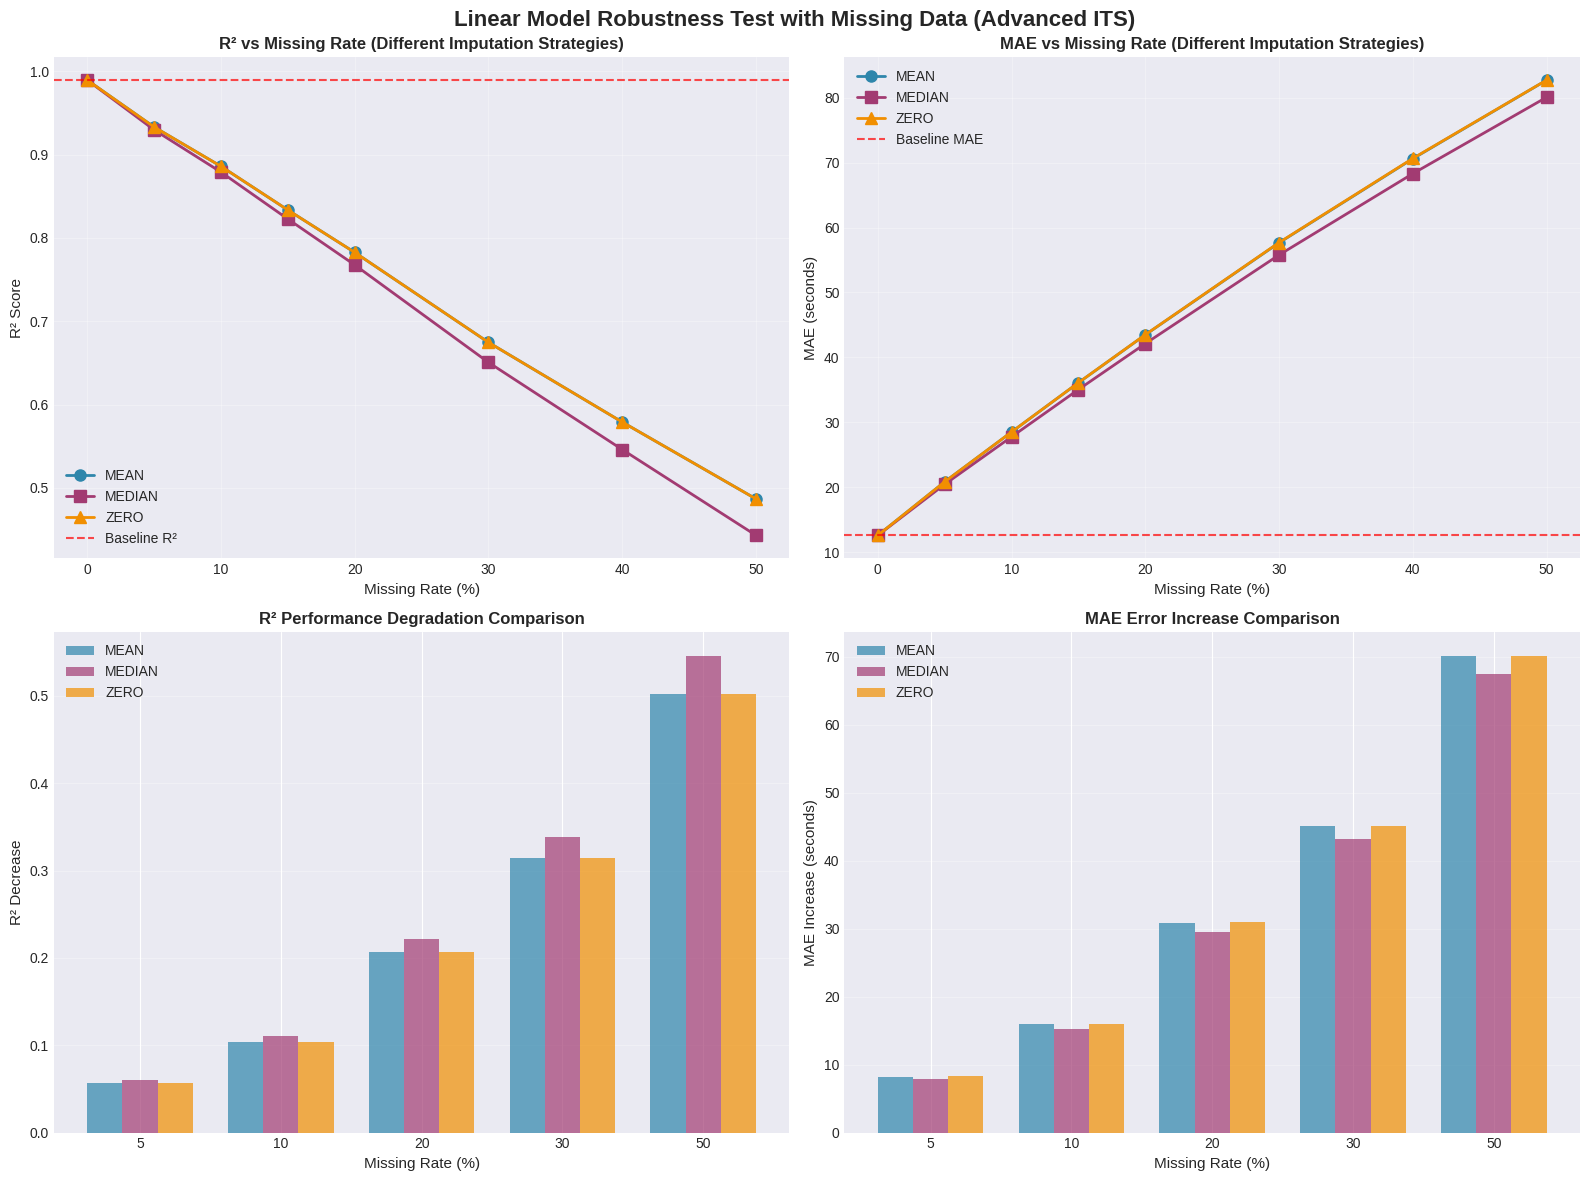


ÂÖ≥ÈîÆÂèëÁé∞:

1Ô∏è‚É£  20% Áº∫Â§±Áéá‰∏ã:
   ÊúÄ‰Ω≥Â°´ÂÖÖÁ≠ñÁï•: MEAN
   R¬≤ ‰øùÁïôÁéá: 79.1%
   R¬≤ ‰∏ãÈôç: 0.2067

2Ô∏è‚É£  Â°´ÂÖÖÁ≠ñÁï•ÊÄßËÉΩÊéíÂêç (20% Áº∫Â§±Áéá):
   MEAN    : R¬≤ = 0.7826, MAE = 43.48s
   ZERO    : R¬≤ = 0.7826, MAE = 43.49s
   MEDIAN  : R¬≤ = 0.7676, MAE = 42.12s

3Ô∏è‚É£  MEAN Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%

3Ô∏è‚É£  MEDIAN Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%

3Ô∏è‚É£  ZERO Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):
   15%


In [155]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ============================================================
# Linear Ê®°ÂûãÊï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Advanced ITS)
# ============================================================

print("=" * 60)
print("Linear Ê®°ÂûãÊï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØï (Advanced ITS)")
print("=" * 60)

# 1. ÂáÜÂ§áÊµãËØïÊï∞ÊçÆ
X_test_missing = X_test_advanced_scaled.copy()
y_test_missing = y_test_advanced

# 2. ÂÆö‰πâÁº∫Â§±Áéá
missing_rates = [0.0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50]  # 0%, 5%, 10%, 15%, 20%, 30%, 40%, 50%

# 3. ÂÆö‰πâÁº∫Â§±ÂÄºÂ°´ÂÖÖÁ≠ñÁï•
imputation_strategies = {
    'mean': lambda x: x.fillna(x.mean()),
    'median': lambda x: x.fillna(x.median()),
    'zero': lambda x: x.fillna(0)
}

# 4. Â≠òÂÇ®ÁªìÊûú
results_lr_advanced_missing = {
    'missing_rate': [],
    'strategy': [],
    'r2': [],
    'mae': [],
    'rmse': [],
    'r2_drop': [],
    'mae_increase': []
}

# 5. Âü∫ÂáÜÊÄßËÉΩÔºàÊó†Áº∫Â§±Ôºâ
best_linear_model = lr_model_advanced
y_pred_baseline = best_linear_model.predict(X_test_missing)
r2_baseline = r2_score(y_test_missing, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test_missing, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test_missing, y_pred_baseline))

print(f"\nÂü∫ÂáÜÊÄßËÉΩ (Êó†Áº∫Â§±):")
print(f"  R¬≤ = {r2_baseline:.4f}")
print(f"  MAE = {mae_baseline:.2f}s")
print(f"  RMSE = {rmse_baseline:.2f}s")
print("\n" + "=" * 60)

# 6. ÊµãËØï‰∏çÂêåÁº∫Â§±ÁéáÂíåÂ°´ÂÖÖÁ≠ñÁï•
for missing_rate in missing_rates:
    print(f"\n{'='*60}")
    print(f"[Áº∫Â§±Áéá: {missing_rate*100:.0f}%]")
    print(f"{'='*60}")

    if missing_rate == 0.0:
        # Êó†Áº∫Â§±ÊÉÖÂÜµ
        for strategy_name in imputation_strategies.keys():
            results_lr_advanced_missing['missing_rate'].append(missing_rate * 100)
            results_lr_advanced_missing['strategy'].append(strategy_name)
            results_lr_advanced_missing['r2'].append(r2_baseline)
            results_lr_advanced_missing['mae'].append(mae_baseline)
            results_lr_advanced_missing['rmse'].append(rmse_baseline)
            results_lr_advanced_missing['r2_drop'].append(0.0)
            results_lr_advanced_missing['mae_increase'].append(0.0)
        print(f"  ‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆÔºàÊó†Áº∫Â§±Ôºâ")
        continue

    # ÂàõÂª∫Áº∫Â§±Êï∞ÊçÆ
    np.random.seed(42)  # ‰øùËØÅÂèØÈáçÂ§çÊÄß
    X_test_with_missing = X_test_missing.copy()

    # ÈöèÊú∫ÈÄâÊã©Ë¶ÅËÆæ‰∏∫Áº∫Â§±ÁöÑ‰ΩçÁΩÆ
    mask = np.random.random(X_test_with_missing.shape) < missing_rate
    X_test_with_missing = X_test_with_missing.mask(mask)

    actual_missing_rate = X_test_with_missing.isna().sum().sum() / X_test_with_missing.size
    print(f"  ÂÆûÈôÖÁº∫Â§±Áéá: {actual_missing_rate*100:.2f}%")
    print(f"  Áº∫Â§±ÂÄºÊï∞Èáè: {X_test_with_missing.isna().sum().sum()}")

    # ÊµãËØï‰∏çÂêåÂ°´ÂÖÖÁ≠ñÁï•
    for strategy_name, impute_func in imputation_strategies.items():
        print(f"\n  üìå Â°´ÂÖÖÁ≠ñÁï•: {strategy_name.upper()}")

        # Â°´ÂÖÖÁº∫Â§±ÂÄº
        X_test_imputed = impute_func(X_test_with_missing.copy())

        # È¢ÑÊµã
        y_pred_imputed = best_linear_model.predict(X_test_imputed)

        # ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ
        if hasattr(y_test_missing, 'values'):
            y_test_array = y_test_missing.values
        else:
            y_test_array = y_test_missing

        # ËÆ°ÁÆóÊåáÊ†á
        r2_imputed = r2_score(y_test_array, y_pred_imputed)
        mae_imputed = mean_absolute_error(y_test_array, y_pred_imputed)
        rmse_imputed = np.sqrt(mean_squared_error(y_test_array, y_pred_imputed))

        # ËÆ°ÁÆó‰∏ãÈôç/Â¢ûÂä†Èáè
        r2_drop = r2_baseline - r2_imputed
        mae_increase = mae_imputed - mae_baseline

        # Â≠òÂÇ®ÁªìÊûú
        results_lr_advanced_missing['missing_rate'].append(missing_rate * 100)
        results_lr_advanced_missing['strategy'].append(strategy_name)
        results_lr_advanced_missing['r2'].append(r2_imputed)
        results_lr_advanced_missing['mae'].append(mae_imputed)
        results_lr_advanced_missing['rmse'].append(rmse_imputed)
        results_lr_advanced_missing['r2_drop'].append(r2_drop)
        results_lr_advanced_missing['mae_increase'].append(mae_increase)

        # ÊâìÂç∞ÁªìÊûú
        print(f"     R¬≤ = {r2_imputed:.4f} (‰∏ãÈôç {r2_drop:.4f}, {r2_drop/r2_baseline*100:.1f}%)")
        print(f"     MAE = {mae_imputed:.2f}s (Â¢ûÂä† {mae_increase:.2f}s, {mae_increase/mae_baseline*100:.1f}%)")
        print(f"     RMSE = {rmse_imputed:.2f}s")

# 7. ËΩ¨Êç¢‰∏∫ DataFrame
df_results_lr_advanced_missing = pd.DataFrame(results_lr_advanced_missing)

print("\n" + "=" * 60)
print("Êï∞ÊçÆÁº∫Â§±È≤ÅÊ£íÊÄßÊµãËØïÂÆåÊàêÔºÅ")
print("=" * 60)

# 8. ÊòæÁ§∫Ê±áÊÄªË°®Ê†º
print("\nÁªìÊûúÊ±áÊÄªË°®:")
print(df_results_lr_advanced_missing.to_string(index=False))

# 9. ÂèØËßÜÂåñÁªìÊûú
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Linear Model Robustness Test with Missing Data (Advanced ITS)', fontsize=16, fontweight='bold')

colors = {'mean': '#2E86AB', 'median': '#A23B72', 'zero': '#F18F01'}
markers = {'mean': 'o', 'median': 's', 'zero': '^'}


# Â≠êÂõæ1: R¬≤ vs Áº∫Â§±Áéá
for strategy in imputation_strategies.keys():
    data = df_results_lr_advanced_missing[df_results_lr_advanced_missing['strategy'] == strategy]
    axes[0, 0].plot(data['missing_rate'], data['r2'],
                    marker=markers[strategy], linewidth=2, markersize=8,
                    color=colors[strategy], label=strategy.upper())
axes[0, 0].axhline(y=r2_baseline, color='red', linestyle='--', label='Baseline R¬≤', alpha=0.7)
axes[0, 0].set_xlabel('Missing Rate (%)', fontsize=11)
axes[0, 0].set_ylabel('R¬≤ Score', fontsize=11)
axes[0, 0].set_title('R¬≤ vs Missing Rate (Different Imputation Strategies)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Â≠êÂõæ2: MAE vs Áº∫Â§±Áéá
for strategy in imputation_strategies.keys():
    data = df_results_lr_advanced_missing[df_results_lr_advanced_missing['strategy'] == strategy]
    axes[0, 1].plot(data['missing_rate'], data['mae'],
                    marker=markers[strategy], linewidth=2, markersize=8,
                    color=colors[strategy], label=strategy.upper())
axes[0, 1].axhline(y=mae_baseline, color='red', linestyle='--', label='Baseline MAE', alpha=0.7)
axes[0, 1].set_xlabel('Missing Rate (%)', fontsize=11)
axes[0, 1].set_ylabel('MAE (seconds)', fontsize=11)
axes[0, 1].set_title('MAE vs Missing Rate (Different Imputation Strategies)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Â≠êÂõæ3: R¬≤ ‰∏ãÈôçÈáèÂØπÊØî
missing_rates_plot = [5, 10, 20, 30, 50]
x_pos = np.arange(len(missing_rates_plot))
width = 0.25

for i, strategy in enumerate(imputation_strategies.keys()):
    r2_drops = []
    for rate in missing_rates_plot:
        data = df_results_lr_advanced_missing[
            (df_results_lr_advanced_missing['missing_rate'] == rate) &
            (df_results_lr_advanced_missing['strategy'] == strategy)
        ]
        r2_drops.append(data['r2_drop'].values[0] if len(data) > 0 else 0)

    axes[1, 0].bar(x_pos + i*width, r2_drops, width,
                   label=strategy.upper(), color=colors[strategy], alpha=0.7)

axes[1, 0].set_xlabel('Missing Rate (%)', fontsize=11)
axes[1, 0].set_ylabel('R¬≤ Decrease', fontsize=11)
axes[1, 0].set_title('R¬≤ Performance Degradation Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos + width)
axes[1, 0].set_xticklabels(missing_rates_plot)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Â≠êÂõæ4: MAE Â¢ûÂä†ÈáèÂØπÊØî
for i, strategy in enumerate(imputation_strategies.keys()):
    mae_increases = []
    for rate in missing_rates_plot:
        data = df_results_lr_advanced_missing[
            (df_results_lr_advanced_missing['missing_rate'] == rate) &
            (df_results_lr_advanced_missing['strategy'] == strategy)
        ]
        mae_increases.append(data['mae_increase'].values[0] if len(data) > 0 else 0)

    axes[1, 1].bar(x_pos + i*width, mae_increases, width,
                   label=strategy.upper(), color=colors[strategy], alpha=0.7)

axes[1, 1].set_xlabel('Missing Rate (%)', fontsize=11)
axes[1, 1].set_ylabel('MAE Increase (seconds)', fontsize=11)
axes[1, 1].set_title('MAE Error Increase Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos + width)
axes[1, 1].set_xticklabels(missing_rates_plot)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 10. ËæìÂá∫ÂÖ≥ÈîÆÂèëÁé∞
print("\n" + "=" * 60)
print("ÂÖ≥ÈîÆÂèëÁé∞:")
print("=" * 60)

# ÊâæÂá∫ 20% Áº∫Â§±ÁéáÊó∂ÁöÑÊúÄ‰Ω≥Á≠ñÁï•
data_20 = df_results_lr_advanced_missing[df_results_lr_advanced_missing['missing_rate'] == 20.0]
best_strategy_20 = data_20.loc[data_20['r2'].idxmax(), 'strategy']
best_r2_20 = data_20['r2'].max()
r2_retention_20 = (best_r2_20 / r2_baseline) * 100

print(f"\n1Ô∏è‚É£  20% Áº∫Â§±Áéá‰∏ã:")
print(f"   ÊúÄ‰Ω≥Â°´ÂÖÖÁ≠ñÁï•: {best_strategy_20.upper()}")
print(f"   R¬≤ ‰øùÁïôÁéá: {r2_retention_20:.1f}%")
print(f"   R¬≤ ‰∏ãÈôç: {r2_baseline - best_r2_20:.4f}")

# ÊØîËæÉ‰∏çÂêåÁ≠ñÁï•
print(f"\n2Ô∏è‚É£  Â°´ÂÖÖÁ≠ñÁï•ÊÄßËÉΩÊéíÂêç (20% Áº∫Â§±Áéá):")
data_20_sorted = data_20.sort_values('r2', ascending=False)
for idx, row in data_20_sorted.iterrows():
    print(f"   {row['strategy'].upper():8s}: R¬≤ = {row['r2']:.4f}, MAE = {row['mae']:.2f}s")

# ÊâæÂá∫ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±ÁéáÔºàR¬≤ ‰øùÁïôÁéá > 80%Ôºâ
for strategy in imputation_strategies.keys():
    strategy_data = df_results_lr_advanced_missing[df_results_lr_advanced_missing['strategy'] == strategy]
    acceptable = strategy_data[strategy_data['r2'] / r2_baseline > 0.8]['missing_rate'].max()
    print(f"\n3Ô∏è‚É£  {strategy.upper()} Á≠ñÁï•ÊúÄÂ§ßÂèØÊé•ÂèóÁº∫Â§±Áéá (R¬≤ ‰øùÁïôÁéá > 80%):")
    print(f"   {acceptable:.0f}%")

print("=" * 60)
